# Data Analysis Python Project
## Thursday 30th January 2024 - Saturday 8th March 2024
---


# A Dark Souls Weapons Analysis

## What is this dataset about?
The data set I will be analysing is a list of all the 200+ weapons in the popular 2016 Fromsoft game, Darksouls 3. \
The data set contains all the information one could find ingame or online about each weapons stats (e.g damage, defence).

### What is Darksouls?
First, what is Dark souls? Dark souls is a medival fantasy action rpg released by Fromsoft in 2016. Like most RPG games, there are a vareity of weapons ingame for your character to fight with, each weapon will have different stats, rarity, costs. As well as weapon stats, your character also has a set of key stats.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://platform.polygon.com/wp-content/uploads/sites/2/chorus/uploads/chorus_asset/file/6401565/Attributes.0.jpg")


* <b>Vigor</b> (Health Points) 
* <b>Attunment</b> (Spell slots and Focus points) 
* <b>Endurance</b> (Stamina) 
* <b>Vitality</b> (Equipment load)
* <b>Strength</b> (One of our key damage stats) 
* <b>Dexterity</b> (Our second main damage stat) 
* <b>Intelligence</b> (Our main magic stat, governs sorceries) 
* <b>Faith</b> (Our second magic stat, governs holy incantations)
* <b>Luck</b> (Item discovery)

Your character will progressivly get stronger throughout the game, defeating enemies gives you a currency, soul, which acts as both classic experience points for levelling up as well as money for buying useful items from merchants. Upon level up the player may choose one stat to increase by 1. So, deciding which stat to level up may have a strong difference between making the players game easier or harder.

### What about the weapons? 
I listed all the stats of the player above, however the key stats we will be intrested in are <b>Strength (Str), Dexterity (Dex), Intelligence (Int)</b> and <b>Faith (Fai)</b> as these are the stats which influence weapons directly.

Every weapon has an inherent damage value (base damage) that is independent on player stats, and a damage value that scales dependent on the players stats. \
Furthermore, every weapon has a minimum stat requirement to weild effectivly.

Different weapons will have different stat requirments and stat bonuses. We will expect for the majority of weapons, Str and Dex govern physical weapons, Int and Fai govern magical weapons. \
Vitality, Attunement, Endurance and Luck do not directly influence our weapon choice and so we will neglect them for the purpose of this project. 


## What are the aims of this project?
There are many weapons to choose from ingame, so deciding on a single weapon to use in this game may feel overwhelming. Furthermore, do we want to spread our stats evenly between many stats or focus soley on a single stat? These are very important questions for a new player to ask and so this project aims to compare weapons both within the same class and different class to find weapons that stand out amongst their peers.

 ---


# Load in libraries and data

* description of the data. 
* what are the columns?
* what year is it from
* observatations

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import kagglehub


# Most of my numbers will be integers. 
# I will not be needing much precision when talking about damage numbers and so 2d.p should be sufficent
pd.set_option('precision', 2)


# Download latest version of dataset
path = kagglehub.dataset_download("l3llff/-dark-souls-3-weapon")
print("Path to dataset files:", path)


df_original = pd.read_csv('Datasets/DS3_weapon.csv', sep=',')
df = df_original   #Useful to keep the original df backed up as a seperate variable and make changes to the second df variable instead
df # The entire data frame
df

Path to dataset files: /Users/dominicraven/.cache/kagglehub/datasets/l3llff/-dark-souls-3-weapon/versions/1


Name       Category Reinforcement         Damage  \
0                      Fist          Fists       Regular     20/0/0/0/0   
1         Dragonhead Shield  Small Shields          Boss   116/0/12/0/0   
2    Dragonhead Greatshield   Greatshields          Boss    145/0/0/0/0   
3           White Birch Bow           Bows        Unique     82/0/0/0/0   
4      Preacher's Right Arm         Staves        Unique    109/0/0/0/0   
..                      ...            ...           ...            ...   
282                Eleonora           Axes          Boss    156/0/0/0/0   
283      Dragonslayer's Axe           Axes       Regular  105/0/0/105/0   
284           Butcher Knife           Axes       Regular     95/0/0/0/0   
285             Brigand Axe           Axes       Regular    124/0/0/0/0   
286              Battle Axe           Axes       Regular    125/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
0          0/0/0/0/0       0/0/0           0/0/0/0      -/-/-/-       100   
1     70/65/90/35/55       0/0/0        12/0/11/12      D/-/E/E       100   
2    100/55/90/30/55       0/0/0         35/0/0/15      D/-/-/E       100   
3          -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
4     25/20/10/10/15       0/0/0         12/0/14/0      E/-/A/-       100   
..               ...         ...               ...          ...       ...   
282   55/40/30/30/40       0/0/0          20/8/0/0      D/E/-/-       100   
283   45/30/25/25/30       0/0/0         18/14/0/0      D/E/-/-       100   
284   60/40/30/30/40       0/0/0          24/0/0/0      A/-/-/-       100   
285   45/30/25/25/30       0/0/0          14/8/0/0      D/D/-/-       100   
286   45/30/25/25/30       0/0/0          12/8/0/0      D/D/-/-       100   

     Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
0       0.0         0           0         0.0         NaN    NaN       No   
1       4.5        40          85       500.0         NaN    NaN      Yes   
2      18.0        60         150       500.0         NaN    NaN      Yes   
3       2.5         -          50       300.0         NaN   49.0       No   
4       2.0        10          50       300.0       229.0    NaN       No   
..      ...       ...         ...         ...         ...    ...      ...   
282     6.5        35          90       500.0         NaN    NaN       No   
283     4.0        30          70       100.0         NaN    NaN      Yes   
284     7.0        35          75       500.0         NaN    NaN       No   
285     3.0        30          75       100.0         NaN    NaN      Yes   
286     4.0        30          80       120.0         NaN    NaN      Yes   

    Infusable  
0          No  
1          No  
2          No  
3          No  
4          No  
..        ...  
282        No  
283       Yes  
284        No  
285       Yes  
286       Yes  

[287 rows x 17 columns]

# Description of the data. 
As mentioned above, we see that the data set includes all the informtation a player would see ingame for a given weapon on the weapons statistics screen. 

The data was sourced from Kaggle
* path = kagglehub.dataset_download("l3llff/-dark-souls-3-weapon")
and has a high usability score of 10 for completeness, credibility and compatability.

The data was last updated 3 years ago, (2022), while the game was released in 2016, which is a good indication the dataset is complete and does not require further updates.

## What are the columns?
A detailed desciption on what each of the columns in the dataframe mean are given below.

In [3]:
df.keys()

Index(['Name', 'Category', 'Reinforcement', 'Damage', 'Damage Reduction',
       'Aux Effects', 'Stat Requirements', 'Stat Bonuses', 'Critical',
       'Weight', 'Stability', 'Durability', 'Sell Price', 'Spell Buff',
       'Range', 'Buffable', 'Infusable'],
      dtype='object')

We can read the column headings quickly using the df.keys() function in an empty cell as shown above. But what does each column mean? Lets go through them one by one. \
There are 17 columns in this data set, as each weapon has many different statistics to consider.

### index:
The first column, as standard for dataframes, provides the index of each row. Each row corresponds to one weapon. The index counts from 0 to 286, so there are 287 weapons in this dataset.
### Name:
Simply the unique name of each weapon.
### Category:
The type of the weapon as displayed ingame. We have broad 'classes' of Swords, Spears, Shields, Bows, Staffs, Talismans, etc. Within each class is a subclass, labelled the category, which specifies further what type of weapon this is. We will expect weapons within a category to behave similarly, i.e similar weights, power and movesets.
<br>I will be using the term subclass interchangeably with category, as personally I find it easier to group the weapons of like categories into these broad classes. (i.e it is useful to talk about chimes and talismans together as both are used for casting holy incantations).
### Reinforcement:
Reinforcement, or smithing, is a key mechanic in Dark souls 3 which involves interacting with a blacksmith NPC to improve the attributes of a weapon using materials and Souls currency. In effect, levelling up the weapon. \
Weapons will either be classed as "normal", "unique", or "Boss".

The dataset **does not** include the effects of reinforcing a weapon on its stats. Likely because including such information would increase the number of rows from 286 to ~2,860 as regular weapons may be reinforced ten times and boss/unique weapons five times. We are only analysing the <b>base statistics</b> of each weapon.

Weapons within the same reinforcement category will follow the same formula for material cost, soul cost and attribute scaling.

### Damage:
Displays the damage of each weapon<br>
A weapon in Dark souls may inflict one of five damage types

* <b>Physical</b>
* <b>Magic</b>
* <b>Fire</b>
* <b>Lightning</b>
* <b>Dark</b>

The dataframe displays all the damage values in one column as a string \
"phys/magic/fire/lightning/dark".
 
### Damage Reduction:
Displays the damage reduction provided by the weapon when used to gaurd against attacks. \
The damage types are displayed in the same order as in the "Damage" column. \
The damage reduction is the per cent of damage negated by an attack. 
* So a value of 100 blocks all damage of that damage type (100%)

Similarl to above, the dataframe displays all damage reductions in one column as a string.

### Aux Effects:
Also called Status Effects. While Damage types affect the enemy health bars directly, Aux effects inflict a buildup of status effect on the enemy, which after breaching a threshold value will inflict that status effect upon the enemy.

The Aux effects are displayed in one column as a string \
"Poison/ Bleed/ Frostbite"

### Stat Requirements:
The Minimum stat level required to weild a weapon effectivly. \
Having a stat below the requirement will cause damage to be decreased and weapon attacks to bounce off enemies abruptly.

The stat requirements are displayed in one column as a string \
"Str/Dex/Int/Fai"

### Stat Bonuses:
Weapons have an inherent damage independent of Stat bonuses, displayed in the 'Damage" column.\
Weapons have an additional Bonus damage that is added to the Inherent damage during damage calculations. \

Similarly, the stat bonuses are displayed in one column as a string \
"Str/Dex/Int/Fai" 

Rather then a numerical value, the Bonuses are displayed as a grade from E to S, with a higher grade corresponding to a higher hidden multiplier. \
Within a grade the multiplier is still not consitent, as can be seen during Weapon reinforcement, however it still provides a strong point of comparison between weapons.


### Critical:
Multiplier applied to Backstabs and Ripostes. 100(%) is the defualt value


### Weight:
The weight of the weapon. \
A Player has 3 weapon slots for the right arm and 3 weapon slots for the left arm, as well as four slots to equip armour. \
The weight of all equiped weapons and armour is added together as Equip Load. \
Typically, a player will want to stay between a range of 30-70% of their max Equip load to avoid becoming too heavy while dodging enemy attacks. 

While an indepth analysis of vitallity wont be followed, the carry weight is important for players to bear in mind when choosing their weapon relative to their vitality and equiped armour.

Items in the players inventory but not equiped will not contribute to equip load.


### Stability:
How useful the weapon is at blocking attacks beyond damage reduction. \
A higher stability weapon costs less stamina when blocking attacks and allows for stronger enemy attacks to be blocked without breaking through your guard.

### Durability:
A measure of the number of uses before the weapon becomes damaged and in need of repair. 

### Sell Price:
Souls recived for selling item to merchants.

### Spell Buff:
A statistic for spell tools (Chimes, Talismans, Staves and Pyromancy Flames).<br>
The multiplier applied to the base value of the spell. i.e stronger sorcery attacks, buffs, healing.

### Range:
A statistic for Bows and Crossbows. Affects how far a projectile will fly straight.

### Buffable:
A weapon may be temporarily enhanced, "buffed", via certain spells when holding a spell tool in the left hand to cast the spell, and the weapon in the right. Buffs act as temporary infusements.<br>
Not to be confused with the Spell Buff stat

### Infusable:
Similar to Reinforcement, Infusion is a key mechanic in Dark souls 3 which involves modifying a weapon at a Blacksmith to artificially change/enhance the scaling attribute and/or give an elemental affinity to the weapon. Unlike a buff, an Infusement acts indefininetly on the weapon until overwrittern with a new infusion at the blacksmith.

The dataset <b>does not</b> include the effects of infusing a weapon on it's stats, only whether it can be infused, True or False.

## Observatations:

From prior knowledge of the game and looking through the data set, the data provided is thorough and accurate when compared to ingame item descriptions and online dark souls wiki pages. 

While providing damage, damage reduction, stat requirement and stat bonus in one string makes the data neat and easy to read, the dataframe relies on the user to understand what each of the values actually corresponds to, even as it is not the format used in-game (the game uses a table with each value seperate). Furthermore, this format is not particularly useful for performing data analysis, as the data is stored as a string rather then individual floats/integers.

Before analysing the data I will need to create new columns in my table, converting these strings to a variable type I can perform numerical analysis on.

---
# Data exploration.

It is good practice to display the head and tail of the dataframe to get an idea of what each row looks like.

In [4]:
df.head()

Name       Category Reinforcement        Damage  \
0                    Fist          Fists       Regular    20/0/0/0/0   
1       Dragonhead Shield  Small Shields          Boss  116/0/12/0/0   
2  Dragonhead Greatshield   Greatshields          Boss   145/0/0/0/0   
3         White Birch Bow           Bows        Unique    82/0/0/0/0   
4    Preacher's Right Arm         Staves        Unique   109/0/0/0/0   

  Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
0        0/0/0/0/0       0/0/0           0/0/0/0      -/-/-/-       100   
1   70/65/90/35/55       0/0/0        12/0/11/12      D/-/E/E       100   
2  100/55/90/30/55       0/0/0         35/0/0/15      D/-/-/E       100   
3        -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
4   25/20/10/10/15       0/0/0         12/0/14/0      E/-/A/-       100   

   Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
0     0.0         0           0         0.0         NaN    NaN       No   
1     4.5        40          85       500.0         NaN    NaN      Yes   
2    18.0        60         150       500.0         NaN    NaN      Yes   
3     2.5         -          50       300.0         NaN   49.0       No   
4     2.0        10          50       300.0       229.0    NaN       No   

  Infusable  
0        No  
1        No  
2        No  
3        No  
4        No

In [5]:
df.tail()

Name Category Reinforcement         Damage  \
282            Eleonora     Axes          Boss    156/0/0/0/0   
283  Dragonslayer's Axe     Axes       Regular  105/0/0/105/0   
284       Butcher Knife     Axes       Regular     95/0/0/0/0   
285         Brigand Axe     Axes       Regular    124/0/0/0/0   
286          Battle Axe     Axes       Regular    125/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
282   55/40/30/30/40       0/0/0          20/8/0/0      D/E/-/-       100   
283   45/30/25/25/30       0/0/0         18/14/0/0      D/E/-/-       100   
284   60/40/30/30/40       0/0/0          24/0/0/0      A/-/-/-       100   
285   45/30/25/25/30       0/0/0          14/8/0/0      D/D/-/-       100   
286   45/30/25/25/30       0/0/0          12/8/0/0      D/D/-/-       100   

     Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
282     6.5        35          90       500.0         NaN    NaN       No   
283     4.0        30          70       100.0         NaN    NaN      Yes   
284     7.0        35          75       500.0         NaN    NaN       No   
285     3.0        30          75       100.0         NaN    NaN      Yes   
286     4.0        30          80       120.0         NaN    NaN      Yes   

    Infusable  
282        No  
283       Yes  
284        No  
285       Yes  
286       Yes

The head of the data appears mostly disorganised, with weapons of different categories appearing at the top. Although it does make sense to give fists an index of 0. Fists are not a weapon the player equips, rather they are the defualt "weapon" when no weapon is equiped.

The tail of the data is organised, showing axes were added last to the data base.

The indexing of the data is rather arbitary as the game does not give each weapon an ingame ID. 


It is also important to understand what types of data we are working with before analysis

In [6]:
print(df.dtypes)

Name                  object
Category              object
Reinforcement         object
Damage                object
Damage Reduction      object
Aux Effects           object
Stat Requirements     object
Stat Bonuses          object
Critical               int64
Weight               float64
Stability             object
Durability             int64
Sell Price           float64
Spell Buff           float64
Range                float64
Buffable              object
Infusable             object
dtype: object


As mentioned earlier, damage, damage reduction, Aux effects and stat requirement are string objects rather then ints or floats. This makes the numbers easier to read from a human perspective but extra effort trying to numerically analyse.

Other data types are in useful forms for analysis.


### Useful commands for viewing data

In [7]:
df[df["Name"]== "Claymore"]  #to see that stats of a single weapon

Name     Category Reinforcement       Damage Damage Reduction  \
126  Claymore  Greatswords       Regular  138/0/0/0/0   50/35/30/30/35   

    Aux Effects Stat Requirements Stat Bonuses  Critical  Weight Stability  \
126       0/0/0         16/13/0/0      D/D/-/-       100     9.0        35   

     Durability  Sell Price  Spell Buff  Range Buffable Infusable  
126          75       100.0         NaN    NaN      Yes       Yes

In [8]:
df[df["Critical"] > 100] #See which weapons fit a particular value i.e Critical damage ratio

Name          Category Reinforcement       Damage  \
16            Demon's Scar     Curved Swords          Boss   0/0/99/0/0   
28             Crow Quills  Thrusting Swords       Regular   98/0/0/0/0   
34             Crow Talons             Claws       Regular   91/0/0/0/0   
124           Mail Breaker           Daggers       Regular   89/0/0/0/0   
210   Lothric Knight Sword   Straight Swords       Regular  103/0/0/0/0   
212             Shortsword   Straight Swords       Regular   99/0/0/0/0   
220        Irithyll Rapier  Thrusting Swords        Unique  116/0/0/0/0   
221                 Rapier  Thrusting Swords       Regular   95/0/0/0/0   
232   Tailbone Short Sword           Daggers          Boss  106/0/0/0/0   
233  Scholar's Candlestick           Daggers       Regular   68/0/0/0/0   
234        Parrying Dagger           Daggers       Regular   60/0/0/0/0   
236      Handmaid's Dagger           Daggers       Regular   85/0/0/0/0   
237                 Dagger           Daggers       Regular   65/0/0/0/0   
238     Corvian Greatknife           Daggers       Regular   93/0/0/0/0   
239    Brigand Twindaggers           Daggers       Regular   70/0/0/0/0   
240         Bandit's Knife           Daggers       Regular   79/0/0/0/0   
259          Manikin Claws             Claws       Regular   81/0/0/0/0   
260                   Claw             Claws       Regular   86/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
16    25/35/65/30/35       0/0/0        0/16/17/17      -/E/D/D       110   
28    35/20/15/15/20       0/0/0          9/16/0/0      E/C/-/-       120   
34         -/-/-/-/-      0/30/0          6/19/0/0      E/C/-/-       110   
124   35/20/15/15/20       0/0/0          7/12/0/0      E/D/-/-       125   
210   45/35/25/25/35       0/0/0         11/18/0/0      D/D/-/-       110   
212   45/30/25/25/30       0/0/0          8/10/0/0      D/C/-/-       110   
220   40/25/20/20/25      0/0/55         10/16/0/0      D/D/-/-       110   
221   35/20/15/15/20       0/0/0          7/12/0/0      E/C/-/-       130   
232   35/20/15/15/20       0/0/0          8/14/0/0      E/E/-/-       110   
233   35/20/15/15/20       0/0/0          7/0/0/16      E/C/-/-       115   
234   30/20/15/15/20       0/0/0          5/14/0/0      E/C/-/-       110   
236   30/20/15/15/20       0/0/0           4/8/0/0      E/E/-/-       110   
237   35/20/15/15/20       0/0/0           5/9/0/0      E/C/-/-       130   
238   40/25/20/20/25       0/0/0         12/16/0/0      E/E/-/-       110   
239   35/20/15/15/20       0/0/0         10/18/0/0      D/D/-/-       125   
240   35/20/15/15/20      0/30/0          6/12/0/0      D/D/-/-       110   
259        -/-/-/-/-      0/30/0          8/18/0/0      E/C/-/-       110   
260        -/-/-/-/-      0/30/0          6/14/0/0      E/C/-/-       110   

     Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
16      0.5        30          70       150.0       202.0    NaN       No   
28      4.0        15          60       100.0         NaN    NaN      Yes   
34      3.0         -          65       100.0         NaN    NaN      Yes   
124     1.5        15          50       100.0         NaN    NaN      Yes   
210     4.0        35          80       500.0         NaN    NaN      Yes   
212     2.0        30          65       100.0         NaN    NaN      Yes   
220     3.0        20          70      1000.0         NaN    NaN       No   
221     2.0        15          60       100.0         NaN    NaN      Yes   
232     2.0        20          50        50.0         NaN    NaN       No   
233     1.5        15          40       500.0         NaN    NaN       No   
234     1.0        15          40       100.0         NaN    NaN      Yes   
236     0.5        15          40      1000.0         NaN    NaN       No   
237     1.5        15          50       100.0         NaN    NaN      Yes   
238     2.5        20          55       100.0         

Alternativly use the query function to see weapons which fit a value but only bring up relavent columns

In [9]:
#df.query('Column > value')[[columns to be displayed]]
df.query('Weight >= 20')[['Weight', 'Category', 'Name']]

Weight           Category                              Name
7      28.0      Great Hammers               Ledo's Great Hammer
9      21.5       Greatshields                 Giant Door Shield
14     22.5  Ultra Greatswords  Ringed Knight Paired Greatswords
39     21.0      Great Hammers                      Dragon Tooth
48     20.5       Greatshields               Yhorm's Greatshield
52     28.0       Greatshields               Havel's Greatshield
53     21.5       Greatshields                    Moaning Shield
55     26.0       Greatshields          Dragonslayer Greatshield
195    24.0      Great Hammers              Morne's Great Hammer
198    24.0      Great Hammers             Smough's Great Hammer
226    20.0          Greataxes             Dragonslayer Greataxe
264    20.0  Ultra Greatswords                        Greatsword
265    25.5  Ultra Greatswords             Fume Ultra Greatsword

As before, I use df.keys() to bring up the list of column keys, this can be quicker to read off then scrolling through the dataframe table manually.

To order my thoughts I will go through each column in order, expanding my notes on the data before plotting anything.

In [10]:
df.keys()

Index(['Name', 'Category', 'Reinforcement', 'Damage', 'Damage Reduction',
       'Aux Effects', 'Stat Requirements', 'Stat Bonuses', 'Critical',
       'Weight', 'Stability', 'Durability', 'Sell Price', 'Spell Buff',
       'Range', 'Buffable', 'Infusable'],
      dtype='object')

### Category explored: <a id='Category_explored'></a>

Can use unique function to pull up all the unique items within the list \
i.e [category].unique will show all the names of the weapon categories \
.value_counts()  will show how many weapons are in each category

In [11]:
df['Category'].unique()

array(['Fists', 'Small Shields', 'Greatshields', 'Bows', 'Staves',
       'Chimes', 'Pikes', 'Great Hammers', 'Halberds', 'Crossbows',
       'Greatswords', 'Katanas', 'Ultra Greatswords', 'Straight Swords',
       'Curved Swords', 'Curved Greatswords', 'Daggers', 'Whips',
       'Pyromancy Flames', 'Normal Shields', 'Torches', 'Reapers',
       'Thrusting Swords', 'Spears', 'Greatbows', 'Greataxes', 'Claws',
       'Axes', 'Talismans', 'Hammers'], dtype=object)

In [12]:
print("there are", len(df['Category'].unique()), "unique categories of weapons in the game.")

there are 30 unique categories of weapons in the game.


This is a lot of categories to handle, what if I want to only compare, say, shields of different types.

In [13]:
df['Category'].value_counts()
# i.e 29 Normal Shields, 18 small Shields, 16 Greatshields

Normal Shields        29
Small Shields         18
Straight Swords       17
Greatshields          16
Greatswords           16
Spears                16
Curved Swords         15
Great Hammers         14
Daggers               13
Staves                12
Ultra Greatswords     11
Halberds              11
Axes                  10
Hammers                8
Katanas                8
Crossbows              7
Bows                   7
Chimes                 7
Greataxes              7
Thrusting Swords       6
Talismans              6
Curved Greatswords     5
Pikes                  5
Whips                  5
Fists                  4
Reapers                4
Greatbows              3
Claws                  3
Torches                2
Pyromancy Flames       2
Name: Category, dtype: int64

Define a new <b>shields</b> dataframe which contains only the rows of <b>normal shields, small shields</b> and <b>Great shields</b>.

In [14]:
Shields = df[((df['Category'] == 'Small Shields')
    |  #Or
    (df['Category'] == 'Normal Shields')
    |
    (df['Category'] == 'Greatshields'))]

Shields.describe()

Critical  Weight  Durability  Sell Price  Spell Buff  Range
count      63.0   63.00       63.00       63.00         0.0    0.0
mean      100.0    6.96       94.76      267.33         NaN    NaN
std         0.0    6.79       47.54      249.71         NaN    NaN
min       100.0    1.00       30.00        2.00         NaN    NaN
25%       100.0    2.50       62.50      100.00         NaN    NaN
50%       100.0    4.50       80.00      150.00         NaN    NaN
75%       100.0    7.00      107.50      350.00         NaN    NaN
max       100.0   28.00      270.00     1000.00         NaN    NaN

Using the describe function I can now choose to view the mean of all shield types instead of only one shield category at a time.

This works well for small numbers of Categories but the length of the code grows quickly when trying to group many categories together. A different method to define groups would be to use the function,<br>
<code>df['Column'].isin(value)</code><br>
which returns True or False for whether the value is within the column specified.

Can use .isin() to create a "mask" for filtering the dataset.

In [15]:
shieldMask = df['Category'].isin(['Small Shields', 'Normal Shields', 'Greatshields'])
shieldMask

0      False
1       True
2       True
3      False
4      False
       ...  
282    False
283    False
284    False
285    False
286    False
Name: Category, Length: 287, dtype: bool

In [16]:
Shields = df[shieldMask]
Shields.head()

Name        Category Reinforcement        Damage  \
1        Dragonhead Shield   Small Shields          Boss  116/0/12/0/0   
2   Dragonhead Greatshield    Greatshields          Boss   145/0/0/0/0   
9        Giant Door Shield    Greatshields       Regular   107/0/0/0/0   
24         Follower Shield  Normal Shields       Regular    84/0/0/0/0   
25     Ethereal Oak Shield  Normal Shields        Unique   103/0/0/0/0   

   Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
1    70/65/90/35/55       0/0/0        12/0/11/12      D/-/E/E       100   
2   100/55/90/30/55       0/0/0         35/0/0/15      D/-/-/E       100   
9   100/75/45/80/75       0/0/0          45/0/0/0      C/-/-/-       100   
24   80/50/35/50/65       0/0/0           9/0/0/0      D/-/-/-       100   
25  100/65/35/70/60       0/0/0          12/0/0/0      D/-/-/-       100   

    Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
1      4.5        40          85       500.0         NaN    NaN      Yes   
2     18.0        60         150       500.0         NaN    NaN      Yes   
9     21.5        60         150       500.0         NaN    NaN      Yes   
24     3.5        55          55       100.0         NaN    NaN      Yes   
25     5.0        50          80       300.0         NaN    NaN      Yes   

   Infusable  
1         No  
2         No  
9        Yes  
24       Yes  
25        No

We have quickly grouped together all rows for which the Category column == True for Small, Normal and Great shields.<br>
Additionally, this method allows a quick definition for all rows that *arent* shields.<br>
Where the condition == False.

Grouping our weapons by these broader categories will make it easier to compare between them. 
i.e can filter to only look at shields when discussing Stability and Damage Reduction. While most weapons are capable of gaurding, we expect shields to far outclass other weapon types.

In [17]:
nonShields = df[~shieldMask]
nonShields.head()

Name Category Reinforcement        Damage  \
0                       Fist    Fists       Regular    20/0/0/0/0   
3            White Birch Bow     Bows        Unique    82/0/0/0/0   
4       Preacher's Right Arm   Staves        Unique   109/0/0/0/0   
5  Sacred Chime of Filianore   Chimes        Unique    74/0/0/0/0   
6        Ringed Knight Spear    Pikes        Unique  126/0/12/0/0   

  Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
0        0/0/0/0/0       0/0/0           0/0/0/0      -/-/-/-       100   
3        -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
4   25/20/10/10/15       0/0/0         12/0/14/0      E/-/A/-       100   
5   25/15/10/10/15       0/0/0          4/0/0/18      E/-/-/C       100   
6   45/30/20/20/30       0/0/0         15/17/0/0      D/D/E/E       100   

   Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
0     0.0         0           0         0.0         NaN    NaN       No   
3     2.5         -          50       300.0         NaN   49.0       No   
4     2.0        10          50       300.0       229.0    NaN       No   
5     0.5        10          50       300.0       200.0    NaN       No   
6     9.0        25          90       800.0         NaN    NaN       No   

  Infusable  
0        No  
3        No  
4        No  
5        No  
6        No

In [18]:
rangedMask = df['Category'].isin(['Bows', 'Greatbows', 'Crossbows'])
Ranged = df[rangedMask]
nonRanged = df[~rangedMask]
Ranged.head()

Name   Category Reinforcement       Damage  \
3          White Birch Bow       Bows        Unique   82/0/0/0/0   
11      Repeating Crossbow  Crossbows          Boss   77/0/0/0/0   
31       Millwood Greatbow  Greatbows        Unique  139/0/0/0/0   
42          Heavy Crossbow  Crossbows           Bow   72/0/0/0/0   
167  Dragonslayer Greatbow  Greatbows        Unique  126/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
3          -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
11         0/0/0/0/0       0/0/0         16/20/0/0      -/-/-/-       100   
31         0/0/0/0/0       0/0/0         28/12/0/0      C/E/-/-       100   
42         0/0/0/0/0       0/0/0          14/8/0/0      -/-/-/-       100   
167        0/0/0/0/0       0/0/0         20/20/0/0      D/D/-/-       100   

     Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
3       2.5         -          50       300.0         NaN   49.0       No   
11      7.5         -          20      1000.0         NaN   49.0       No   
31      9.0         0         100      1000.0         NaN   39.0       No   
42      4.5         0          55       100.0         NaN   50.0       No   
167    10.0         0         100      1000.0         NaN   50.0       No   

    Infusable  
3          No  
11         No  
31         No  
42         No  
167        No

==========
#### Note:
At first I was going to define my weapon groups here at the start of data exploration.<br>
It will be better to define them [after I have edited the dataframe](#Defining_Weapon_Groups) to remove and add columns so the changes are applied to these new groups.<br>



==========<br>

In [19]:
Ranged

Name   Category Reinforcement       Damage  \
3          White Birch Bow       Bows        Unique   82/0/0/0/0   
11      Repeating Crossbow  Crossbows          Boss   77/0/0/0/0   
31       Millwood Greatbow  Greatbows        Unique  139/0/0/0/0   
42          Heavy Crossbow  Crossbows           Bow   72/0/0/0/0   
167  Dragonslayer Greatbow  Greatbows        Unique  126/0/0/0/0   
201     Onislayer Greatbow  Greatbows        Unique  111/0/0/0/0   
202        Dragonrider Bow       Bows          Boss  110/0/0/0/0   
254        Sniper Crossbow  Crossbows           Bow   70/0/0/0/0   
255         Light Crossbow  Crossbows           Bow   64/0/0/0/0   
256      Knight's Crossbow  Crossbows           Bow  40/0/0/40/0   
257                 Avelyn  Crossbows           Bow   64/0/0/0/0   
258               Arbalest  Crossbows           Bow   78/0/0/0/0   
273              Short Bow       Bows           Bow   77/0/0/0/0   
274                Longbow       Bows           Bow   82/0/0/0/0   
275       Darkmoon Longbow       Bows          Boss  36/44/0/0/0   
276          Composite Bow       Bows           Bow   73/0/0/0/0   
277    Black Bow of Pharis       Bows           Bow   67/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
3          -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
11         0/0/0/0/0       0/0/0         16/20/0/0      -/-/-/-       100   
31         0/0/0/0/0       0/0/0         28/12/0/0      C/E/-/-       100   
42         0/0/0/0/0       0/0/0          14/8/0/0      -/-/-/-       100   
167        0/0/0/0/0       0/0/0         20/20/0/0      D/D/-/-       100   
201        0/0/0/0/0       0/0/0         18/24/0/0      E/C/-/-       100   
202        -/-/-/-/-       0/0/0         19/15/0/0      D/E/-/-       100   
254        0/0/0/0/0       0/0/0         18/16/0/0      -/-/-/-       100   
255        0/0/0/0/0       0/0/0          10/8/0/0      -/-/-/-       100   
256        0/0/0/0/0       0/0/0          12/8/0/0      -/-/-/-       100   
257        0/0/0/0/0       0/0/0         16/14/0/0      -/-/-/-       100   
258        0/0/0/0/0       0/0/0          18/8/0/0      -/-/-/-       100   
273        -/-/-/-/-       0/0/0          7/12/0/0      E/D/-/-       100   
274        -/-/-/-/-       0/0/0          9/14/0/0      E/D/-/-       100   
275        -/-/-/-/-       0/0/0         7/16/10/0      -/E/C/-       100   
276        -/-/-/-/-       0/0/0         12/12/0/0      D/D/-/-       100   
277        -/-/-/-/-       0/0/0          9/18/0/0      E/C/-/-       100   

     Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
3       2.5         -          50       300.0         NaN   49.0       No   
11      7.5         -          20      1000.0         NaN   49.0       No   
31      9.0         0         100      1000.0         NaN   39.0       No   
42      4.5         0          55       100.0         NaN   50.0       No   
167    10.0         0         100      1000.0         NaN   50.0       No   
201     7.5         0          65       300.0         NaN   63.0       No   
202     6.5         -          75       300.0         NaN   50.0       No   
254     7.5         0          55       100.0         NaN   59.0       No   
255     3.0         0          45       100.0         NaN   42.0       No   
256     4.0         0          50       500.0         NaN   42.0       No   
257     7.5         0          35      1000.0         NaN   35.0       No   
258     6.0         0          50       100.0         NaN   50.0       No   
273     2.0         -          40       100.0         NaN   42.0       No   
274     4.0         -          50       100.0         NaN   50.0       No   
275     4.5         -          50      1000.0         NaN   50.0       No   
276     3.5         -          65       150.0         NaN   42.0       No   
277     3.0         -          65       150.0         NaN   63.0       No   

    Infusable  
3      

### Reinforcement Explored:
From my understanding of the game, I earlier claimed there would be five unique reinforcement values, \
Regular, boss and unique.

The data frame instead lists Spell Tool and Bow as additional unique reinforcement paths.



In [20]:
df['Reinforcement'].unique()

array(['Regular', 'Boss', 'Unique', 'Spell Tool', 'Bow'], dtype=object)

In [21]:
df['Reinforcement'].value_counts()

Regular       153
Unique         62
Boss           45
Spell Tool     17
Bow            10
Name: Reinforcement, dtype: int64

In [22]:
df[df["Reinforcement"]== "Bow"]

Name   Category Reinforcement       Damage  \
42        Heavy Crossbow  Crossbows           Bow   72/0/0/0/0   
254      Sniper Crossbow  Crossbows           Bow   70/0/0/0/0   
255       Light Crossbow  Crossbows           Bow   64/0/0/0/0   
256    Knight's Crossbow  Crossbows           Bow  40/0/0/40/0   
257               Avelyn  Crossbows           Bow   64/0/0/0/0   
258             Arbalest  Crossbows           Bow   78/0/0/0/0   
273            Short Bow       Bows           Bow   77/0/0/0/0   
274              Longbow       Bows           Bow   82/0/0/0/0   
276        Composite Bow       Bows           Bow   73/0/0/0/0   
277  Black Bow of Pharis       Bows           Bow   67/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
42         0/0/0/0/0       0/0/0          14/8/0/0      -/-/-/-       100   
254        0/0/0/0/0       0/0/0         18/16/0/0      -/-/-/-       100   
255        0/0/0/0/0       0/0/0          10/8/0/0      -/-/-/-       100   
256        0/0/0/0/0       0/0/0          12/8/0/0      -/-/-/-       100   
257        0/0/0/0/0       0/0/0         16/14/0/0      -/-/-/-       100   
258        0/0/0/0/0       0/0/0          18/8/0/0      -/-/-/-       100   
273        -/-/-/-/-       0/0/0          7/12/0/0      E/D/-/-       100   
274        -/-/-/-/-       0/0/0          9/14/0/0      E/D/-/-       100   
276        -/-/-/-/-       0/0/0         12/12/0/0      D/D/-/-       100   
277        -/-/-/-/-       0/0/0          9/18/0/0      E/C/-/-       100   

     Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
42      4.5         0          55       100.0         NaN   50.0       No   
254     7.5         0          55       100.0         NaN   59.0       No   
255     3.0         0          45       100.0         NaN   42.0       No   
256     4.0         0          50       500.0         NaN   42.0       No   
257     7.5         0          35      1000.0         NaN   35.0       No   
258     6.0         0          50       100.0         NaN   50.0       No   
273     2.0         -          40       100.0         NaN   42.0       No   
274     4.0         -          50       100.0         NaN   50.0       No   
276     3.5         -          65       150.0         NaN   42.0       No   
277     3.0         -          65       150.0         NaN   63.0       No   

    Infusable  
42         No  
254        No  
255        No  
256        No  
257        No  
258        No  
273        No  
274        No  
276        No  
277        No

Looking at the dataframes, the Bow reinforcements are just regular reinforcements that are also bows. Unique and Boss bows are still classed as Unique and Boss reinforcements. 

The same for "Spell Tool".

The reinforcement column may be useful later for comparing boss and unique weapons vs common weapon types.

### Further exploration.
Can see key statistics about the Critical, Weight, Durability, Sell price, Spell buff and range values of weapons for a given category.

If we want to see statistics on numbers stored as strings we need to convert them to a numerical format still.

In [23]:
df.describe()

Critical  Weight  Durability  Sell Price  Spell Buff  Range
count    287.00   287.0      287.00      286.00       33.00  17.00
mean     100.92     6.7       81.60      383.51      216.88  48.53
std        4.02     5.8       50.88      394.90       45.10   7.85
min      100.00     0.0        0.00        0.00       60.00  35.00
25%      100.00     2.5       55.00      100.00      203.00  42.00
50%      100.00     5.0       70.00      200.00      220.00  50.00
75%      100.00     9.0       90.00      500.00      232.00  50.00
max      130.00    28.0      500.00     2000.00      312.00  63.00

The final two columns, buffable and infusable, are boolean. \
169 weapons are buffable, 118 are not \
141 weapons are infusable, 146 are not

In [24]:
df['Buffable'].value_counts()

Yes    169
No     118
Name: Buffable, dtype: int64

In [25]:
df['Infusable'].value_counts()

No     146
Yes    141
Name: Infusable, dtype: int64

Although numerical analysis cant be taken from the stat and damage columns as they're currently strings, we can still get useful information.

i.e Using the value counts, we can see the most common combination of stat bonuses on a weapon

There are 50 weapons that have both a str and dex bonus of D and an Int and Fai bonus of 0.
There are 50 weapons that have a str bonus of D and a Dex, Int and Fai bonus of 0.

In [26]:
df['Stat Bonuses'].value_counts()

D/D/-/-    50
D/-/-/-    50
E/C/-/-    20
D/C/-/-    15
C/-/-/-    14
           ..
C/C/D/D     1
B/-/-/-     1
D/D/B/-     1
D/-/E/D     1
D/-/-/E     1
Name: Stat Bonuses, Length: 67, dtype: int64

### Spell Buffs

At first I neglected looking into spell buffs column further, but now exploring this data I have found some intersting information about the way this dataframe was handled.

Spell Buff is comparable to the damage stat of a non spell tool. It affects the strength of spells cast. <br>
As such I was expecting to see values with a mean of ~100.<br>
What I found instead was that the spell buff values have a mean of 217 and a lower quartile of 203.

Looking specifically at the [Pyromancy Flame](https://darksouls3.wiki.fextralife.com/Pyromancy+Flame) on the DS3 wiki page, I found that it only has a Spell Buff of 221 when the player has leveled up their Faith and Intelligence to level 60.

A quick glance through wiki pages confirms that the Spell Buff listed for each weapon is assuming a corresponding Int/Fai stat of 60.

Interestingly, the [Man-grub's Staff](https://darksouls3.wiki.fextralife.com/Man-Grub's+Staff) was listed to have a spell buff of only 100.<br>
This is because the Man-grub's Staff is unique due to scaling with Luck! Not Int or Fai.<br>
<br>According to the fextralife wiki<br>
"... always show a Spell Buff Rating of 100 regardless of Luck. With my testing... at 60 Luck, Man-Grub Staff +5 has a Spell Buff rating of <b>218.</b>"<br>
which is more inline with the other values.<br>

Another strangely low value is the [Cleric's Candlestick](https://darksouls3.wiki.fextralife.com/Cleric's+Candlestick)<br>
In the dataset it has a listed Spell Buff of only 60, while according to the Fextralife wiki it has a spell buff of 200 at 60Int.

Wondering how the dataframe got to it's numbers, I checked the [dataframe page of Kaggle](https://www.kaggle.com/datasets/l3llff/-dark-souls-3-weapon/data) again and found this data was sourced by scraping information from http://darksouls3.wikidot.com/.<br>
Up to this point I had been using both http://darksouls3.wikidot.com/ and https://darksouls3.wiki.fextralife.com/Dark+Souls+3+Wiki interchangeably as both provide good information on the game. 

Now double checking the wikidot.com page, [Cleric's Candlestick](http://darksouls3.wikidot.com/equipmentgroup:cleric-s-candlestick) provided me with two key pieces of information.
1. "By default the value reflected in the infobox and the upgrades uses 60 Intelligence and/or Faith."<br>
The wiki under Spell Buff directly states why this value was chosen,<br>
This directly confirms what I had inferred from looking at the Fextralife wiki pages.

2. "Spell Scaling Data:
At 30 Int, it has ??? Spell Buff.
At 40 Int, it has ??? Spell Buff.
At 50 Int, it has 182 Spell Buff.
At 60 Int, it has ??? Spell Buff."<br>
The wiki has incomplete data on the Spell Buff of this weapon, as a result a placeholder value of 60 was used in the scraped info box. 



Double checking at the wikidot.com page for [Pyromancy Flame](http://darksouls3.wikidot.com/equipmentgroup:pyromancy-flame), it is specifically stated that the pyromancy flame has a spell buff of 221 when the player has 60Fai/Int *AND* the weapon has been fully reinforced. <br>
From this and the Man-grub's Staff page, we can infer that unless an error has been made, the listed Spell Buff values are when these two conditions are met for all weapons.

#### Conclusion of Spell Buff exploration:
When data in your dataframe feels inaccurate, investigate *why*. <br>
In this case I was able to determine the issue arouse from the dataframe scraping a single wiki page for data but not checking the numbers were correct.<br>
The missing data for Man-grub's Staff just so happened to be listed on a seperate wiki site that wasn't scraped.<br>
The missing data for Cleric's Candlestick only lists Spell Buff up to 50int. From this I can infer that the likely Spell Buff by 60int is around ~192, however I would need to play the game with this weapon for myself to verify as the data is not available online.

In [27]:
#df[df["Spell Buff"] > 0][["Category"], ["Spell Buff"]]

#df[df["Name"] == "Demon's Scar"]["Spell Buff"]
df.query('`Spell Buff` >= 0')[['Name','Category', 'Spell Buff']]

Name          Category  Spell Buff
4          Preacher's Right Arm            Staves       229.0
5     Sacred Chime of Filianore            Chimes       200.0
16                 Demon's Scar     Curved Swords       202.0
19              Murky Longstaff            Staves       239.0
22             Rose of Ariandel             Whips       201.0
23   Pyromancer's Parting Flame  Pyromancy Flames       207.0
41     Archdeacon's Great Staff            Staves       241.0
45             Witchtree Branch            Staves       184.0
46            Mendicant's Staff            Staves       208.0
88              Yorshka's Chime            Chimes       247.0
89          Saint-tree Bellvine            Chimes       198.0
90               Priest's Chime            Chimes       224.0
91                Crystal Chime            Chimes       227.0
92        Cleric's Sacred Chime            Chimes       232.0
93               Caitha's Chime            Chimes       312.0
94          White Hair Talisman         Talismans       200.0
95                     Talisman         Talismans       226.0
96            Sunlight Talisman         Talismans       203.0
97             Sunless Talisman         Talismans       307.0
98             Saint's Talisman         Talismans       242.0
99              Canvas Talisman         Talismans       220.0
100         Storyteller's Staff            Staves       218.0
101            Sorcerer's Staff            Staves       226.0
102        Sage's Crystal Staff            Staves       207.0
103            Man-grub's Staff            Staves       100.0
104               Izalith Staff            Staves       270.0
105             Heretic's Staff            Staves       220.0
106      Court Sorcerer's Staff            Staves       238.0
107             Pyromancy Flame  Pyromancy Flames       221.0
145           Immolation Tinder          Halberds       220.0
154                 Heysel Pick           Hammers       208.0
184         Golden Ritual Spear            Spears       220.0
203        Cleric's Candlestick   Straight Swords        60.0

---
# Data Edits:

Finally, it is time to edit our data frame. 

When editing dataframes it is useful to rerun the defintion of df, so that if a mistake is made in adding or deleting rows the original can quickly be restored



In [28]:
df = df_original

## Filling Missing Data:
In my Spell Buff discussion I determined there were two false values for Spell Buff for the Man-grub's Staff and Cleric's Candlestick. Before making any further edits to our table it would be best to address this now.

In [29]:
df['Spell Buff'] = df['Spell Buff'].replace([100, 60], [218, 192])
df.query('`Spell Buff` >= 0')[['Name','Category', 'Spell Buff']]

Name          Category  Spell Buff
4          Preacher's Right Arm            Staves       229.0
5     Sacred Chime of Filianore            Chimes       200.0
16                 Demon's Scar     Curved Swords       202.0
19              Murky Longstaff            Staves       239.0
22             Rose of Ariandel             Whips       201.0
23   Pyromancer's Parting Flame  Pyromancy Flames       207.0
41     Archdeacon's Great Staff            Staves       241.0
45             Witchtree Branch            Staves       184.0
46            Mendicant's Staff            Staves       208.0
88              Yorshka's Chime            Chimes       247.0
89          Saint-tree Bellvine            Chimes       198.0
90               Priest's Chime            Chimes       224.0
91                Crystal Chime            Chimes       227.0
92        Cleric's Sacred Chime            Chimes       232.0
93               Caitha's Chime            Chimes       312.0
94          White Hair Talisman         Talismans       200.0
95                     Talisman         Talismans       226.0
96            Sunlight Talisman         Talismans       203.0
97             Sunless Talisman         Talismans       307.0
98             Saint's Talisman         Talismans       242.0
99              Canvas Talisman         Talismans       220.0
100         Storyteller's Staff            Staves       218.0
101            Sorcerer's Staff            Staves       226.0
102        Sage's Crystal Staff            Staves       207.0
103            Man-grub's Staff            Staves       218.0
104               Izalith Staff            Staves       270.0
105             Heretic's Staff            Staves       220.0
106      Court Sorcerer's Staff            Staves       238.0
107             Pyromancy Flame  Pyromancy Flames       221.0
145           Immolation Tinder          Halberds       220.0
154                 Heysel Pick           Hammers       208.0
184         Golden Ritual Spear            Spears       220.0
203        Cleric's Candlestick   Straight Swords       192.0

## Removing Columns:
We will remove columns that are unuseful for data analysis from df, we will keep the columns within df_original so that if we do need to refer back to them the data is not lost.

First, Sell price is a mostly useless column as even the most expensive weapons give a relativly small value of currency.

In [30]:
df = df.drop(columns=['Sell Price'])
df

Name       Category Reinforcement         Damage  \
0                      Fist          Fists       Regular     20/0/0/0/0   
1         Dragonhead Shield  Small Shields          Boss   116/0/12/0/0   
2    Dragonhead Greatshield   Greatshields          Boss    145/0/0/0/0   
3           White Birch Bow           Bows        Unique     82/0/0/0/0   
4      Preacher's Right Arm         Staves        Unique    109/0/0/0/0   
..                      ...            ...           ...            ...   
282                Eleonora           Axes          Boss    156/0/0/0/0   
283      Dragonslayer's Axe           Axes       Regular  105/0/0/105/0   
284           Butcher Knife           Axes       Regular     95/0/0/0/0   
285             Brigand Axe           Axes       Regular    124/0/0/0/0   
286              Battle Axe           Axes       Regular    125/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
0          0/0/0/0/0       0/0/0           0/0/0/0      -/-/-/-       100   
1     70/65/90/35/55       0/0/0        12/0/11/12      D/-/E/E       100   
2    100/55/90/30/55       0/0/0         35/0/0/15      D/-/-/E       100   
3          -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
4     25/20/10/10/15       0/0/0         12/0/14/0      E/-/A/-       100   
..               ...         ...               ...          ...       ...   
282   55/40/30/30/40       0/0/0          20/8/0/0      D/E/-/-       100   
283   45/30/25/25/30       0/0/0         18/14/0/0      D/E/-/-       100   
284   60/40/30/30/40       0/0/0          24/0/0/0      A/-/-/-       100   
285   45/30/25/25/30       0/0/0          14/8/0/0      D/D/-/-       100   
286   45/30/25/25/30       0/0/0          12/8/0/0      D/D/-/-       100   

     Weight Stability  Durability  Spell Buff  Range Buffable Infusable  
0       0.0         0           0         NaN    NaN       No        No  
1       4.5        40          85         NaN    NaN      Yes        No  
2      18.0        60         150         NaN    NaN      Yes        No  
3       2.5         -          50         NaN   49.0       No        No  
4       2.0        10          50       229.0    NaN       No        No  
..      ...       ...         ...         ...    ...      ...       ...  
282     6.5        35          90         NaN    NaN       No        No  
283     4.0        30          70         NaN    NaN      Yes       Yes  
284     7.0        35          75         NaN    NaN       No        No  
285     3.0        30          75         NaN    NaN      Yes       Yes  
286     4.0        30          80         NaN    NaN      Yes       Yes  

[287 rows x 16 columns]

## Editing Columns:

Reinforcement has several weapons specified as Spell Tool and Bow, for analysis it is easier to combine those with the regular classification.

In [31]:
df['Reinforcement'] = df['Reinforcement'].replace('Bow', 'Regular')
df['Reinforcement'] = df['Reinforcement'].replace('Spell Tool', 'Regular')
df['Reinforcement'].unique()

array(['Regular', 'Boss', 'Unique'], dtype=object)

Certain columns are displayed as strings of numbers rather then numerical values. <br>
Damage, Damage Reduction, Aux effects, Stat Bonus, Stat requirements and Stability.<br>

Stability has values of "-" <br>
Instead of "0" <br>
Need to change "-'' -> "0" <br>
And then convert all the strings of numbers into float numbers

In [32]:
# Modify string to remove '-'
modified_s = df['Stability'].replace('-', '0')

# Convert each split element to a float
df['Stability'] = [float(num) for num in modified_s]

# Can now analyse numerical values in Stability column
df[['Stability']].describe()

Stability
count     287.00
mean       30.58
std        17.36
min         0.00
25%        20.00
50%        30.00
75%        41.00
max        80.00

A useful point to explore would be comparing the stability of different shields

In [33]:
Shields[['Stability']].describe()

Stability
count         63
unique        33
top           49
freq           5

### Resorting the weapon order:

As mentioned in the Column description section, the defualt indexing of weapons feels very arbitary.<br>
Instead we will resort the weapons so that they are sorted by weapon category (Alphabetical).

In [34]:
#df_final = df.sort_values(by='col1',key=lambda x: x.str.split('__').str[0])
df_sorted = (df_original.sort_values(by='Category',key=lambda x: x.str.split('__').str[0])).reset_index(drop=True)
df_sorted
df_sorted['Category'].unique()

array(['Axes', 'Bows', 'Chimes', 'Claws', 'Crossbows',
       'Curved Greatswords', 'Curved Swords', 'Daggers', 'Fists',
       'Great Hammers', 'Greataxes', 'Greatbows', 'Greatshields',
       'Greatswords', 'Halberds', 'Hammers', 'Katanas', 'Normal Shields',
       'Pikes', 'Pyromancy Flames', 'Reapers', 'Small Shields', 'Spears',
       'Staves', 'Straight Swords', 'Talismans', 'Thrusting Swords',
       'Torches', 'Ultra Greatswords', 'Whips'], dtype=object)

This method may be useful for categorical data with no relation to one another, such as names, but it may serve better to organise our categories manually instead. 

I have re-sorted the data, this time manually inputting the order the category should be arranged by, with like weapon types together. This will make reading the data from the table more effective as like weapons are together for easy comparison.

In [35]:
# Define the custom order for the 'Category' column
custom_order = ['Daggers', 'Straight Swords', 'Greatswords', 'Ultra Greatswords',
                'Curved Swords', 'Katanas','Curved Greatswords', 'Thrusting Swords',
                'Axes', 'Greataxes', 'Hammers', 'Great Hammers',
                'Spears', 'Pikes', 'Halberds',  'Reapers',
                'Fists', 'Claws', 'Whips',
                'Bows', 'Greatbows', 'Crossbows',
                'Small Shields',  'Normal Shields', 'Greatshields',  
                'Staves', 'Pyromancy Flames', 'Talismans', 'Chimes',
                'Torches'
               ]

# Reorder the Category column using the custom_order
df['Category'] = pd.Categorical(df['Category'], categories=custom_order, ordered=True)
# Sort the DataFrame by the 'Name' column using the custom order
df = df.sort_values(by='Category').reset_index(drop=True)
df

# Check ordering is correct with a non head/tail value
#df[df['Category'] == "Greatswords"]


Name Category Reinforcement       Damage Damage Reduction  \
0     Rotten Ghru Dagger  Daggers       Regular   64/0/0/0/0   35/20/15/15/20   
1    Brigand Twindaggers  Daggers       Regular   70/0/0/0/0   35/20/15/15/20   
2     Corvian Greatknife  Daggers       Regular   93/0/0/0/0   40/25/20/20/25   
3                 Dagger  Daggers       Regular   65/0/0/0/0   35/20/15/15/20   
4      Handmaid's Dagger  Daggers       Regular   85/0/0/0/0   30/20/15/15/20   
..                   ...      ...           ...          ...              ...   
282  Saint-tree Bellvine   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
283      Yorshka's Chime   Chimes       Regular   54/0/0/0/0   25/15/10/20/15   
284       Priest's Chime   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
285       Follower Torch  Torches       Regular  90/0/65/0/0   45/30/25/25/30   
286                Torch  Torches       Regular  35/0/80/0/0   30/20/15/15/20   

    Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  Stability  \
0        36/0/0          10/8/0/0      E/C/-/-       100     2.0       15.0   
1         0/0/0         10/18/0/0      D/D/-/-       125     2.5       15.0   
2         0/0/0         12/16/0/0      E/E/-/-       110     2.5       20.0   
3         0/0/0           5/9/0/0      E/C/-/-       130     1.5       15.0   
4         0/0/0           4/8/0/0      E/E/-/-       110     0.5       15.0   
..          ...               ...          ...       ...     ...        ...   
282       0/0/0          3/0/0/18      E/-/-/C       100     0.5       10.0   
283       0/0/0          3/0/0/30      D/-/-/A       100     0.5       10.0   
284       0/0/0          3/0/0/10      E/-/-/B       100     0.5       10.0   
285       0/0/0        14/0/10/10      D/E/E/E       100     6.0       30.0   
286       0/0/0           5/0/0/0      D/-/-/-       100     1.0       17.0   

     Durability  Spell Buff  Range Buffable Infusable  
0            45         NaN    NaN      Yes       Yes  
1            50         NaN    NaN      Yes       Yes  
2            55         NaN    NaN      Yes       Yes  
3            50         NaN    NaN      Yes       Yes  
4            40         NaN    NaN       No        No  
..          ...         ...    ...      ...       ...  
282          45       198.0    NaN       No        No  
283          60       247.0    NaN       No        No  
284          45       224.0    NaN       No        No  
285          45         NaN    NaN       No        No  
286          45         NaN    NaN       No        No  

[287 rows x 16 columns]

## Adding Columns:

The Dataframe displays the damage of each weapon as a string with 5 numbers. \
"Phys/Mag/Fire/Lightning/Dark" \
This is not helpful for performing math operations on.

In [36]:
df_damage = df[['Name','Category']]
df_damage

Name Category
0     Rotten Ghru Dagger  Daggers
1    Brigand Twindaggers  Daggers
2     Corvian Greatknife  Daggers
3                 Dagger  Daggers
4      Handmaid's Dagger  Daggers
..                   ...      ...
282  Saint-tree Bellvine   Chimes
283      Yorshka's Chime   Chimes
284       Priest's Chime   Chimes
285       Follower Torch  Torches
286                Torch  Torches

[287 rows x 2 columns]

We can use the following method to convert a string of numbers seperated by a / into an array of floats.<br>
Will be needing to repeat this process with multiple columns so define a function to convert the strings to floats.

When converting from string to float:
* Damage/Damage reduction has 5 variables, four "/"
* Aux effects has 3 variables, two "/"
* Stat Bonuses/Requirements has 4 variables, three "/"

We can define a function that accounts for the different number of variables by counting "/".

In [37]:
print(df['Damage'][0].count('/'))  #Showing that the code to check number of numerical values in string works 

# ============== Define function to convert strings to floats ==================
def string_to_float(DF):
    ValA = []
    ValB = []
    ValC = []
    ValD = []
    ValE = []
    for i in DF:
        # Split the string by '/'
        numbers = i.split('/')

        # Convert each split element to a float
        floats = [float(num) for num in numbers]

        #Append each float value to the associated array
        ValA.append(floats[0])
        ValB.append(floats[1])
        ValC.append(floats[2])
        
        if i.count('/') == 3:
            ValD.append(floats[3])
        elif i.count('/') == 4:
            ValD.append(floats[3])
            ValE.append(floats[4])
            
    return(ValA, ValB, ValC, ValD, ValE)

# ============== Damage types ==================
# Call function
Damage = string_to_float(df['Damage'])
# Adding columns to the end of the data frame
df['Physical damage'] = Damage[0]
df['Magic damage'] = Damage[1]
df['Fire damage'] = Damage[2]
df['Lightning damage'] = Damage[3]
df['Dark damage'] = Damage[4]

df.head() #Shows the new rows have been added and correspond correctly to the Damage string


4


Name Category Reinforcement      Damage Damage Reduction  \
0   Rotten Ghru Dagger  Daggers       Regular  64/0/0/0/0   35/20/15/15/20   
1  Brigand Twindaggers  Daggers       Regular  70/0/0/0/0   35/20/15/15/20   
2   Corvian Greatknife  Daggers       Regular  93/0/0/0/0   40/25/20/20/25   
3               Dagger  Daggers       Regular  65/0/0/0/0   35/20/15/15/20   
4    Handmaid's Dagger  Daggers       Regular  85/0/0/0/0   30/20/15/15/20   

  Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  ...  \
0      36/0/0          10/8/0/0      E/C/-/-       100     2.0  ...   
1       0/0/0         10/18/0/0      D/D/-/-       125     2.5  ...   
2       0/0/0         12/16/0/0      E/E/-/-       110     2.5  ...   
3       0/0/0           5/9/0/0      E/C/-/-       130     1.5  ...   
4       0/0/0           4/8/0/0      E/E/-/-       110     0.5  ...   

   Durability  Spell Buff  Range  Buffable Infusable Physical damage  \
0          45         NaN    NaN       Yes       Yes            64.0   
1          50         NaN    NaN       Yes       Yes            70.0   
2          55         NaN    NaN       Yes       Yes            93.0   
3          50         NaN    NaN       Yes       Yes            65.0   
4          40         NaN    NaN        No        No            85.0   

   Magic damage  Fire damage  Lightning damage  Dark damage  
0           0.0          0.0               0.0          0.0  
1           0.0          0.0               0.0          0.0  
2           0.0          0.0               0.0          0.0  
3           0.0          0.0               0.0          0.0  
4           0.0          0.0               0.0          0.0  

[5 rows x 21 columns]

### Total damage:
Before converting the other string columns to floats, it will be useful to define a total damage column.

In [38]:
df['Total damage'] = df[['Physical damage', "Magic damage", 'Fire damage', 'Lightning damage', 'Dark damage']].sum(axis=1)
df[['Total damage', 'Physical damage']].describe()

Total damage  Physical damage
count        287.00           287.00
mean         116.13           103.99
std           43.10            35.54
min           20.00             0.00
25%           84.00            78.50
50%          108.00           104.00
75%          139.00           125.00
max          274.00           205.00

In [39]:
df_damage = df[['Name','Category', 'Physical damage', "Magic damage", 'Fire damage', 'Lightning damage', 'Dark damage', 'Total damage']]
df_damage

Name Category  Physical damage  Magic damage  Fire damage  \
0     Rotten Ghru Dagger  Daggers             64.0           0.0          0.0   
1    Brigand Twindaggers  Daggers             70.0           0.0          0.0   
2     Corvian Greatknife  Daggers             93.0           0.0          0.0   
3                 Dagger  Daggers             65.0           0.0          0.0   
4      Handmaid's Dagger  Daggers             85.0           0.0          0.0   
..                   ...      ...              ...           ...          ...   
282  Saint-tree Bellvine   Chimes             52.0           0.0          0.0   
283      Yorshka's Chime   Chimes             54.0           0.0          0.0   
284       Priest's Chime   Chimes             52.0           0.0          0.0   
285       Follower Torch  Torches             90.0           0.0         65.0   
286                Torch  Torches             35.0           0.0         80.0   

     Lightning damage  Dark damage  Total damage  
0                 0.0          0.0          64.0  
1                 0.0          0.0          70.0  
2                 0.0          0.0          93.0  
3                 0.0          0.0          65.0  
4                 0.0          0.0          85.0  
..                ...          ...           ...  
282               0.0          0.0          52.0  
283               0.0          0.0          54.0  
284               0.0          0.0          52.0  
285               0.0          0.0         155.0  
286               0.0          0.0         115.0  

[287 rows x 8 columns]

In [40]:
df.head()

Name Category Reinforcement      Damage Damage Reduction  \
0   Rotten Ghru Dagger  Daggers       Regular  64/0/0/0/0   35/20/15/15/20   
1  Brigand Twindaggers  Daggers       Regular  70/0/0/0/0   35/20/15/15/20   
2   Corvian Greatknife  Daggers       Regular  93/0/0/0/0   40/25/20/20/25   
3               Dagger  Daggers       Regular  65/0/0/0/0   35/20/15/15/20   
4    Handmaid's Dagger  Daggers       Regular  85/0/0/0/0   30/20/15/15/20   

  Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  ...  \
0      36/0/0          10/8/0/0      E/C/-/-       100     2.0  ...   
1       0/0/0         10/18/0/0      D/D/-/-       125     2.5  ...   
2       0/0/0         12/16/0/0      E/E/-/-       110     2.5  ...   
3       0/0/0           5/9/0/0      E/C/-/-       130     1.5  ...   
4       0/0/0           4/8/0/0      E/E/-/-       110     0.5  ...   

   Spell Buff  Range  Buffable  Infusable Physical damage Magic damage  \
0         NaN    NaN       Yes        Yes            64.0          0.0   
1         NaN    NaN       Yes        Yes            70.0          0.0   
2         NaN    NaN       Yes        Yes            93.0          0.0   
3         NaN    NaN       Yes        Yes            65.0          0.0   
4         NaN    NaN        No         No            85.0          0.0   

   Fire damage  Lightning damage  Dark damage  Total damage  
0          0.0               0.0          0.0          64.0  
1          0.0               0.0          0.0          70.0  
2          0.0               0.0          0.0          93.0  
3          0.0               0.0          0.0          65.0  
4          0.0               0.0          0.0          85.0  

[5 rows x 22 columns]

### Damage Reduction:
Use function as defined above. 

Similar to Stability, Damage reduction has values of "-/-/-/-/-" 
Instead of "0/0/0/0/0" \
Need to change "-'' -> "0" 

modified_string = s.replace('-', 'o')

In [41]:
# ============== Damage Reduction ==================
# Original string
modified_s = df['Damage Reduction'].replace('-/-/-/-/-', '0/0/0/0/0')
modified_s

0      35/20/15/15/20
1      35/20/15/15/20
2      40/25/20/20/25
3      35/20/15/15/20
4      30/20/15/15/20
            ...      
282    25/15/10/15/15
283    25/15/10/20/15
284    25/15/10/15/15
285    45/30/25/25/30
286    30/20/15/15/20
Name: Damage Reduction, Length: 287, dtype: object

In [42]:
# Call function
Defence = string_to_float(modified_s)
# Adding columns to the end of the data frame
df['Physical Reduction'] = Defence[0]
df['Magic Reduction'] = Defence[1]
df['Fire Reduction'] = Defence[2]
df['Lightning Reduction'] = Defence[3]
df['Dark Reduction'] = Defence[4]

### Mean damage reduction:
Similar to the total damage column, it will be useful to have a summary column of damage reduction.
A total damage reduction column won't give useful information as the defence values are applied independently. Instead a mean damage reduction column will provide an idea of how much defence the shield could be expected to block from any attack.

Of course it is useful to bear in mind that a highly specalised shield may have a physical reduction of 100% and magic reduction of say 20%, which would skew the average. 

In [43]:
df['Mean Reduction'] = df[['Physical Reduction', 'Magic Reduction', 'Fire Reduction', 'Lightning Reduction','Dark Reduction']].mean(axis=1)

### Aux Effects and Stat Requirements:

In [44]:
# ==== Aux Effects =========

# Call function
Aux = string_to_float(df['Aux Effects'])
# Adding columns to the end of the data frame
df['Poison'] = Aux[0]
df['Bleed'] = Aux[1]
df['Frostbite'] = Aux[2]

In [45]:
# ==== Stat Requirements =========

# Call function
Require = string_to_float(df['Stat Requirements'])
# Adding columns to the end of the data frame
df['Strength Requirement'] = Require[0]
df['Dexterity Requirement'] = Require[1]
df['Intelligence Requirement'] = Require[2]
df['Faith Requirement'] = Require[3]

### Stat Bonuses:
Stat Bonuses are given as strings S,A,B,C,D,E rather then numerical values, and so string_to_float is not applicable. <br>Similar steps will remove the "/" and seperate the strings.

In [46]:
# =========== Stat Bonuses/Scaling ===============

# Set up empty arrays for stat types:
Strb = []   
Dexb = []        
Intb = []
Faithb= []


for i in df['Stat Bonuses']:
    # Split the string by '/'
    letters = i.split('/')

    Strb.append(letters[0])
    Dexb.append(letters[1])
    Intb.append(letters[2])
    Faithb.append(letters[3])

    
# Adding columns to the end of the data frame
df['Strength Bonus'] = Strb
df['Dexterity Bonus'] = Dexb
df['Intelligence Bonus'] = Intb
df['Faith Bonus'] = Faithb

In [47]:
# Scale as a grade
scaleGrade = df[['Strength Bonus', 'Dexterity Bonus', 'Intelligence Bonus', 'Faith Bonus']]
scaleGrade

Strength Bonus Dexterity Bonus Intelligence Bonus Faith Bonus
0                E               C                  -           -
1                D               D                  -           -
2                E               E                  -           -
3                E               C                  -           -
4                E               E                  -           -
..             ...             ...                ...         ...
282              E               -                  -           C
283              D               -                  -           A
284              E               -                  -           B
285              D               E                  E           E
286              D               -                  -           -

[287 rows x 4 columns]

### Can compare stat bonuses of weapons
The [stat bonus](http://darksouls3.wikidot.com/scaling) is indicated by a letter grade of S/A/B/C/D/E, or as -, which means no scaling for that stat.

* S is 141% ≤ S
* A is 101% ≤ A < 141%
* B is 81% ≤ B < 101%
* C is 51% ≤ C < 81%
* D is 21% ≤ D < 50%
* E is 0% < E < 21%

In [48]:
# Define a function to convert the letter scaling into the midrange of the multipliers.

def Bonus(data):
    data = data.replace('-', 0)
    data = data.replace('E', 10)
    data = data.replace('D', 35)
    data = data.replace('C', 65)
    data = data.replace('B', 90)
    data = data.replace('A', 120)
    data = data.replace('S', 150)
    return(data)

df['Strength Bonus Percent'] = Bonus(df['Strength Bonus'])
df['Dexterity Bonus Percent'] = Bonus(df['Dexterity Bonus'])
df['Intelligence Bonus Percent'] = Bonus(df['Intelligence Bonus'])
df['Faith Bonus Percent'] = Bonus(df['Faith Bonus'])


In [49]:
# Scale as a percent
scalePercent = df[['Strength Bonus Percent', 'Dexterity Bonus Percent', 'Intelligence Bonus Percent', 'Faith Bonus Percent']]
scalePercent

Strength Bonus Percent  Dexterity Bonus Percent  \
0                        10                       65   
1                        35                       35   
2                        10                       10   
3                        10                       65   
4                        10                       10   
..                      ...                      ...   
282                      10                        0   
283                      35                        0   
284                      10                        0   
285                      35                       10   
286                      35                        0   

     Intelligence Bonus Percent  Faith Bonus Percent  
0                             0                    0  
1                             0                    0  
2                             0                    0  
3                             0                    0  
4                             0                    0  
..                          ...                  ...  
282                           0                   65  
283                           0                  120  
284                           0                   90  
285                          10                   10  
286                           0                    0  

[287 rows x 4 columns]

In [50]:
df.to_csv('DS3_weapons_Raven.csv') # Exports new table with added headings to own files
df.head()    # See new columns

Name Category Reinforcement      Damage Damage Reduction  \
0   Rotten Ghru Dagger  Daggers       Regular  64/0/0/0/0   35/20/15/15/20   
1  Brigand Twindaggers  Daggers       Regular  70/0/0/0/0   35/20/15/15/20   
2   Corvian Greatknife  Daggers       Regular  93/0/0/0/0   40/25/20/20/25   
3               Dagger  Daggers       Regular  65/0/0/0/0   35/20/15/15/20   
4    Handmaid's Dagger  Daggers       Regular  85/0/0/0/0   30/20/15/15/20   

  Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  ...  \
0      36/0/0          10/8/0/0      E/C/-/-       100     2.0  ...   
1       0/0/0         10/18/0/0      D/D/-/-       125     2.5  ...   
2       0/0/0         12/16/0/0      E/E/-/-       110     2.5  ...   
3       0/0/0           5/9/0/0      E/C/-/-       130     1.5  ...   
4       0/0/0           4/8/0/0      E/E/-/-       110     0.5  ...   

   Intelligence Requirement  Faith Requirement  Strength Bonus  \
0                       0.0                0.0               E   
1                       0.0                0.0               D   
2                       0.0                0.0               E   
3                       0.0                0.0               E   
4                       0.0                0.0               E   

   Dexterity Bonus Intelligence Bonus Faith Bonus  Strength Bonus Percent  \
0                C                  -           -                      10   
1                D                  -           -                      35   
2                E                  -           -                      10   
3                C                  -           -                      10   
4                E                  -           -                      10   

   Dexterity Bonus Percent  Intelligence Bonus Percent  Faith Bonus Percent  
0                       65                           0                    0  
1                       35                           0                    0  
2                       10                           0                    0  
3                       65                           0                    0  
4                       10                           0                    0  

[5 rows x 43 columns]

# Describing new data

In [51]:
df.describe()

Critical  Weight  Stability  Durability  Spell Buff  Range  \
count    287.00   287.0     287.00      287.00       33.00  17.00   
mean     100.92     6.7      30.58       81.60      224.45  48.53   
std        4.02     5.8      17.36       50.88       28.26   7.85   
min      100.00     0.0       0.00        0.00      184.00  35.00   
25%      100.00     2.5      20.00       55.00      207.00  42.00   
50%      100.00     5.0      30.00       70.00      220.00  50.00   
75%      100.00     9.0      41.00       90.00      232.00  50.00   
max      130.00    28.0      80.00      500.00      312.00  63.00   

       Physical damage  Magic damage  Fire damage  Lightning damage  ...  \
count           287.00        287.00       287.00            287.00  ...   
mean            103.99          3.21         5.44              1.68  ...   
std              35.54         15.88        20.68             11.21  ...   
min               0.00          0.00         0.00              0.00  ...   
25%              78.50          0.00         0.00              0.00  ...   
50%             104.00          0.00         0.00              0.00  ...   
75%             125.00          0.00         0.00              0.00  ...   
max             205.00        130.00       110.00            105.00  ...   

        Bleed  Frostbite  Strength Requirement  Dexterity Requirement  \
count  287.00     287.00                287.00                 287.00   
mean     3.24       0.92                 15.01                   8.88   
std      9.74       8.35                  9.96                   7.86   
min      0.00       0.00                  0.00                   0.00   
25%      0.00       0.00                  8.00                   0.00   
50%      0.00       0.00                 12.00                  10.00   
75%      0.00       0.00                 18.00                  15.00   
max     43.00     110.00                 60.00                  40.00   

       Intelligence Requirement  Faith Requirement  Strength Bonus Percent  \
count                    287.00             287.00                  287.00   
mean                       1.85               2.33                   31.50   
std                        4.92               5.59                   19.91   
min                        0.00               0.00                    0.00   
25%                        0.00               0.00                   10.00   
50%                        0.00               0.00                   35.00   
75%                        0.00               0.00                   35.00   
max                       26.00              30.00                  120.00   

       Dexterity Bonus Percent  Intelligence Bonus Percent  \
count                   287.00                      287.00   
mean                     22.67                        8.08   
std                      25.60                       22.62   
min                       0.00                        0.00   
25%                       0.00                        0.00   
50%                      10.00                        0.00   
75%                      35.00                        0.00   
max                     120.00                      120.00   

       Faith Bonus Percent  
count               287.00  
mean                  8.47  
std                  23.14  
min                   0.00  
25%                   0.00  
50%                   0.00  
75%                   0.00  
max                 120.00  

[8 rows x 29 columns]

### Can compare stat requirments of weapons:
* The max requirment is 60 and the minimum is 0
* The mean requirment is not very useful as most weapons will have 0 for stats, \
  we can fix this by filtering only for rows with non-zero values
* Comparing mean requirments gives an idea of which stat investment will let you use the most weapons.

Strength Requirement
count                282.00
mean                  15.27
std                    9.84
min                    3.00
25%                    9.00
50%                   12.00
75%                   18.00
max                   60.00

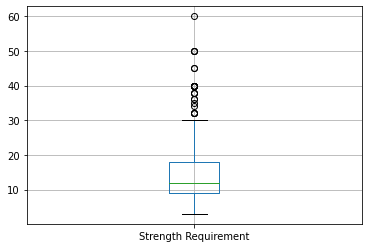

In [52]:
# Filter out rows where X == 0 while keeping original dataset intact
df_Strfiltered = df[df['Strength Requirement'] != 0]
df_Strfiltered.boxplot(column = 'Strength Requirement') #Box plots provide a quick visual representation of the describe function
df_Strfiltered[['Strength Requirement']].describe()

In [53]:
df[df['Strength Requirement'] == 0]  #Check weapons which have zero strength requirement

Name          Category Reinforcement        Damage  \
36       Storm Ruler       Greatswords          Boss   154/0/0/0/0   
67      Demon's Scar     Curved Swords          Boss    0/0/99/0/0   
168        Dark Hand             Fists        Unique  88/0/0/0/150   
169             Fist             Fists       Regular    20/0/0/0/0   
271  Pyromancy Flame  Pyromancy Flames       Regular   0/0/100/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
36    50/35/30/30/35       0/0/0           0/0/0/0      D/D/-/-       100   
67    25/35/65/30/35       0/0/0        0/16/17/17      -/E/D/D       110   
168   65/65/65/65/65       0/0/0           0/0/0/0      C/C/D/D       100   
169        0/0/0/0/0       0/0/0           0/0/0/0      -/-/-/-       100   
271        -/-/-/-/-       0/0/0           0/0/0/0      -/-/C/C       100   

     Weight  ...  Intelligence Requirement  Faith Requirement  Strength Bonus  \
36      8.0  ...                       0.0                0.0               D   
67      0.5  ...                      17.0               17.0               -   
168     0.0  ...                       0.0                0.0               C   
169     0.0  ...                       0.0                0.0               -   
271     0.0  ...                       0.0                0.0               -   

     Dexterity Bonus Intelligence Bonus Faith Bonus  Strength Bonus Percent  \
36                 D                  -           -                      35   
67                 E                  D           D                       0   
168                C                  D           D                      65   
169                -                  -           -                       0   
271                -                  C           C                       0   

     Dexterity Bonus Percent  Intelligence Bonus Percent  Faith Bonus Percent  
36                        35                           0                    0  
67                        10                          35                   35  
168                       65                          35                   35  
169                        0                           0                    0  
271                        0                          65                   65  

[5 rows x 43 columns]

Intrestingly, only five weapons have zero strength requirement.
Using the same method, we can filter for the other stat requirements as well.

On the other hand, 110 weapons have no dex scaling


Dexterity Requirement
count                 177.00
mean                   14.40
std                     4.54
min                     7.00
25%                    11.00
50%                    14.00
75%                    18.00
max                    40.00

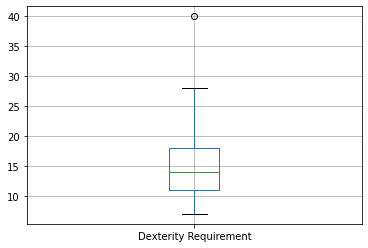

In [54]:
# Filter out rows where X == 0 while keeping original dataset intact
df_Dexfiltered = df[df['Dexterity Requirement'] != 0]
df_Dexfiltered.boxplot(column = 'Dexterity Requirement') #Box plots provide a quick visual representation of the describe function

print('On the other hand,', len(df) - len(df_Dexfiltered),'weapons have no dex scaling')
df_Dexfiltered[['Dexterity Requirement']].describe()

39 weapons have Int scaling


Intelligence Requirement
count                     39.00
mean                      13.64
std                        4.12
min                        9.00
25%                       10.00
50%                       12.00
75%                       16.50
max                       26.00

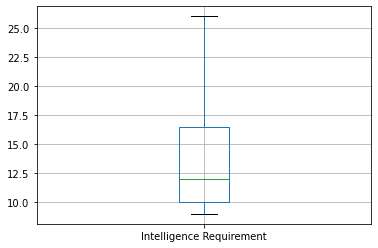

In [55]:
# Filter out rows where X == 0 while keeping original dataset intact
df_Intfiltered = df[df['Intelligence Requirement'] != 0]
df_Intfiltered.boxplot(column = 'Intelligence Requirement') #Box plots provide a quick visual representation of the describe function

print(len(df_Intfiltered),'weapons have Int scaling')
df_Intfiltered[['Intelligence Requirement']].describe()



47 weapons have Faith scaling


Faith Requirement
count              47.00
mean               14.21
std                 4.66
min                 9.00
25%                11.50
50%                13.00
75%                16.00
max                30.00

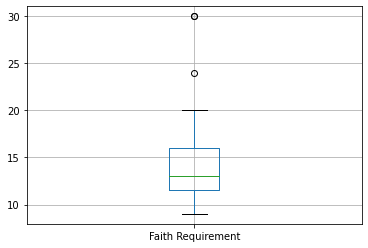

In [56]:
# Filter out rows where X == 0 while keeping original dataset intact
df_Faifiltered = df[df['Faith Requirement'] != 0]
df_Faifiltered.boxplot(column = 'Faith Requirement') #Box plots provide a quick visual representation of the describe function

print(len(df_Faifiltered),'weapons have Faith scaling')
df_Faifiltered[['Faith Requirement']].describe()

Strength appears to be the most important stat for weilding a variety of weapons.\
It has the highest mean requirement of 15, the highest max stat requirment of 60Str and almost every weapon in the game requires at least a tiny amount of strength.

Dex has the next highest mean requirement of 14 and 177 weapons require some amount of dex. 
It is not much of a suprise that the stats that govern physical weapons are vastly overrepresented when comparing the number of physical weapons in the game to the number of magic weapons, with many magical weapons still requiring Str or Dex.\
Most weapons that require Dex fall within the first and third quartile, with only a single weapon requiring a much greater value of dex then the others (40). If a player is only intrested in reaching the minimum stat requirement for the weapon then Dex provides many low value choices.

Intelligence and faith both have a mean requirment of 14, and a vastly reduced number of weapons (39 and 47 respectivly). Similar to dex, most weapons fall within the first and third quartile of their respective stat data. For Faith there are two weapons higher then the 3rd quartile, requiring 30 and 24 Faith.

### Two handing requirements:

A mechanic I have not touched on is two-handing a weapon. When you use two hands to weild a weapon, you sacrifice your ability to hold a second weapon (such as a shield) in your left hand in exchange for a 50% str boost. The category of these end games weapons are predominantly big bulky greatswords and greathammers, and so the reason for such high str requirements is the game expects the player to two hand these weapons until they build up the strength to weild them in one hand.

As mentioned before, wielding a weapon in two hands boosts the players str stat by a flat 50% bonus. So we may find the lowered stat requirements of weapons if the user is willing to give up their left arm.

<code>(x/1.5) + (x % 1.5 > 0)</code><br>
* where x is our strength requirement
* divide by 1.5 as two handing gives a 50% bonus to the strength stat.
* (x%1.5 > 0) takes the modulus of the division<br>
    if there is any remainder then >0 is true and so the bracket evaluates to 1.<br>
This effectivly rounds up the division even if the decimal point is less then 5, this is useful
because if a weapon has a str requirment of 8.3, the player would need 9 str, not 8.

In [57]:
df['Strength Requirement 2 hand'] = round(df['Strength Requirement']/1.5) +(df['Strength Requirement']%1.5 >0)
df

Name Category Reinforcement       Damage Damage Reduction  \
0     Rotten Ghru Dagger  Daggers       Regular   64/0/0/0/0   35/20/15/15/20   
1    Brigand Twindaggers  Daggers       Regular   70/0/0/0/0   35/20/15/15/20   
2     Corvian Greatknife  Daggers       Regular   93/0/0/0/0   40/25/20/20/25   
3                 Dagger  Daggers       Regular   65/0/0/0/0   35/20/15/15/20   
4      Handmaid's Dagger  Daggers       Regular   85/0/0/0/0   30/20/15/15/20   
..                   ...      ...           ...          ...              ...   
282  Saint-tree Bellvine   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
283      Yorshka's Chime   Chimes       Regular   54/0/0/0/0   25/15/10/20/15   
284       Priest's Chime   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
285       Follower Torch  Torches       Regular  90/0/65/0/0   45/30/25/25/30   
286                Torch  Torches       Regular  35/0/80/0/0   30/20/15/15/20   

    Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  ...  \
0        36/0/0          10/8/0/0      E/C/-/-       100     2.0  ...   
1         0/0/0         10/18/0/0      D/D/-/-       125     2.5  ...   
2         0/0/0         12/16/0/0      E/E/-/-       110     2.5  ...   
3         0/0/0           5/9/0/0      E/C/-/-       130     1.5  ...   
4         0/0/0           4/8/0/0      E/E/-/-       110     0.5  ...   
..          ...               ...          ...       ...     ...  ...   
282       0/0/0          3/0/0/18      E/-/-/C       100     0.5  ...   
283       0/0/0          3/0/0/30      D/-/-/A       100     0.5  ...   
284       0/0/0          3/0/0/10      E/-/-/B       100     0.5  ...   
285       0/0/0        14/0/10/10      D/E/E/E       100     6.0  ...   
286       0/0/0           5/0/0/0      D/-/-/-       100     1.0  ...   

     Faith Requirement  Strength Bonus  Dexterity Bonus  Intelligence Bonus  \
0                  0.0               E                C                   -   
1                  0.0               D                D                   -   
2                  0.0               E                E                   -   
3                  0.0               E                C                   -   
4                  0.0               E                E                   -   
..                 ...             ...              ...                 ...   
282               18.0               E                -                   -   
283               30.0               D                -                   -   
284               10.0               E                -                   -   
285               10.0               D                E                   E   
286                0.0               D                -                   -   

    Faith Bonus Strength Bonus Percent  Dexterity Bonus Percent  \
0             -                     10                       65   
1             -                     35                       35   
2             -                     10                       10   
3             -                     10                       65   
4             -                     10                       10   
..          ...                    ...                      ...   
282           C                     10                        0   
283           A                     35                        0   
284           B                     10                        0   
285           E                     35                       10   
286           -                     35                        0   

     Intelligence Bonus Percent  Faith Bonus Percent  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   
..                          ...                  ...   
282                     

Strength Requirement 2 hand
count                       282.00
mean                         10.84
std                           6.57
min                           2.00
25%                           6.00
50%                           8.00
75%                          12.00
max                          40.00

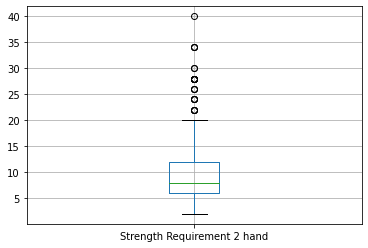

In [58]:
# Filter out rows where X == 0 while keeping original dataset intact
df_Strfiltered2 = df[df['Strength Requirement 2 hand'] != 0]
df_Strfiltered2.boxplot(column = 'Strength Requirement 2 hand') #Box plots provide a quick visual representation of the describe function
df_Strfiltered2[['Strength Requirement 2 hand']].describe()

### Leveling up.

In darksouls 3, all characters start with the same stat total, the choice of class only allocates the initial stat spread which the player may change as they level up.

Hence taking the deprived class as our example, the deprived class starts at level 1 with an even 10 points in every stat. 

Using the total required stat and 10 as a baseline, we can determine how many stat points a player must invest in each stat in order to weild the weapon effectivly.

In [59]:
Requirement = df[['Strength Requirement', "Dexterity Requirement",
                  'Intelligence Requirement', 'Faith Requirement', 'Strength Requirement 2 hand']]
Requirement

Requirement.describe()

Strength Requirement  Dexterity Requirement  Intelligence Requirement  \
count                287.00                 287.00                    287.00   
mean                  15.01                   8.88                      1.85   
std                    9.96                   7.86                      4.92   
min                    0.00                   0.00                      0.00   
25%                    8.00                   0.00                      0.00   
50%                   12.00                  10.00                      0.00   
75%                   18.00                  15.00                      0.00   
max                   60.00                  40.00                     26.00   

       Faith Requirement  Strength Requirement 2 hand  
count             287.00                       287.00  
mean                2.33                        10.65  
std                 5.59                         6.67  
min                 0.00                         0.00  
25%                 0.00                         6.00  
50%                 0.00                         8.00  
75%                 0.00                        12.00  
max                30.00                        40.00

In [60]:
# Subtract 10 from values in column 'A' if greater than or equal to 10
# Store new values in new columns to not modify the old columns
df['Str lvls'] = df.loc[df['Strength Requirement'] >= 10, 'Strength Requirement'] - 10
df['Dex lvls'] = df.loc[df['Dexterity Requirement'] >= 10, 'Dexterity Requirement'] - 10
df['Int lvls'] = df.loc[df['Intelligence Requirement'] >= 10, 'Intelligence Requirement'] - 10
df['Fai lvls'] = df.loc[df['Faith Requirement'] >= 10, 'Faith Requirement'] - 10
df['Str lvls 2 hand'] = df.loc[df['Strength Requirement 2 hand'] >= 10, 'Strength Requirement 2 hand'] - 10


LvlRequirement = df[['Str lvls', "Dex lvls", 'Int lvls', 'Fai lvls', 'Str lvls 2 hand']]


LvlRequirement.describe()

Str lvls  Dex lvls  Int lvls  Fai lvls  Str lvls 2 hand
count    202.00    158.00     35.00     43.00           135.00
mean       8.69      5.15      4.17      4.70             5.67
std        9.63      4.21      4.02      4.58             6.48
min        0.00      0.00      0.00      0.00             0.00
25%        2.00      2.00      1.50      2.00             2.00
50%        6.00      4.00      2.00      4.00             2.00
75%       11.00      8.00      7.50      6.00            10.00
max       50.00     30.00     16.00     20.00            30.00

Unsurpisingly, the mean number of lvls required for each stat is similar to the mean stat requirement -10.

We see that the mean str lvl is 9 instead of 5. This is because we have filtered out many of the low str requirement weapons and so only looking at 202 weapons for Str instead of 282.

### Total level requirement:

Define a column which describes the total number of level ups a player must invest to use the weapon.


In [61]:
LvlRequirement = df[['Str lvls', "Dex lvls", 'Int lvls', 'Fai lvls']]
df['Total Lvl Requirement'] = LvlRequirement.sum(axis=1)
df['Total Lvl Requirement']
df

Name Category Reinforcement       Damage Damage Reduction  \
0     Rotten Ghru Dagger  Daggers       Regular   64/0/0/0/0   35/20/15/15/20   
1    Brigand Twindaggers  Daggers       Regular   70/0/0/0/0   35/20/15/15/20   
2     Corvian Greatknife  Daggers       Regular   93/0/0/0/0   40/25/20/20/25   
3                 Dagger  Daggers       Regular   65/0/0/0/0   35/20/15/15/20   
4      Handmaid's Dagger  Daggers       Regular   85/0/0/0/0   30/20/15/15/20   
..                   ...      ...           ...          ...              ...   
282  Saint-tree Bellvine   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
283      Yorshka's Chime   Chimes       Regular   54/0/0/0/0   25/15/10/20/15   
284       Priest's Chime   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
285       Follower Torch  Torches       Regular  90/0/65/0/0   45/30/25/25/30   
286                Torch  Torches       Regular  35/0/80/0/0   30/20/15/15/20   

    Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  ...  \
0        36/0/0          10/8/0/0      E/C/-/-       100     2.0  ...   
1         0/0/0         10/18/0/0      D/D/-/-       125     2.5  ...   
2         0/0/0         12/16/0/0      E/E/-/-       110     2.5  ...   
3         0/0/0           5/9/0/0      E/C/-/-       130     1.5  ...   
4         0/0/0           4/8/0/0      E/E/-/-       110     0.5  ...   
..          ...               ...          ...       ...     ...  ...   
282       0/0/0          3/0/0/18      E/-/-/C       100     0.5  ...   
283       0/0/0          3/0/0/30      D/-/-/A       100     0.5  ...   
284       0/0/0          3/0/0/10      E/-/-/B       100     0.5  ...   
285       0/0/0        14/0/10/10      D/E/E/E       100     6.0  ...   
286       0/0/0           5/0/0/0      D/-/-/-       100     1.0  ...   

     Dexterity Bonus Percent  Intelligence Bonus Percent  Faith Bonus Percent  \
0                         65                           0                    0   
1                         35                           0                    0   
2                         10                           0                    0   
3                         65                           0                    0   
4                         10                           0                    0   
..                       ...                         ...                  ...   
282                        0                           0                   65   
283                        0                           0                  120   
284                        0                           0                   90   
285                       10                          10                   10   
286                        0                           0                    0   

     Strength Requirement 2 hand Str lvls Dex lvls  Int lvls  Fai lvls  \
0                            8.0      0.0      NaN       NaN       NaN   
1                            8.0      0.0      8.0       NaN       NaN   
2                            8.0      2.0      6.0       NaN       NaN   
3                            4.0      NaN      NaN       NaN       NaN   
4                            4.0      NaN      NaN       NaN       NaN   
..                           ...      ...      ...       ...       ...   
282                          2.0      NaN      NaN       NaN       8.0   
283                          2.0      NaN      NaN       NaN      20.0   
284                          2.0      NaN      NaN       NaN       0.0   
285                         10.0      4.0      NaN       0.0       0.0   
286                          4.0      NaN      NaN       NaN       NaN   

     Str lvls 2 hand  Total Lvl Requirement  
0                NaN                    0.0  
1                NaN                    8.0  
2                NaN                    8.0  
3                NaN                    0.0  
4                NaN                    0.0  
..               ...            

In [62]:
df[['Total Lvl Requirement']].describe()

Total Lvl Requirement
count                 287.00
mean                   10.17
std                     9.66
min                     0.00
25%                     2.00
50%                     8.00
75%                    14.00
max                    60.00

The mean total lvl requirement of all the weapons is 10. Due to the high max requirment of 60, a better measure would be the midpoint, 8. This seems reasonable from a gameplay perspective to have most of your weapons have a low stat requirement as investing in non damage stats are just as important for the player to balance their level up points.

### How early can we use these weapons?


Now that we have the stat points needed to be invested to weild each weapon, we can classify the weapons based on how early the player can weild them. 

* Class early game as needing 0-10 lvl ups
* Mid game needing 11-30
* End game needing 31-90

This does not take into consideration the endurance required to boost equip load as heavier weapons may be weilded by wearing lighter armour.

This also does not take into consideration the actual point in gameplay of each weapon which dictates the point the player may actually obtain it, and so some later boss weapons may be counted as "early game" for a low stat investment.

Again it should be stated that we are basing this analysis off a player who chose the "Deprived class", which has a well balanced stat distribution of 10 points in each stat. A player who chose the knight class would start with 13 str, 12dex, 9 Fai and 9dex, and so would have slightly different lvl requirements.

In [63]:
df['Lvl category'] = pd.cut(df['Total Lvl Requirement'], [-1, 10, 30, 90], labels=['Start Game', 'Mid Game', 'End Game'])

df[df['Lvl category'] == 'Start Game']
df[df['Lvl category'] == 'Mid Game']
df[df['Lvl category'] == 'End Game']

Name           Category Reinforcement  \
48              Fume Ultra Greatsword  Ultra Greatswords        Unique   
50   Ringed Knight Paired Greatswords  Ultra Greatswords        Unique   
76                       Frayed Blade            Katanas          Boss   
103             Black Knight Greataxe          Greataxes        Unique   
120               Ledo's Great Hammer      Great Hammers        Unique   
121              Morne's Great Hammer      Great Hammers        Unique   
126             Smough's Great Hammer      Great Hammers        Unique   
244                 Giant Door Shield       Greatshields       Regular   
255                    Moaning Shield       Greatshields        Unique   

           Damage Damage Reduction Aux Effects Stat Requirements Stat Bonuses  \
48    149/0/0/0/0   80/55/65/60/65       0/0/0         50/10/0/0      A/E/-/-   
50   185/0/11/0/0   50/40/35/35/40       0/0/0         40/15/0/0      C/E/E/E   
76   101/0/0/0/41   45/25/30/15/40      0/34/0         11/40/0/0      E/B/-/-   
103   201/0/0/0/0   60/45/50/40/45       0/0/0         36/18/0/0      C/D/-/-   
120   170/0/0/0/0   85/55/60/55/55       0/0/0          60/0/0/0      B/-/-/-   
121   200/0/0/0/0   70/50/45/45/50       0/0/0         50/0/0/30      D/-/-/D   
126   205/0/0/0/0   70/50/45/45/50       0/0/0          45/0/0/0      C/-/-/-   
244   107/0/0/0/0  100/75/45/80/75       0/0/0          45/0/0/0      C/-/-/-   
255   136/0/0/0/0  100/81/69/76/67       0/0/0          50/0/0/0      D/-/-/-   

     Critical  Weight  ...  Intelligence Bonus Percent  Faith Bonus Percent  \
48        100    25.5  ...                           0                    0   
50        100    22.5  ...                          10                   10   
76        100     8.0  ...                           0                    0   
103       100    19.5  ...                           0                    0   
120       100    28.0  ...                           0                    0   
121       100    24.0  ...                           0                   35   
126       100    24.0  ...                           0                    0   
244       100    21.5  ...                           0                    0   
255       100    21.5  ...                           0                    0   

     Strength Requirement 2 hand  Str lvls Dex lvls Int lvls  Fai lvls  \
48                          34.0      40.0      0.0      NaN       NaN   
50                          28.0      30.0      5.0      NaN       NaN   
76                           8.0       1.0     30.0      NaN       NaN   
103                         24.0      26.0      8.0      NaN       NaN   
120                         40.0      50.0      NaN      NaN       NaN   
121                         34.0      40.0      NaN      NaN      20.0   
126                         30.0      35.0      NaN      NaN       NaN   
244                         30.0      35.0      NaN      NaN       NaN   
255                         34.0      40.0      NaN      NaN       NaN   

     Str lvls 2 hand  Total Lvl Requirement  Lvl category  
48              24.0                   40.0      End Game  
50              18.0                   35.0      End Game  
76               NaN                   31.0      End Game  
103             14.0                   34.0      End Game  
120             30.0                   50.0      End Game  
121             24.0                   60.0      End Game  
126             20.0                   35.0      End Game  
244             20.0                   35.0      End Game  
255             24.0                   40.0      End Game  

[9 rows x 51 columns]

Out of intrest I have highlighted all the weapons with the highest level up requirements. These weapons are interesting because a player must invest a lot of level ups into a single stat in order to weild them, making them difficult to use even if obtained early. 

Take Ledo's Great Hammer for example, it has a total lvl up requirement of 50 points into strength. \
A player can not afford to place their first 50 level ups all into strength, as their health, endurance and carrying capacity would suffer, and so the true level requirment is much higher then 50.

Other then the Frayed blade requiring 40dex, for all these end game weapons the stat requirement that's so high is strength. 

Repeat for the 2-handed requirements, to see how the weapon classifications change accounting for players using the two hand mechanic.

In [64]:
LvlRequirement2hand = df[['Str lvls 2 hand', "Dex lvls", 'Int lvls', 'Fai lvls']]

df['Total Lvl Requirement 2 hand'] = LvlRequirement2hand.sum(axis=1)


df['Lvl category 2 hand'] = pd.cut(df['Total Lvl Requirement 2 hand'], [-1, 10, 30, 90], labels=['Start Game (twoH)', 'Mid Game(twoH)', 'End Game(twoH)'])

df[df['Lvl category 2 hand'] == 'Start Game(twoH)']
df[df['Lvl category 2 hand'] == 'Mid Game(twoH)']
df[df['Lvl category 2 hand'] == 'End Game(twoH)']

Name       Category Reinforcement       Damage  \
121  Morne's Great Hammer  Great Hammers        Unique  200/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
121   70/50/45/45/50       0/0/0         50/0/0/30      D/-/-/D       100   

     Weight  ...  Strength Requirement 2 hand  Str lvls  Dex lvls  Int lvls  \
121    24.0  ...                         34.0      40.0       NaN       NaN   

    Fai lvls Str lvls 2 hand  Total Lvl Requirement  Lvl category  \
121     20.0            24.0                   60.0      End Game   

     Total Lvl Requirement 2 hand  Lvl category 2 hand  
121                          44.0       End Game(twoH)  

[1 rows x 53 columns]

When two handling weapons, the stat investment drops massively as strength makes up the most of the level ups<br>
The only weapon that still fits the end game category is Morne's Great Hammer, which has a high strength requirement of 50(34) and a Faith investment of 30.


#### Finally, output df again to view the dataframe with all the edited columns

In [65]:
df

Name Category Reinforcement       Damage Damage Reduction  \
0     Rotten Ghru Dagger  Daggers       Regular   64/0/0/0/0   35/20/15/15/20   
1    Brigand Twindaggers  Daggers       Regular   70/0/0/0/0   35/20/15/15/20   
2     Corvian Greatknife  Daggers       Regular   93/0/0/0/0   40/25/20/20/25   
3                 Dagger  Daggers       Regular   65/0/0/0/0   35/20/15/15/20   
4      Handmaid's Dagger  Daggers       Regular   85/0/0/0/0   30/20/15/15/20   
..                   ...      ...           ...          ...              ...   
282  Saint-tree Bellvine   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
283      Yorshka's Chime   Chimes       Regular   54/0/0/0/0   25/15/10/20/15   
284       Priest's Chime   Chimes       Regular   52/0/0/0/0   25/15/10/15/15   
285       Follower Torch  Torches       Regular  90/0/65/0/0   45/30/25/25/30   
286                Torch  Torches       Regular  35/0/80/0/0   30/20/15/15/20   

    Aux Effects Stat Requirements Stat Bonuses  Critical  Weight  ...  \
0        36/0/0          10/8/0/0      E/C/-/-       100     2.0  ...   
1         0/0/0         10/18/0/0      D/D/-/-       125     2.5  ...   
2         0/0/0         12/16/0/0      E/E/-/-       110     2.5  ...   
3         0/0/0           5/9/0/0      E/C/-/-       130     1.5  ...   
4         0/0/0           4/8/0/0      E/E/-/-       110     0.5  ...   
..          ...               ...          ...       ...     ...  ...   
282       0/0/0          3/0/0/18      E/-/-/C       100     0.5  ...   
283       0/0/0          3/0/0/30      D/-/-/A       100     0.5  ...   
284       0/0/0          3/0/0/10      E/-/-/B       100     0.5  ...   
285       0/0/0        14/0/10/10      D/E/E/E       100     6.0  ...   
286       0/0/0           5/0/0/0      D/-/-/-       100     1.0  ...   

     Strength Requirement 2 hand  Str lvls  Dex lvls  Int lvls Fai lvls  \
0                            8.0       0.0       NaN       NaN      NaN   
1                            8.0       0.0       8.0       NaN      NaN   
2                            8.0       2.0       6.0       NaN      NaN   
3                            4.0       NaN       NaN       NaN      NaN   
4                            4.0       NaN       NaN       NaN      NaN   
..                           ...       ...       ...       ...      ...   
282                          2.0       NaN       NaN       NaN      8.0   
283                          2.0       NaN       NaN       NaN     20.0   
284                          2.0       NaN       NaN       NaN      0.0   
285                         10.0       4.0       NaN       0.0      0.0   
286                          4.0       NaN       NaN       NaN      NaN   

    Str lvls 2 hand  Total Lvl Requirement  Lvl category  \
0               NaN                    0.0    Start Game   
1               NaN                    8.0    Start Game   
2               NaN                    8.0    Start Game   
3               NaN                    0.0    Start Game   
4               NaN                    0.0    Start Game   
..              ...                    ...           ...   
282             NaN                    8.0    Start Game   
283             NaN                   20.0      Mid Game   
284             NaN                    0.0    Start Game   
285             0.0                    4.0    Start Game   
286             NaN                    0.0    Start Game   

     Total Lvl Requirement 2 hand  Lvl category 2 hand  
0                             0.0    Start Game (twoH)  
1                             8.0    Start Game (twoH)  
2                             6.0    Start Game (twoH)  
3                             0.0    Start Game (twoH)  
4                             0.0    Start Game (twoH)  
..                            ...                  ...  
282                           8.0    Start Game (twoH)  
283                          20.0       Mid Game(twoH)  
284                           0.0  

### Keeping track of all our headings:

In [66]:
df.keys()

Index(['Name', 'Category', 'Reinforcement', 'Damage', 'Damage Reduction',
       'Aux Effects', 'Stat Requirements', 'Stat Bonuses', 'Critical',
       'Weight', 'Stability', 'Durability', 'Spell Buff', 'Range', 'Buffable',
       'Infusable', 'Physical damage', 'Magic damage', 'Fire damage',
       'Lightning damage', 'Dark damage', 'Total damage', 'Physical Reduction',
       'Magic Reduction', 'Fire Reduction', 'Lightning Reduction',
       'Dark Reduction', 'Mean Reduction', 'Poison', 'Bleed', 'Frostbite',
       'Strength Requirement', 'Dexterity Requirement',
       'Intelligence Requirement', 'Faith Requirement', 'Strength Bonus',
       'Dexterity Bonus', 'Intelligence Bonus', 'Faith Bonus',
       'Strength Bonus Percent', 'Dexterity Bonus Percent',
       'Intelligence Bonus Percent', 'Faith Bonus Percent',
       'Strength Requirement 2 hand', 'Str lvls', 'Dex lvls', 'Int lvls',
       'Fai lvls', 'Str lvls 2 hand', 'Total Lvl Requirement', 'Lvl category',
       'Total Lvl 

# Defining our weapon groups <a id='Defining_Weapon_Groups'></a>
As stated earlier, it is better to wait until after the df has been edited fully before defining our new smaller groups. This way all the new columns are carried forwards. 

We will redefine Shields the same way as in our [Category explored section](#Category_explored)

This time, we will define a function that can take many inputs of Category names.

I will also drop columns from data groups where applicable.
i.e only want to compare range for weapon categories that actually have range.

In [372]:
def in_or_not(dataframe, Column, Rows):
    Mask = dataframe[Column].isin(Rows)
    Group = dataframe[Mask]   # Filters dataframe to only include rows
    nonGroup = dataframe[~Mask]  # Filters dataframe to exclude rows
    
    return(Group, nonGroup)     # Returns both to be called upon

inResult = in_or_not(df,'Category', ['Small Shields', 'Normal Shields', 'Greatshields']) 

# No Shield has a Range or Spell Buff stat, can drop those columns.
Shields, nonShields = inResult[0].drop(['Range', 'Spell Buff'], axis=1), inResult[1]

# Be careful choosing which columns to drop. No Shield has a Frostbite stat, but there are Shields with Bleed and Poison. 
# Hence it is useful to keep Frostbite column to compare auxiliary effects.
Shields

Name       Category Reinforcement       Damage  \
195      Elkhorn Round Shield  Small Shields       Regular   69/0/0/0/0   
196         Hawkwood's Shield  Small Shields       Regular   72/0/0/0/0   
197         Iron Round Shield  Small Shields       Regular   71/0/0/0/0   
198    Warrior's Round Shield  Small Shields       Regular   74/0/0/0/0   
199       Eastern Iron Shield  Small Shields       Regular   81/0/0/0/0   
..                        ...            ...           ...          ...   
253         Stone Greatshield   Greatshields       Regular  115/0/0/0/0   
254       Havel's Greatshield   Greatshields        Unique  143/0/0/0/0   
255            Moaning Shield   Greatshields        Unique  136/0/0/0/0   
256      Greatshield of Glory   Greatshields        Unique  134/0/0/0/0   
257  Dragonslayer Greatshield   Greatshields          Boss  134/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
195   59/63/33/36/25       0/0/0           8/0/0/0      E/-/-/-       100   
196   56/35/58/45/55       0/0/0           5/0/0/0      E/-/-/-       100   
197   67/44/38/19/36       0/0/0           5/0/0/0      E/-/-/-       100   
198   62/68/45/46/36       0/0/0          10/0/0/0      E/-/-/-       100   
199   85/40/41/22/39       0/0/0           8/0/0/0      D/-/-/-       100   
..               ...         ...               ...          ...       ...   
253  100/75/71/71/75       0/0/0          38/0/0/0      D/-/-/-       100   
254  100/83/83/82/83       0/0/0          40/0/0/0      D/-/-/-       100   
255  100/81/69/76/67       0/0/0          50/0/0/0      D/-/-/-       100   
256  100/70/65/52/63       0/0/0          40/0/0/0      D/-/-/-       100   
257  100/71/70/95/77       0/0/0          38/0/0/0      D/-/-/-       100   

     Weight  ...  Str lvls  Dex lvls Int lvls Fai lvls  Str lvls 2 hand  \
195     1.5  ...       NaN       NaN      NaN      NaN              NaN   
196     2.0  ...       NaN       NaN      NaN      NaN              NaN   
197     2.0  ...       NaN       NaN      NaN      NaN              NaN   
198     1.5  ...       0.0       NaN      NaN      NaN              NaN   
199     3.0  ...       NaN       NaN      NaN      NaN              NaN   
..      ...  ...       ...       ...      ...      ...              ...   
253    18.0  ...      28.0       NaN      NaN      NaN             16.0   
254    28.0  ...      30.0       NaN      NaN      NaN             18.0   
255    21.5  ...      40.0       NaN      NaN      NaN             24.0   
256    18.5  ...      30.0       NaN      NaN      NaN             18.0   
257    26.0  ...      28.0       NaN      NaN      NaN             16.0   

     Total Lvl Requirement  Lvl category  Total Lvl Requirement 2 hand  \
195                    0.0    Start Game                           0.0   
196                    0.0    Start Game                           0.0   
197                    0.0    Start Game                           0.0   
198                    0.0    Start Game                           0.0   
199                    0.0    Start Game                           0.0   
..                     ...           ...                           ...   
253                   28.0      Mid Game                          16.0   
254                   30.0      Mid Game                          18.0   
255                   40.0      End Game                          24.0   
256                   30.0      Mid Game                          18.0   
257                   28.0      Mid Game                          16.0   

     Lvl category 2 hand  Total Stat Requirement  
195    Start Game (twoH)                     8.0  
196    Start Game (twoH)                     5.0  
197    Start Game (twoH)                     5.0  
198    Start Game (twoH)                    10.0  
199    Start Game (twoH)                     8.0  
..                   ...                     ...  
253       Mid Game(twoH)                    38.0  
2

All weapon categories can be used to block attacks except bows, greatbows and crossbows, so can drop defence stats from ranged table as well as Spell Buff again.<br>
Can also drop Aux effects as no bows have any Aux effects

In [326]:
# See our generalised function works for classifying groups quickly
inResult= in_or_not(df,'Category', ['Bows', 'Greatbows', 'Crossbows'])
Ranged, nonRanged = inResult[0].drop(['Spell Buff', 'Poison','Bleed','Frostbite', 'Stability',
                          'Physical Reduction', 'Magic Reduction', 'Fire Reduction', 
                          'Lightning Reduction','Dark Reduction'], axis=1), inResult[1]
Ranged

Name   Category Reinforcement       Damage  \
178        Dragonrider Bow       Bows          Boss  110/0/0/0/0   
179              Short Bow       Bows       Regular   77/0/0/0/0   
180       Darkmoon Longbow       Bows          Boss  36/44/0/0/0   
181          Composite Bow       Bows       Regular   73/0/0/0/0   
182                Longbow       Bows       Regular   82/0/0/0/0   
183        White Birch Bow       Bows        Unique   82/0/0/0/0   
184    Black Bow of Pharis       Bows       Regular   67/0/0/0/0   
185     Onislayer Greatbow  Greatbows        Unique  111/0/0/0/0   
186      Millwood Greatbow  Greatbows        Unique  139/0/0/0/0   
187  Dragonslayer Greatbow  Greatbows        Unique  126/0/0/0/0   
188     Repeating Crossbow  Crossbows          Boss   77/0/0/0/0   
189         Heavy Crossbow  Crossbows       Regular   72/0/0/0/0   
190        Sniper Crossbow  Crossbows       Regular   70/0/0/0/0   
191                 Avelyn  Crossbows       Regular   64/0/0/0/0   
192         Light Crossbow  Crossbows       Regular   64/0/0/0/0   
193               Arbalest  Crossbows       Regular   78/0/0/0/0   
194      Knight's Crossbow  Crossbows       Regular  40/0/0/40/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
178        -/-/-/-/-       0/0/0         19/15/0/0      D/E/-/-       100   
179        -/-/-/-/-       0/0/0          7/12/0/0      E/D/-/-       100   
180        -/-/-/-/-       0/0/0         7/16/10/0      -/E/C/-       100   
181        -/-/-/-/-       0/0/0         12/12/0/0      D/D/-/-       100   
182        -/-/-/-/-       0/0/0          9/14/0/0      E/D/-/-       100   
183        -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
184        -/-/-/-/-       0/0/0          9/18/0/0      E/C/-/-       100   
185        0/0/0/0/0       0/0/0         18/24/0/0      E/C/-/-       100   
186        0/0/0/0/0       0/0/0         28/12/0/0      C/E/-/-       100   
187        0/0/0/0/0       0/0/0         20/20/0/0      D/D/-/-       100   
188        0/0/0/0/0       0/0/0         16/20/0/0      -/-/-/-       100   
189        0/0/0/0/0       0/0/0          14/8/0/0      -/-/-/-       100   
190        0/0/0/0/0       0/0/0         18/16/0/0      -/-/-/-       100   
191        0/0/0/0/0       0/0/0         16/14/0/0      -/-/-/-       100   
192        0/0/0/0/0       0/0/0          10/8/0/0      -/-/-/-       100   
193        0/0/0/0/0       0/0/0          18/8/0/0      -/-/-/-       100   
194        0/0/0/0/0       0/0/0          12/8/0/0      -/-/-/-       100   

     Weight  ...  Str lvls  Dex lvls Int lvls Fai lvls  Str lvls 2 hand  \
178     6.5  ...       9.0       5.0      NaN      NaN              4.0   
179     2.0  ...       NaN       2.0      NaN      NaN              NaN   
180     4.5  ...       NaN       6.0      0.0      NaN              NaN   
181     3.5  ...       2.0       2.0      NaN      NaN              NaN   
182     4.0  ...       NaN       4.0      NaN      NaN              NaN   
183     2.5  ...       NaN      10.0      NaN      NaN              NaN   
184     3.0  ...       NaN       8.0      NaN      NaN              NaN   
185     7.5  ...       8.0      14.0      NaN      NaN              2.0   
186     9.0  ...      18.0       2.0      NaN      NaN             10.0   
187    10.0  ...      10.0      10.0      NaN      NaN              4.0   
188     7.5  ...       6.0      10.0      NaN      NaN              2.0   
189     4.5  ...       4.0       NaN      NaN      NaN              0.0   
190     7.5  ...       8.0       6.0      NaN      NaN              2.0   
191     7.5  ...       6.0       4.0      NaN      NaN              2.0   
192     3.0  ...       0.0       NaN      NaN      NaN              NaN   
193     6.0  ...       8.0       NaN      NaN      NaN              2.0   
194     4.0  ...       2.0       NaN      NaN      NaN              NaN   

     Total Lvl Requirement  Lvl category  Total Lvl Require

In [327]:
# Magic types are easiest to group together after shields 
# I will call Talismans and Chimes holy staffs as we expect them to scale off faith bar outliers
inResult= in_or_not(df, 'Category', ['Talismans', 'Chimes'])
HolyStaff, nonHolyStaff = inResult[0].drop(['Range', 'Poison','Bleed','Frostbite'], axis=1), inResult[1]

# Now group the different magic weapons into one data frame. this may or may not provide some useful comparisons
inResult= in_or_not(df, 'Category', ['Talismans', 'Chimes', 'Staves', 'Pyromancy Flames'])
Staff, nonStaff = inResult[0].drop(['Range', 'Poison','Bleed','Frostbite'], axis=1), inResult[1]

# Fists and claws generally pair well together:
inResult= in_or_not(df,'Category', ['Fists', 'Claws'])
Punch, nonPunch = inResult[0].drop(['Range', 'Spell Buff'], axis=1), inResult[1]

# Most of the other weapon types are less closesly affiliated, but may still be grouped
inResult= in_or_not(df,'Category', ['Greatswords', 'Curved Greatswords', 'Ultra Greatswords', 
                                     'Straight Swords', 'Curved Swords', 'Daggers', 
                                     'Thrusting Swords','Katanas' ])
Swords, nonSwords = inResult[0].drop(['Range'], axis=1), inResult[1]
Swords['Category'].unique()


# finally it makes sense to group the weapons by melee as we have magic, ranged and shields already. 
# Quicker to define what isnt melee and then use .unique() to check
inResult= in_or_not(df, 'Category', ['Talismans', 'Chimes', 'Staves', 'Pyromancy Flames',
                                   'Bows', 'Greatbows', 'Crossbows',
                                   'Small Shields', 'Normal Shields', 'Greatshields'])
Melee  = inResult[1].drop(['Range'], axis=1)
Melee['Category'].unique()


['Daggers', 'Straight Swords', 'Greatswords', 'Ultra Greatswords', 'Curved Swords', ..., 'Reapers', 'Fists', 'Claws', 'Whips', 'Torches']
Length: 20
Categories (20, object): ['Daggers' < 'Straight Swords' < 'Greatswords' < 'Ultra Greatswords' ... 'Fists' < 'Claws' < 'Whips' < 'Torches']

In [328]:
df['Category'].unique()

['Daggers', 'Straight Swords', 'Greatswords', 'Ultra Greatswords', 'Curved Swords', ..., 'Staves', 'Pyromancy Flames', 'Talismans', 'Chimes', 'Torches']
Length: 30
Categories (30, object): ['Daggers' < 'Straight Swords' < 'Greatswords' < 'Ultra Greatswords' ... 'Pyromancy Flames' < 'Talismans' < 'Chimes' < 'Torches']

I now have a series of broad classes that encompess different categories. \
Shields, Holy_staff, Staff, Punch, Ranger, Swords and Melee.

The dataframe df itself remains unchanged.

To keep track of the groups I have made, I will define a dictionary of dataframe names.<br>
An additional benefit is that I will be able to call the name of the dictonary as a string for use in functions.

In [329]:
# Store DataFrames in a dictionary with names as keys
df_dict = {'Weapons': df, 
           'Shields': Shields,
           'Ranged': Ranged,
           'HolyStaff': HolyStaff,
           'Staff': Staff,
           'Punch': Punch,
           'Swords': Swords,
           'Melee': Melee}
df_dict.keys()

dict_keys(['Weapons', 'Shields', 'Ranged', 'HolyStaff', 'Staff', 'Punch', 'Swords', 'Melee'])

## Mean by Categories!
There are now many many values to keep track of within the dataframe.<br>
If a player wants to compare weapon categories, a quick way to do this would be to define a table grouping all the weapons by 'Category' and displaying the mean value of each column.<br>

To avoid zero's creating unfairly weighted means, I have used the <code>.replace(0, np.NaN)</code> function to remove zeros from the data before the mean is calculated. <br>
This allows one to view from the table that the mean value of Greatswords that do magic damage is 96, instead of a less useful value of 18 due to the vast majority of Greatswords being non-magic.


In [330]:
dfByCatMean = df[['Physical damage','Magic damage','Lightning damage','Fire damage', 'Dark damage', 'Total damage',
                  'Physical Reduction', 'Magic Reduction', 'Fire Reduction', 'Lightning Reduction', 'Dark Reduction', 
                  'Poison', 'Bleed', 'Frostbite',
                  'Strength Requirement', 'Dexterity Requirement',
                  'Intelligence Requirement', 'Faith Requirement', 'Total Lvl Requirement', 'Total Lvl Requirement 2 hand',
                  'Strength Bonus Percent', 'Dexterity Bonus Percent',
                  'Intelligence Bonus Percent', 'Faith Bonus Percent',
                  'Critical', 'Weight', 'Stability', 'Durability', 'Spell Buff', 'Range', "Category"]].replace(0, np.NaN).groupby("Category").mean()
dfByCatMean

Physical damage  Magic damage  Lightning damage  \
Category                                                              
Daggers                       75.38         67.00               NaN   
Straight Swords              108.82         77.00               NaN   
Greatswords                  129.94         95.67              71.0   
Ultra Greatswords            153.45           NaN              87.0   
Curved Swords                100.21         70.00               NaN   
Katanas                      113.12           NaN               NaN   
Curved Greatswords           140.00           NaN               NaN   
Thrusting Swords              94.33         82.00               NaN   
Axes                         120.10           NaN             105.0   
Greataxes                    178.86           NaN              74.0   
Hammers                      109.50         70.00               NaN   
Great Hammers                165.00           NaN               NaN   
Spears                        99.06         77.00              52.0   
Pikes                        114.40           NaN               NaN   
Halberds                     133.09           NaN               NaN   
Reapers                      103.00         77.00               NaN   
Fists                         77.50           NaN               NaN   
Claws                         86.00           NaN               NaN   
Whips                         88.60           NaN               NaN   
Bows                          75.29         44.00               NaN   
Greatbows                    125.33           NaN               NaN   
Crossbows                     66.43           NaN              40.0   
Small Shields                 73.78           NaN               NaN   
Normal Shields                86.55           NaN               NaN   
Greatshields                 120.88           NaN               NaN   
Staves                        78.17           NaN               NaN   
Pyromancy Flames                NaN           NaN               NaN   
Talismans                     59.50           NaN               NaN   
Chimes                        61.57           NaN               NaN   
Torches                       62.50           NaN               NaN   

                    Fire damage  Dark damage  Total damage  \
Category                                                     
Daggers                     NaN         22.0         82.23   
Straight Swords            11.0          NaN        114.00   
Greatswords                86.0        115.0        170.25   
Ultra Greatswords          45.0          NaN        169.55   
Curved Swords              80.5          NaN        113.60   
Katanas                     NaN         41.0        118.25   
Curved Greatswords          NaN          NaN        140.00   
Thrusting Swords            NaN          NaN        108.00   
Axes                        NaN          NaN        130.60   
Greataxes                  88.0          NaN        202.00   
Hammers                     NaN          NaN        118.25   
Great Hammers              84.5          NaN        177.07   
Spears                     89.5          NaN        121.56   
Pikes                      12.0          NaN        116.80   
Halberds                   75.0         74.0        146.64   
Reapers                     NaN          NaN        122.25   
Fists                      77.0        150.0        134.25   
Claws                       NaN          NaN         86.00   
Whips                      80.0          NaN        104.60   
Bows                        NaN          NaN         81.57   
Greatbows                   NaN          NaN        125.33   
Crossbows                   NaN          NaN         72.14   
Small Shields              12.0          NaN         74.44   
Normal Shields              NaN          NaN         86.55   
Greatshields                NaN        100.0        127.12   
Staves                      NaN         20.0         79.83   
Pyromancy F

In [331]:
dfByCatMean[['Total Lvl Requirement', 'Total Lvl Requirement 2 hand']]

Total Lvl Requirement  Total Lvl Requirement 2 hand
Category                                                               
Daggers                              5.44                          5.22
Straight Swords                      7.58                          5.83
Greatswords                         13.47                          8.47
Ultra Greatswords                   20.64                         12.36
Curved Swords                        8.40                          7.40
Katanas                             16.62                         13.88
Curved Greatswords                  20.40                         14.20
Thrusting Swords                     6.17                          5.67
Axes                                 8.50                          5.40
Greataxes                           24.14                         14.14
Hammers                              5.43                          6.67
Great Hammers                       24.21                         13.93
Spears                               9.62                          7.40
Pikes                               12.60                          7.40
Halberds                            15.09                          9.00
Reapers                             12.00                          8.50
Fists                               10.00                          4.00
Claws                                7.00                          7.00
Whips                                8.60                          8.60
Bows                                 6.86                          5.86
Greatbows                           20.67                         14.00
Crossbows                            9.00                          7.00
Small Shields                        2.75                          2.33
Normal Shields                       4.06                          2.00
Greatshields                        24.81                         14.06
Staves                               6.18                          5.82
Pyromancy Flames                    11.00                          6.00
Talismans                            8.80                          8.80
Chimes                              10.00                         10.00
Torches                              4.00                           NaN

---
# Data Plotting:

Useful for visulising large amounts of data, showing patterns within the data that are not immediatly obvious from looking through a table. Anomalous results will stand out more in graph format.

## Weapon Categories

Text(0.5, 0.98, 'Weapon Categories')

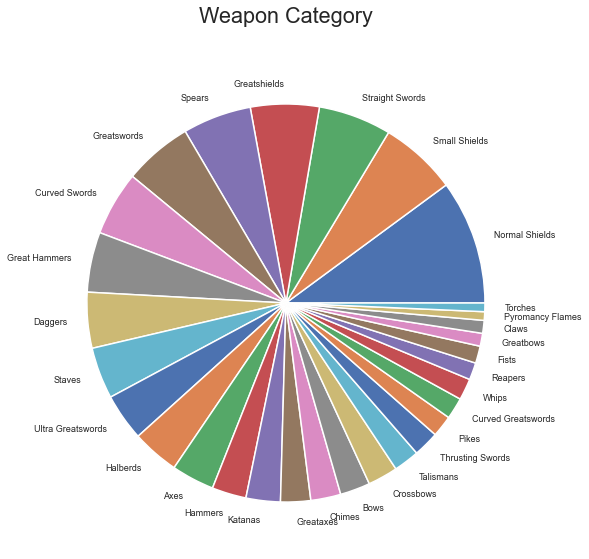

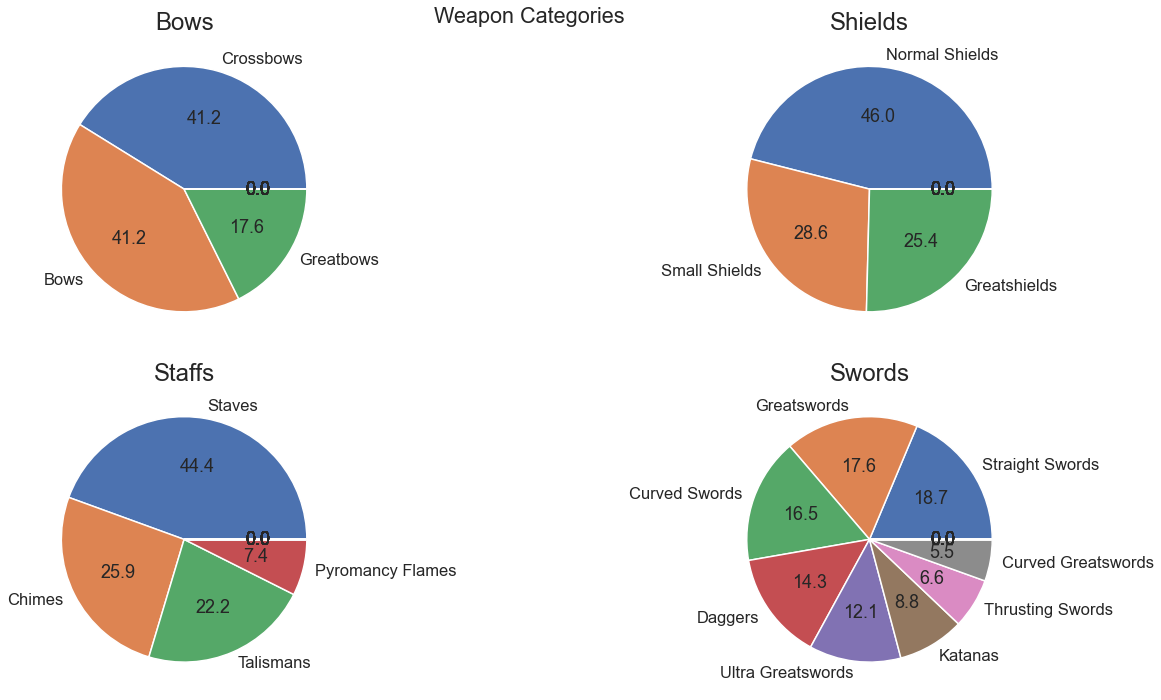

In [332]:
# For the type column we can use a pie chart for example.

sns.set(context='talk') #Style

# Set figure
fig = plt.figure(figsize=(16, 8))
df['Category'].value_counts().plot(kind='pie', textprops={'fontsize': 9})
fig.suptitle('Weapon Category')

# A pie chart doesnt need a label along x-y axis if we give it a neater title
plt.xlabel('')
plt.ylabel('')
# Removing unecessary white space.
plt.tight_layout()

# ===============================================================
# Plotting multiple pie charts in one figure.
# Plot weapon categories within the broader groups defined earlier.
# Defining the figure and axes.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Creating the pie charts on their respective axes.
Ranged['Category'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%.1f')
                            
Shields['Category'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%.1f')
Staff['Category'].value_counts().plot(kind='pie', ax=axes[1,0], autopct='%.1f')
Swords['Category'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%.1f')

# "Removing" the y axis labels.
axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_title('Bows', fontsize = 24)
axes[0,1].set_title('Shields', fontsize = 24)
axes[1,0].set_title('Staffs', fontsize = 24)
axes[1,1].set_title('Swords', fontsize = 24)

# Removing unecessary white space.
plt.tight_layout()
# Adding an overall title.
fig.suptitle('Weapon Categories')

We can see there is an equal proportion of crossbows to bows within the game, with Greatbows making up the small remainder. For shields, 1/4 make up Greatshields and small shields each, and the remaining half makes up Normal shields.

This is useful information for a player to know that if they choose to specalise in one category, how many options will be available to them relative to similar categories.

A pie chart is useful for showing what proportion of each category makes up the whole. However, it does not display the actual count. Furthermore, so many different categories quickly gets harder to read as the slices get smaller. Instead a histogram may be better for displaying counts.

Reading from data set directly such as \
<code>sns.barplot(y =df['Category'].unique(),x = df['Category'].value_counts() )</code><br>
leads to the counts being out of order with the weapon category, as value_counts lists from most frequent to least freqeunt, and .unique takes the categories in order used in the data frame.

need to reset the index to match the value count to the category

In weapon count, the weapon category has become the new index and the count is labeled as 'Category'

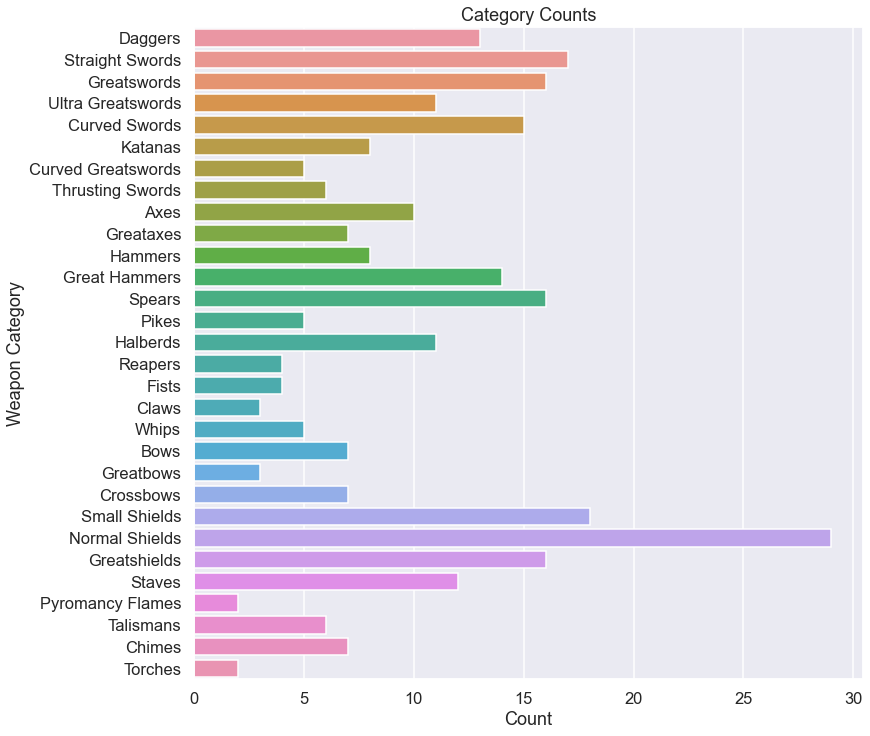

In [333]:
#Horizontal histogram better for reading so many labels

weaponCounts = df['Category'].value_counts()

# Set figure and plot
plt.figure(figsize=(12, 12))
sns.barplot(x=weaponCounts.values, y=weaponCounts.index, orient='h')

plt.xlabel('Count')
plt.ylabel('Weapon Category')
plt.title('Category Counts')

plt.show()

In [334]:
weaponCounts.describe()

count    30.00
mean      9.57
std       6.11
min       2.00
25%       5.00
50%       7.50
75%      13.75
max      29.00
Name: Category, dtype: float64

From this histogram we can see that most of the Categories have between 8-16 weapons with normal shields taking up a disproportionate 29 weapons. \
The lowest number of weapons in any category is 2, shared by Torches and Pyromancy Flames.

The describe function compliments the visual representation on the graph.<br>
From describe we see that the mean value count of weapon categories is 9.6, which matches what can be seen from a glance of the barplot.


## Weight distribution:
Next I will investigate the weight distribution of weapons.

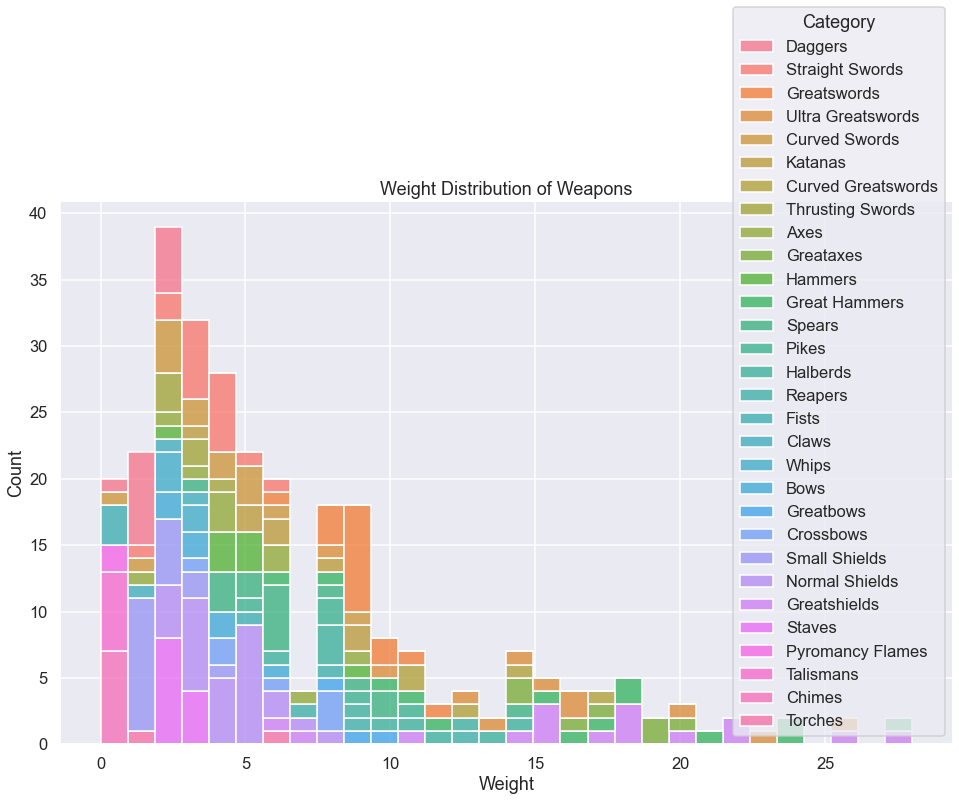

In [335]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df, x='Weight', bins=30, hue = "Category", multiple="stack")
plt.title('Weight Distribution of Weapons')
plt.show()

In [336]:
len(df['Category'].unique())

30

### Plotly vs Seaborn:
* Seaborn builds off of matplotlib, it is simpler to use and has a nice looking default colour scheme.<br>
* Plotly has interactive features that allow for better visulisation of data. <br>

For large amounts of data (i.e 30 weapon categories), the defualt colour schemes start looping through the same ten discrete colour values and it becomes ambiguous.

At first I tried making a set of 30 discrete colours by sampling from continous colour scales, but this made the plot hard to read as categories close together would have too similar a colour.

<code>rainbowColours = px.colors.sample_colorscale('rainbow', 30)  # Sample 30 colors from the rainbow scale</code>

Rainbow Colour scale made distinguishing between certain close yellows difficult

Next I looked into existing discrete palletes and realised I could define my own palette as a mix of two palletes, one with 24 colours and one with 8 colours to make a pallete with 32 colours.

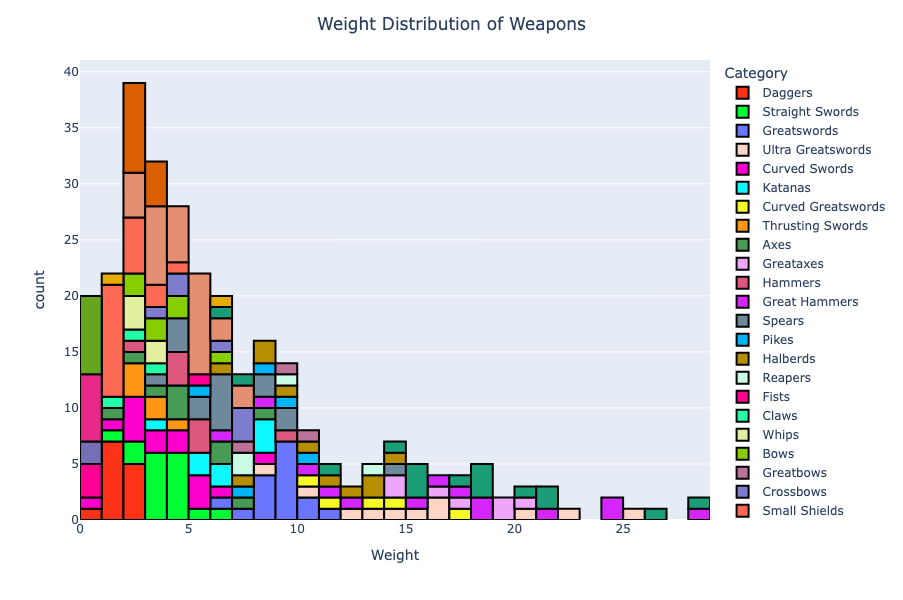

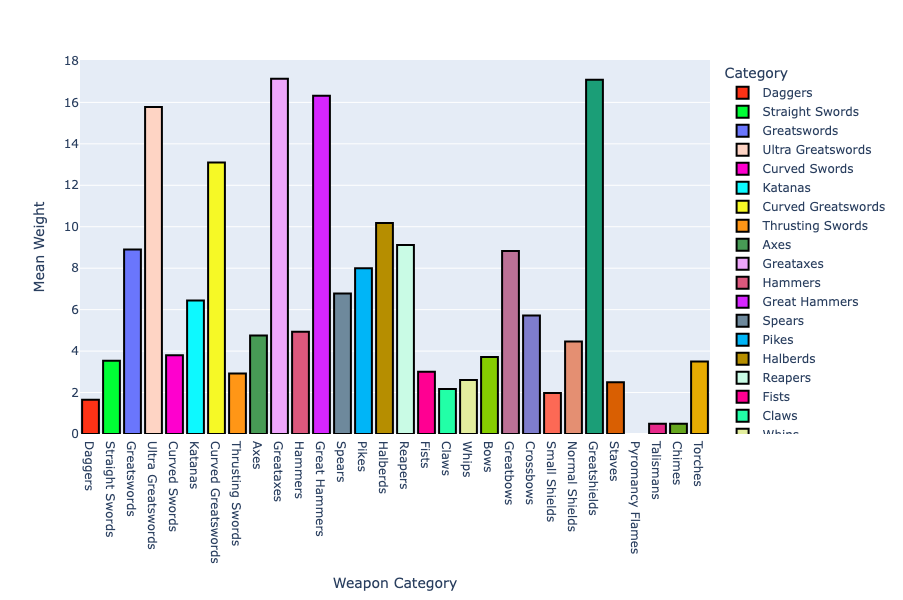

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [337]:
CatColours = px.colors.qualitative.Light24 + px.colors.qualitative.Dark2
plt.figure(figsize=(16, 10))
fig = px.histogram(df, x='Weight', color = "Category", nbins=40,
                   color_discrete_sequence= CatColours)

# Change the figure size
fig.update_layout(width=900, height=600,
                 title_text='Weight Distribution of Weapons', title_x=0.5)

fig.update_traces(marker=dict(line=dict(color='black', width=2))) # Border color and width

fig.show()


plt.figure(figsize=(16, 10))
fig = px.bar(dfByCatMean, y='Weight', color = dfByCatMean.index,
                   color_discrete_sequence= CatColours)


# Change the figure size
fig.update_layout(width=900, height=600,
                 yaxis_title="Mean Weight", xaxis_title="Weapon Category")

fig.update_traces(marker=dict(line=dict(color='black', width=2))) # Border color and width

fig.show()

We see there is a peak of weight around 2.5 weight, with the distribution trailing off as weight increases to a max of 28.<br>

We can also filter for different weapon categories and compare the weight distirbution of the weapons within them.<br>
For example looking at the shields, as could be inferred from the names,<br>
the weight of Small < Normal < Great.

Melee weapon clases (purple-blue) are spread throughout the entire distribution due to the sheer numbers they make up of the data. Shields, spells tools and ranged weapons tend to fall under their own narrower distributions within the data as a whole.

All the magic tools fall within a weight category of less than 5, and so mage players will know they do not have to invest as many of their level up points into vitality as a player weilding a heavy sword or shield.

I also plotted the Mean weight distribution of the weapons to highlight the difference between weapon classes.<br>
As could be expected, 'Great' weapons have a higher mean weight.<br>
What is less obvious from the histogram but shown clearly on the Barplot is that the Pyromancy flames have a mean weight of zero.

### lvl requirement

Text(0.5, 0, 'Total level requirement')

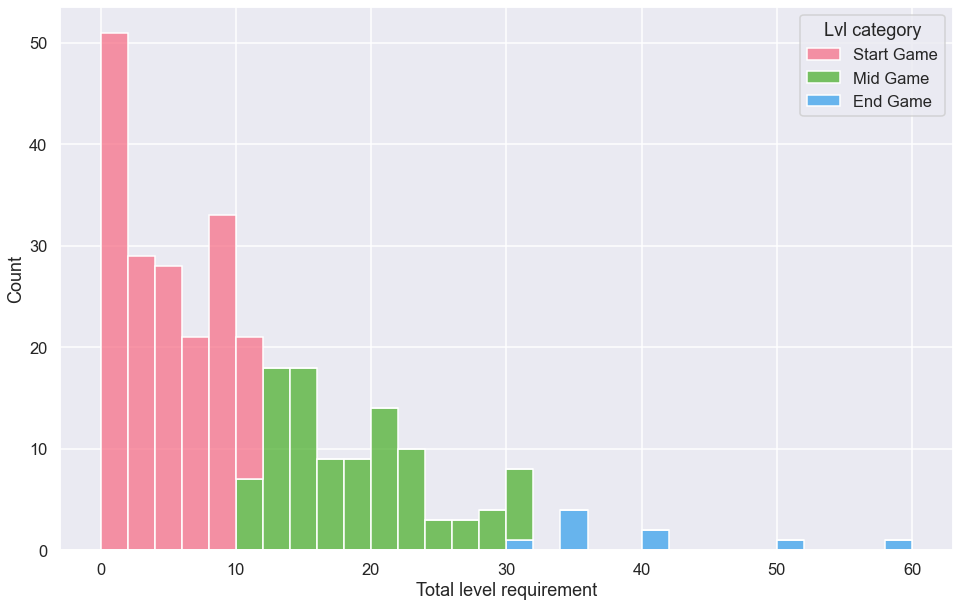

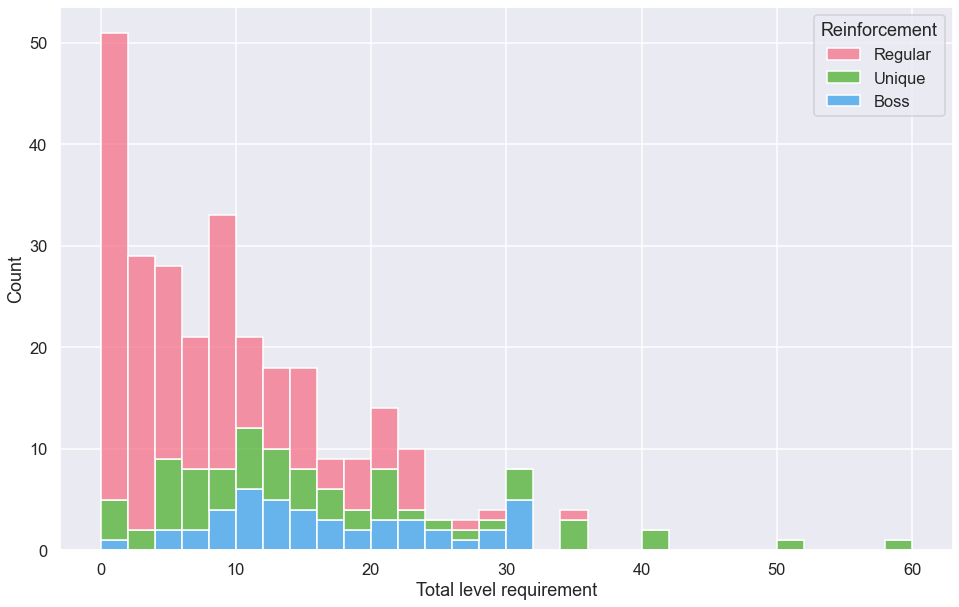

In [338]:
plt.figure(figsize=(16, 10))

palette = "husl"

sns.histplot(data=df, x='Total Lvl Requirement',palette = palette, hue='Lvl category', multiple="stack", bins=30)
plt.xlabel('Total level requirement')

plt.figure(figsize=(16, 10))
sns.histplot(data=df, x='Total Lvl Requirement', palette = palette, hue='Reinforcement', multiple="stack",  bins=30)
plt.xlabel('Total level requirement')

## Reinforcement:


<AxesSubplot:xlabel='Reinforcement', ylabel='Count'>

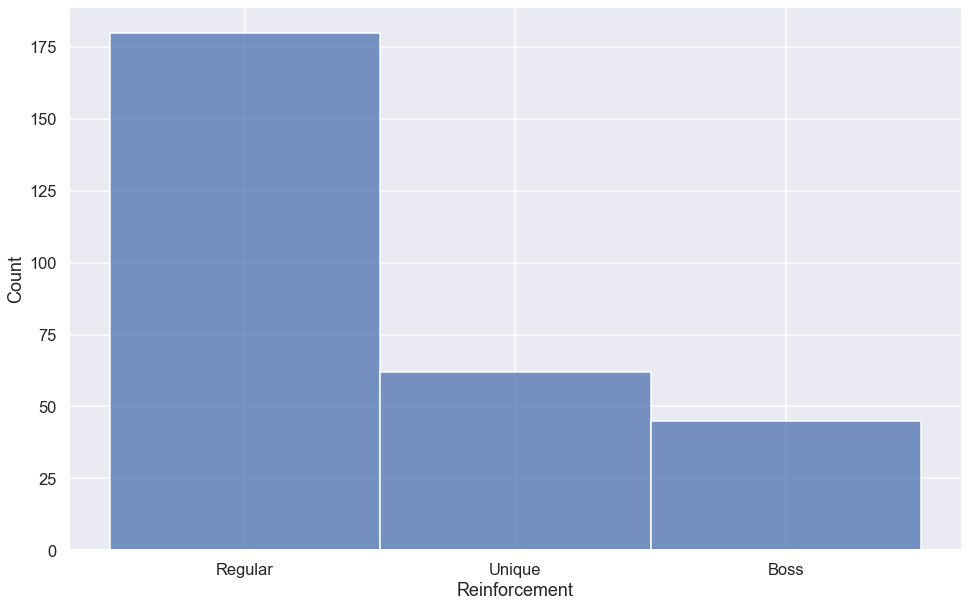

In [339]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df, x='Reinforcement')

## Damage
Physical, Magic, Fire, Lightning, Dark.

<AxesSubplot:xlabel='Total Lvl Requirement', ylabel='Total damage'>

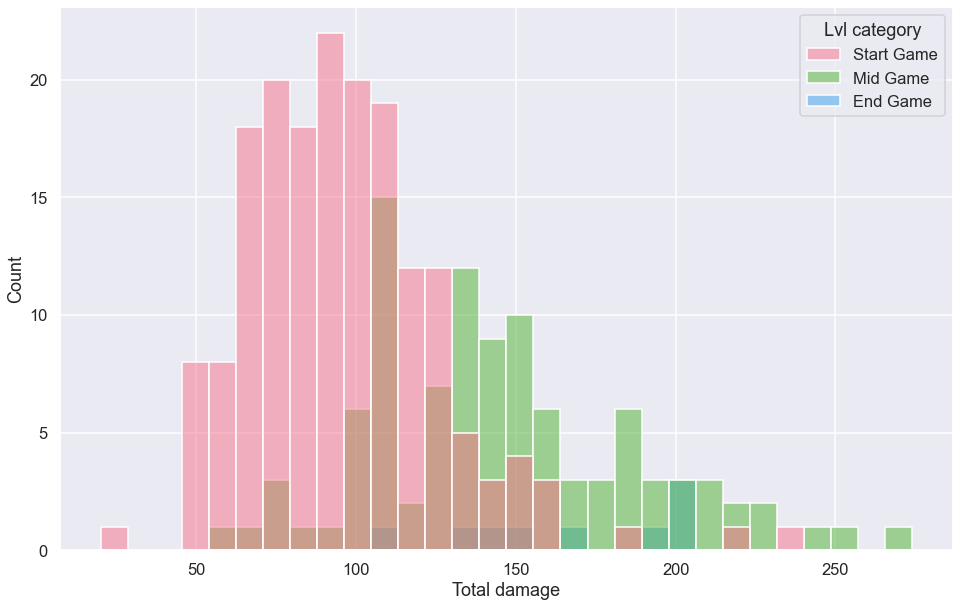

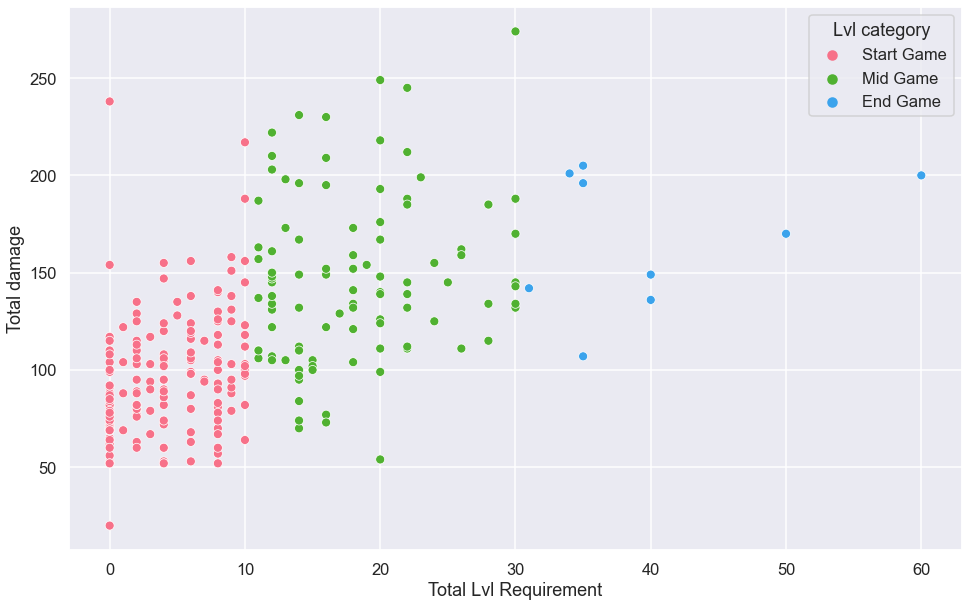

In [340]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df, x='Total damage', palette = palette,hue='Lvl category', bins=30)

plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, y='Total damage', x='Total Lvl Requirement', palette = palette,hue='Lvl category')

We can see that typically, weapons with a low stat requirement have a lower total damage and weapons with a mid range stat requirement tend to have higher total damage.

In [341]:
df.query('`Total damage` >= 200')[['Total damage', 'Total Lvl Requirement', 'Name']]

Total damage  Total Lvl Requirement                          Name
35          209.0                   16.0      Twin Princes' Greatsword
40          231.0                   14.0         Drakeblood Greatsword
45          217.0                   10.0           Firelink Greatsword
46          230.0                   16.0           Lorian's Greatsword
54          218.0                   20.0     Lothric Knight Greatsword
62          203.0                   12.0     Dancer's Enchanted Swords
96          210.0                   12.0            Dragonslayer's Axe
102         274.0                   30.0         Dragonslayer Greataxe
103         201.0                   34.0         Black Knight Greataxe
104         245.0                   22.0              Demon's Greataxe
116         249.0                   20.0       Old King's Great Hammer
119         222.0                   12.0         Gargoyle Flame Hammer
121         200.0                   60.0          Morne's Great Hammer
126         205.0                   35.0         Smough's Great Hammer
168         238.0                    0.0                     Dark Hand
246         212.0                   22.0  Cathedral Knight Greatshield

#### Is there a relationship between total damage and lvl investment?

In [342]:
# sklearn modules useful for regression analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

## Remove spell tools?

In [343]:
Staff.describe()
#nonStaff.describe()

Critical  Weight  Stability  Durability  Spell Buff  Physical damage  \
count      27.0   27.00      27.00       27.00       27.00            27.00   
mean      100.0    1.35      10.19       51.85      228.30            63.93   
std         0.0    1.09       3.53        7.36       29.57            25.70   
min       100.0    0.00       0.00       40.00      184.00             0.00   
25%       100.0    0.50      10.00       45.00      207.50            52.50   
50%       100.0    0.50      10.00       50.00      224.00            60.00   
75%       100.0    2.50      10.00       55.00      238.50            74.00   
max       100.0    3.00      15.00       65.00      312.00           120.00   

       Magic damage  Fire damage  Lightning damage  Dark damage  ...  \
count          27.0        27.00              27.0        27.00  ...   
mean            0.0        10.70               0.0         0.74  ...   
std             0.0        31.16               0.0         3.85  ...   
min             0.0         0.00               0.0         0.00  ...   
25%             0.0         0.00               0.0         0.00  ...   
50%             0.0         0.00               0.0         0.00  ...   
75%             0.0         0.00               0.0         0.00  ...   
max             0.0       110.00               0.0        20.00  ...   

       Faith Bonus Percent  Strength Requirement 2 hand  Str lvls  Dex lvls  \
count                27.00                        27.00      3.00       0.0   
mean                 51.67                         4.37      3.00       NaN   
std                  45.91                         2.22      1.73       NaN   
min                   0.00                         0.00      2.00       NaN   
25%                   0.00                         3.00      2.00       NaN   
50%                  65.00                         4.00      2.00       NaN   
75%                  90.00                         6.00      3.50       NaN   
max                 120.00                        10.00      5.00       NaN   

       Int lvls  Fai lvls  Str lvls 2 hand  Total Lvl Requirement  \
count     16.00     16.00              1.0                  27.00   
mean       5.06      5.81              0.0                   6.78   
std        3.53      5.47              NaN                   5.38   
min        0.00      0.00              0.0                   0.00   
25%        2.00      2.00              0.0                   4.00   
50%        4.00      4.00              0.0                   6.00   
75%        8.00      8.00              0.0                   8.00   
max       14.00     20.00              0.0                  20.00   

       Total Lvl Requirement 2 hand  Total Stat Requirement  
count                         27.00                   27.00  
mean                           6.44                   24.04  
std                            5.36                    9.30  
min                            0.00                    0.00  
25%                            4.00                   18.00  
50%                            4.00                   24.00  
75%                            8.00                   29.50  
max                           20.00                   41.00  

[8 rows x 34 columns]

Xdata = Total lvl requirement
Ydata = Total damage

<function matplotlib.pyplot.show(close=None, block=None)>

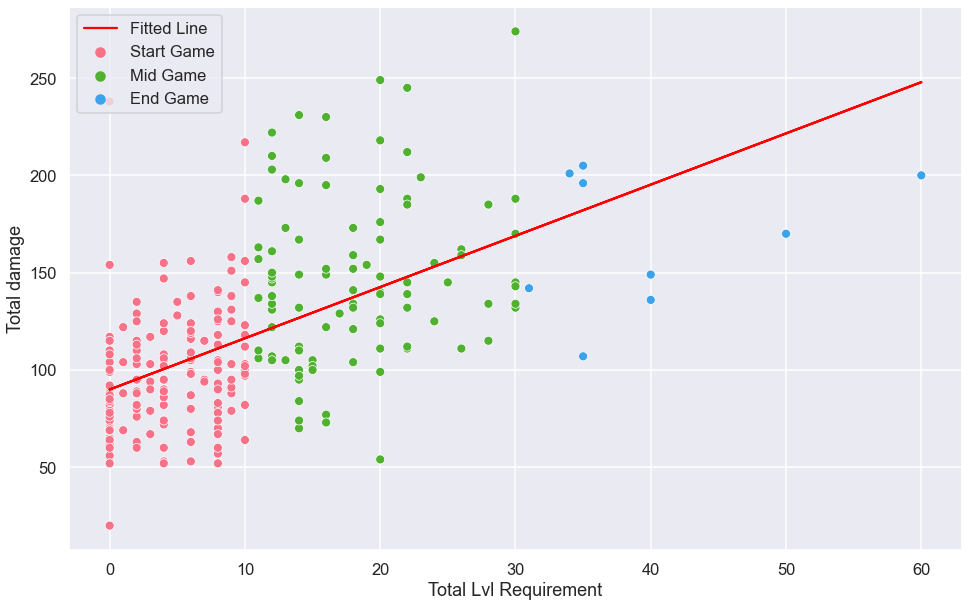

In [344]:
# Set data.
X = df[['Total Lvl Requirement']]
Y = df['Total damage']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()


# Fit the model to the training data
model.fit(X_train, y_train)


#Make predictions using the test data
y_pred = model.predict(X_test)


# Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, y='Total damage', x='Total Lvl Requirement',palette = palette, hue='Lvl category')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')  # Fitted line

plt.legend(loc='upper left')
plt.show


In [345]:
print(f'The gradient of the line of best fit is{model.coef_[0] : .1f} damage/lvl')  #m
print(f'{model.intercept_ : .1f}') #c

The gradient of the line of best fit is 2.6 damage/lvl
 89.9


An issue with using lvl requirement is that all weapons with requirments of 10 truncate the prediction at the y axis. Better to compare weapon scaling with stat requirement directly. Expect answer to be similar.

In [346]:
df['Total Stat Requirement'] = df[['Strength Requirement', "Dexterity Requirement",
                  'Intelligence Requirement', 'Faith Requirement']].sum(axis=1)
df['Total Stat Requirement']

0      18.0
1      28.0
2      28.0
3      14.0
4      12.0
       ... 
282    21.0
283    33.0
284    13.0
285    34.0
286     5.0
Name: Total Stat Requirement, Length: 287, dtype: float64

The gradient of the line of best fit is 2.1 total_damage/stat
 57.5


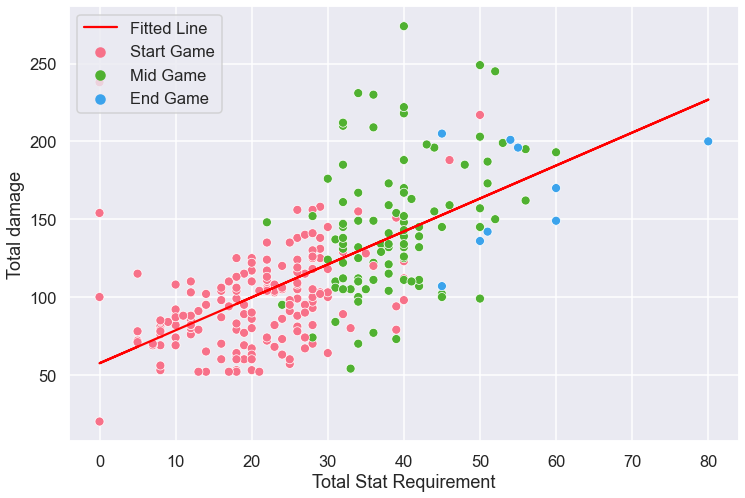

In [347]:
# Set data.
X = df[['Total Stat Requirement']]
Y = df['Total damage']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()


# Fit the model to the training data
model.fit(X_train, y_train)


#Make predictions using the test data
y_pred = model.predict(X_test)


# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, y='Total damage', x='Total Stat Requirement', palette = palette,hue='Lvl category')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')  # Fitted line
#plt.xlabel()

plt.legend(loc='upper left')
plt.show

print(f'The gradient of the line of best fit is{model.coef_[0] : .1f} total_damage/stat')  #m
print(f'{model.intercept_ : .1f}') #c

In [348]:
# y = mx + c
# x = (y-c)/m
y_target = 90
x_pred = (y_target - model.intercept_ )/ model.coef_[0] 
print(f'For a weapon of strength {y_target}, the predicted total stat requirement is {x_pred :.1f}')

For a weapon of strength 90, the predicted total stat requirement is 15.4


In [349]:
df[['Strength Requirement']].columns[0]

'Strength Requirement'

Define a function to Plot the scatterplot of two columns rather then typing out the regression formula over and over


The gradient of the line of best fit is 2.6 (Physical damage)/(Strength Requirement)
The y intercept is:  65.1 Physical damage

The gradient of the line of best fit is 3.9 (Physical damage)/(Strength Requirement 2 hand)
The y intercept is:  63.0 Physical damage


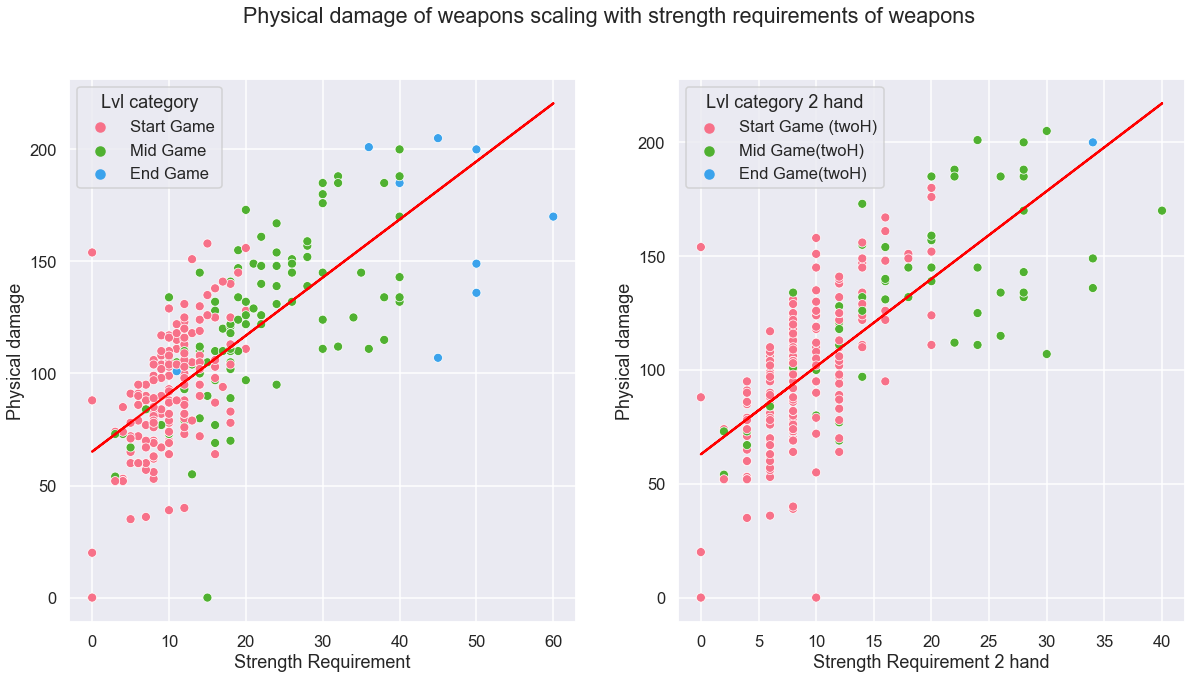

In [350]:
def scatter(X, Y):
    # Set data.
    #X = df[['Column1']]
    #Y = df['Column2']

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X, Y)

    #Make predictions using the test data
    y_pred = model.predict(X)
    m = model.coef_[0]
    c = model.intercept_ 
    
    # can define function to print the gradient statement as well:
    print("") # Print a space before printing current function call for clarity.
    # X column is passed as a data frame and so uses . columns[0] method to return the name
    # Y column is passed as a series and so .name is sufficent
    print(f'The gradient of the line of best fit is{m : .1f} ({Y.name})/({X.columns[0]})')  #m
    print(f'The y intercept is: {c : .1f} {Y.name}') #c
    
    # Plot graph within function to save having to set figure every time

    return(X, y_pred, m, c)

X1, y1_pred, m1, c1 = scatter(df[['Strength Requirement']], df['Physical damage'])
X2, y2_pred, m2, c2 = scatter(df[['Strength Requirement 2 hand']], df['Physical damage'])



# Create a figure and subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))  # 1 row, 1 column, creating 1 subplot

# Scatter plot using seaborn
sns.scatterplot(data=df, y='Physical damage', x='Strength Requirement',palette = palette, hue='Lvl category', ax=ax1)
# Line plot using matplotlib
ax1.plot(X1, y1_pred, color='red', label='Fitted Line')  # Fitted line


sns.scatterplot(data=df, y='Physical damage', x='Strength Requirement 2 hand',palette = palette, hue='Lvl category 2 hand', ax=ax2)
ax2.plot(X2, y2_pred, color='red', label='Fitted Line')  # Fitted line


# Adding an overall title.
fig.suptitle('Physical damage of weapons scaling with strength requirements of weapons')

# Show the plot
plt.show()

#### Dexterity

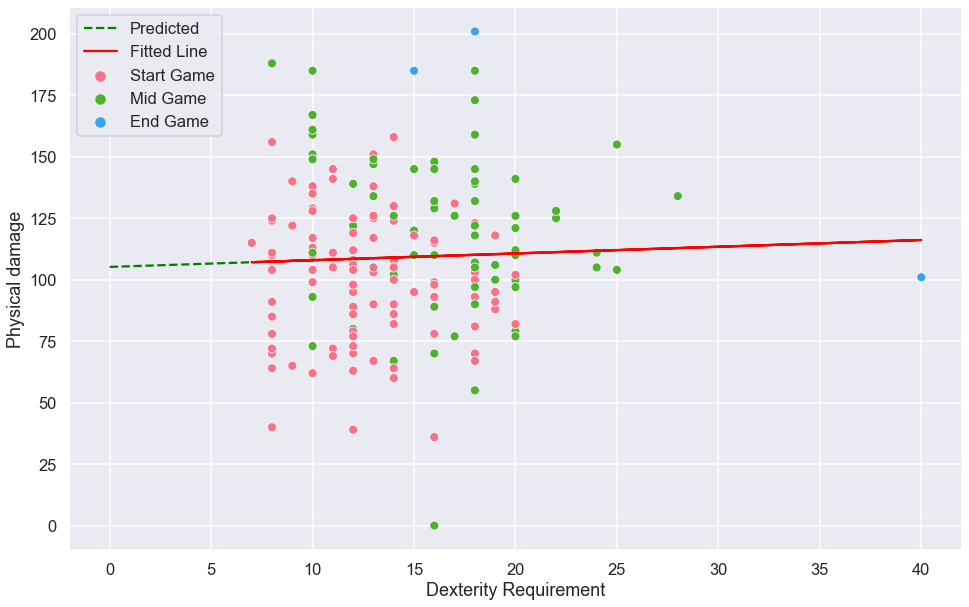

The gradient of the line of best fit is 0.3 damage/stat
 105.2


In [351]:
# Filter out rows where X == 0 while keeping original dataset intact
df_filtered = df[df['Dexterity Requirement'] != 0]

X = df_filtered[['Dexterity Requirement']]
Y = df_filtered['Physical damage']

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, y_train = X, Y
# Create a linear regression model
model = LinearRegression()


# Fit the model to the training data
model.fit(X_train, y_train)


# Predict Y values using the fitted model (for plotting)
X_range = np.linspace(0, X.max(), 100).reshape(-1, 1)  # Create a range for X values
Y_pred = model.predict(X_range)  # Predict corresponding Y values for the range


# Set figure window:
plt.figure(figsize=(16, 10))

# Plot data point:
sns.scatterplot(data=df_filtered, y='Physical damage', x='Dexterity Requirement', palette = palette,hue='Lvl category')

# Extend the line to the Y-axis (intercept):
plt.plot( X_range, Y_pred, color='green', linestyle='--', label='Predicted')

# Plot fitted line above predicted line
plt.plot(X, model.predict(X), color='red', label='Fitted Line')  # Fitted line



plt.legend(loc='upper left')
plt.show()



print(f'The gradient of the line of best fit is{model.coef_[0] : .1f} damage/stat')  #m
print(f'{model.intercept_ : .1f}') #c



The gradient of the line of best fit is 0.8 (Physical damage)/(Dexterity Requirement)
The y intercept is:  96.9 Physical damage


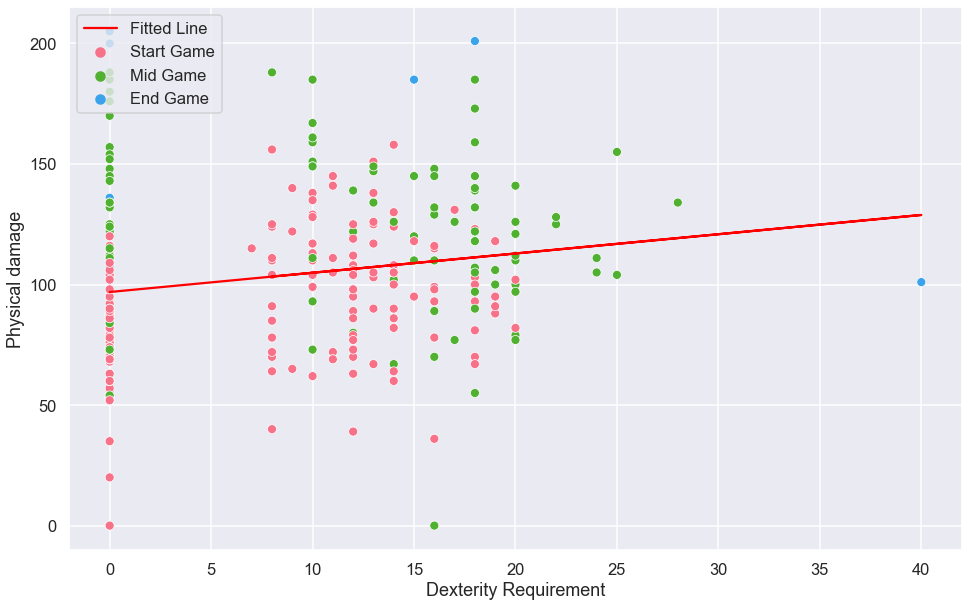

In [352]:
X3, y3_pred, m3, c3 = scatter(df[['Dexterity Requirement']], df['Physical damage'])


# Set figure window:
plt.figure(figsize=(16, 10))

# Plot data point:
sns.scatterplot(data=df, y='Physical damage', x='Dexterity Requirement',palette = palette, hue='Lvl category')

# Plot fitted line above predicted line
plt.plot(X3, y3_pred, color='red', label='Fitted Line')  # Fitted line


plt.legend(loc='upper left')
plt.show()


The gradient of the line of best fit is 1.2 (Magic damage)/(Intelligence Requirement)
The y intercept is:  0.9 Magic damage


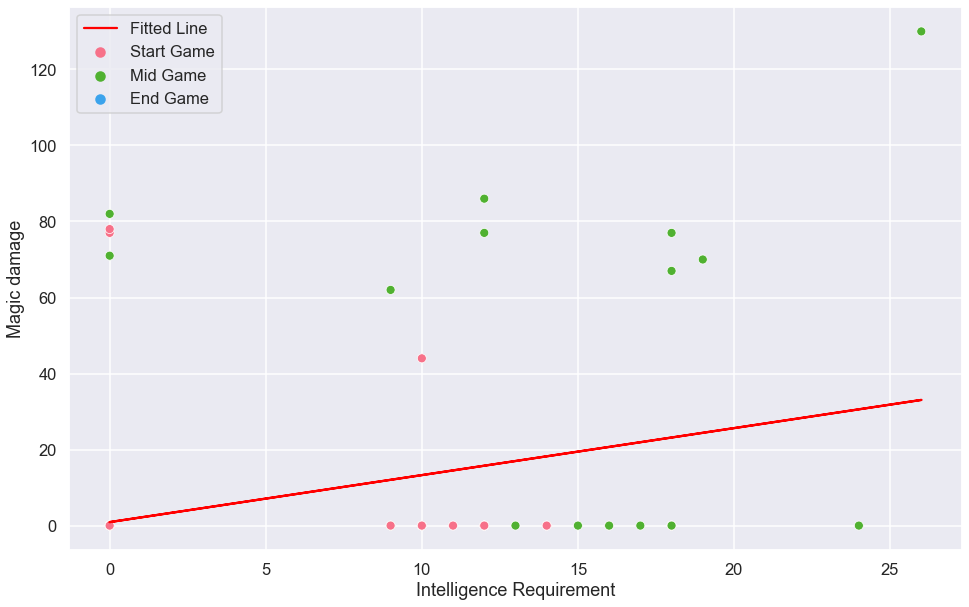

In [353]:
X4, y4_pred, m4, c4 = scatter(df[['Intelligence Requirement']], df['Magic damage'])



# Set figure window:
plt.figure(figsize=(16, 10))

# Plot data point:
sns.scatterplot(data=df, y='Magic damage', x='Intelligence Requirement', palette = palette,hue='Lvl category')

# Extend the line to the Y-axis (intercept):
#plt.plot( X_range, Y_pred, color='green', linestyle='--', label='Predicted')

# Plot fitted line above predicted line
plt.plot(X4, y4_pred, color='red', label='Fitted Line')  # Fitted line



plt.legend(loc='upper left')
plt.show()

## Scatter plot for all four stat requirements, for all five damage types (plus total)

Rather then colour coding by end game level, which should be fairly intuitive from the position of the scatter point along the X axis of individual stat requirement.<br>
Instead I will change the hue by scaling rank.

I will also define a function to plot the scatter plots to reduce typo errors from repeating code.

Initially, I explicitly called for<br>
<code>plt.subplots(3,2)</code><br>
But then realised I could generalise my subplot function to search the number of plots (from number of Y inputs) and dynamically change the number of subplots. 

### Generalise a Scatterplot function for plotting a single X variable against a number of Y variables on subplots:


The gradient of the line of best fit is 2.5 (Physical damage)/(Strength Requirement)
The y intercept is:  67.0 Physical damage

The gradient of the line of best fit is 2.6 (Magic damage)/(Strength Requirement)
The y intercept is:  46.2 Magic damage

The gradient of the line of best fit is-0.9 (Fire damage)/(Strength Requirement)
The y intercept is:  86.2 Fire damage

The gradient of the line of best fit is 1.0 (Lightning damage)/(Strength Requirement)
The y intercept is:  48.6 Lightning damage

The gradient of the line of best fit is 0.5 (Dark damage)/(Strength Requirement)
The y intercept is:  67.9 Dark damage

The gradient of the line of best fit is 2.6 (Total damage)/(Strength Requirement)
The y intercept is:  77.4 Total damage


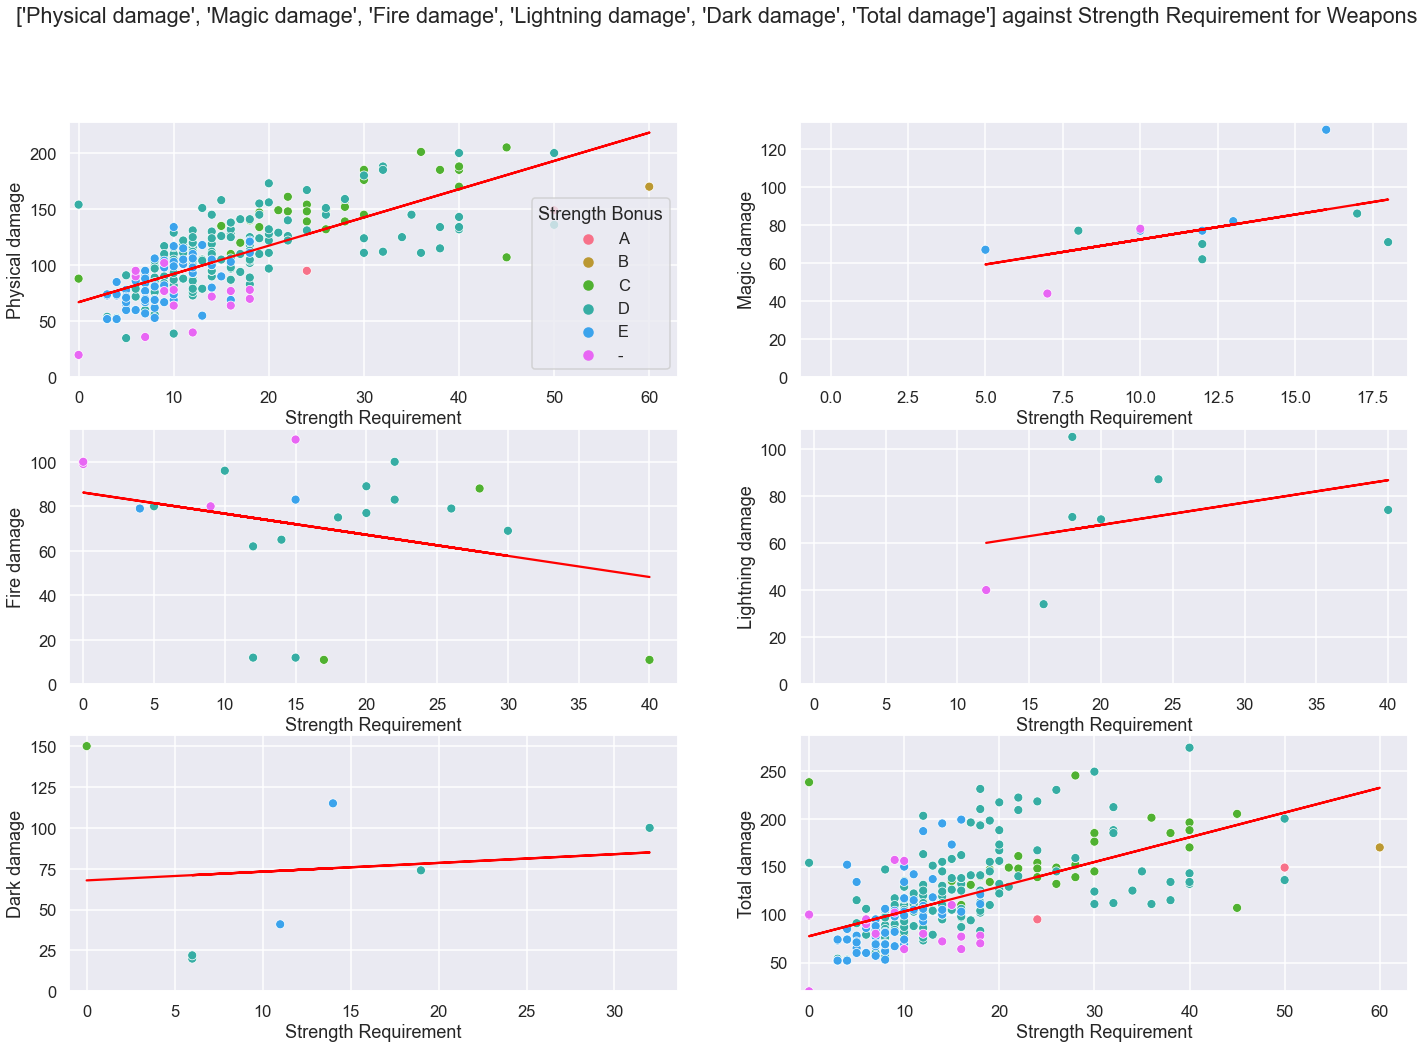

In [354]:
Bonus_order = ['A', 'B', 'C', 'D', 'E', '-'] #Make sure Hue is consitant across plots.

def Filter_Zero(data, column):
    df_filtered = data[data[column] != 0]
    return(df_filtered)



def subplot_scatter(dataframe, X_stat, types, Hue, Hue_order):
    
    dataname = dataframe # When checking name later in function
    
    # for basing Hue off of Bonus stat, want to order colour palette by alphabetical
    if Hue_order == Bonus_order:
        # And want "-" to have lower priority than E
        dataframe = dataframe.replace('-', 'z').sort_values(by = Hue, ascending=True).replace('z', '-')
    
    # Create a figure and subplot grid
    fig, axs = plt.subplots(-(-len(types)//2), 2, figsize=(24,16))  # 3 row, 2 column, creating 6 subplots    
    # -(-len(types)//2) ceiling division, opposite of floor division.
    
    for i in range(0, len(types)):
        # i increments from 0 to 5

        #Only plot legend for first subplot.
        if i == 0:
            legend = True
        else:
            legend = False
        
        dataframei = Filter_Zero(dataframe, types[i])
        
        # Call scatter function as before to print gradient statements and provide values for plotting Line of Best Fit
        Xi, yi_pred, mi, ci = scatter(dataframei[[X_stat]], dataframei[types[i]])

        # // Floor divison, rounds down.
        # Want to have 2 columns and 3 rows
        row = i // 2    # Row (0, 1, 2)
        col = i % 2     # Column (0, 1)
        
        #Plot scatter plots and plots on subplot      
        sns.scatterplot(data=dataframei, y=types[i], x=X_stat, ax=axs[row,col], hue = Hue, hue_order=Hue_order,palette = palette, legend=legend)
        axs[row,col].plot(Xi, yi_pred, color='red', label='Fitted Line')  # Fitted line
        axs[row,col].set_xlim(min(dataframe[X_stat])-1)
        axs[row,col].set_ylim(min(dataframe[types[i]]))
    
    
        # Retrieve the name of the DataFrame
    for name, item in df_dict.items():
        if item is dataname:  # Check if the DataFrame matches
            # Adding an overall title.
            fig.suptitle(f'{types} against {X_stat} for {name}')
            fig.savefig(f'{types}_against_{X_stat}_for_{name}'+'_Scatter.png')
    
    # Show the plot
    plt.show()

Y_types = ['Physical damage', 'Magic damage', 'Fire damage', 'Lightning damage', 'Dark damage', 'Total damage']
subplot_scatter(df, 'Strength Requirement', Y_types,'Strength Bonus', Bonus_order)

### Generalise a Scatterplot function for plotting a single X variable against a single Y variable.


The gradient of the line of best fit is 0.1 (Bleed)/(Dexterity Requirement)
The y intercept is:  29.9 Bleed
The name of the DataFrame is: Swords


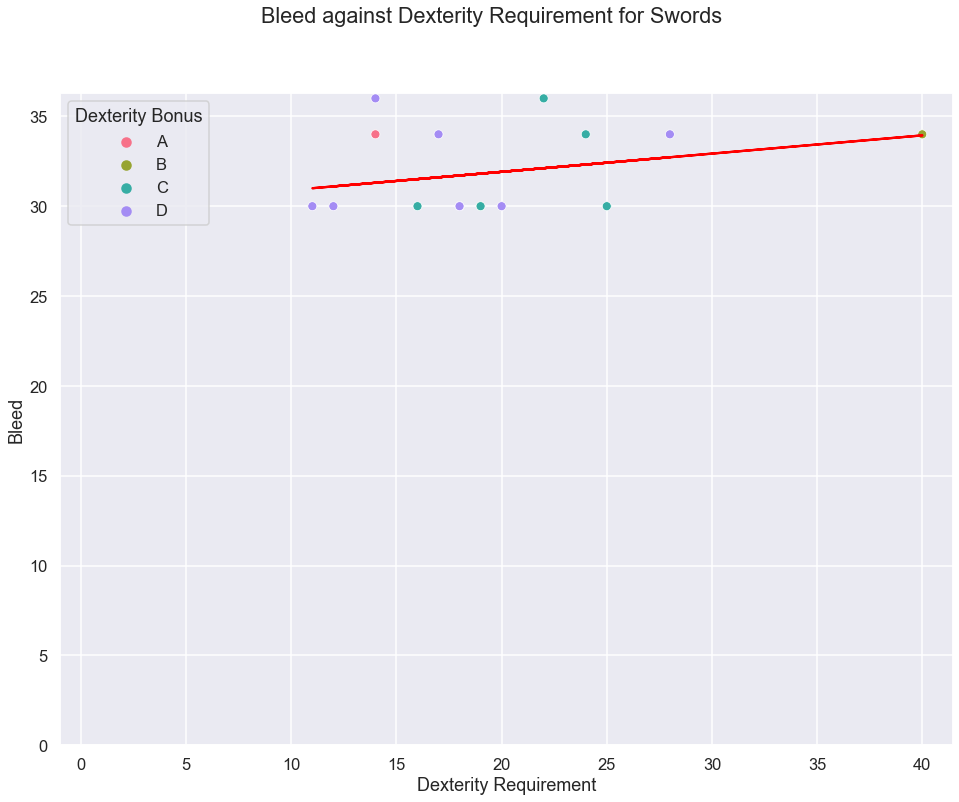

In [355]:
def plot_scatter(dataframe, X_stat, Y_stat, Hue, Hue_order):
    
    dataname = dataframe
    dataframe = dataframe.replace('-', 'z').sort_values(by = Hue, ascending=True).replace('z', '-')
    
    dataframei = Filter_Zero(dataframe, Y_stat)

    # Call scatter function as before to print gradient statements and provide values for plotting Line of Best Fit
    X0, y0_pred, m0, c0 = scatter(dataframei[[X_stat]], dataframei[Y_stat])
    
    # Create a figure and subplot grid
    fig, axs = plt.subplots(figsize=(16,12)) 

    #Plot scatter plot
    sns.scatterplot(data=dataframei, y=Y_stat, x=X_stat, hue=Hue, ax=axs, palette = palette, legend=True)
    axs.plot(X0, y0_pred, color='red', label='Fitted Line')  # Fitted line
    plt.xlim(min(dataframe[X_stat])-1)
    plt.ylim(min(dataframe[Y_stat]))

    # Adding an overall title.
    
    # Retrieve the name of the DataFrame
    for name, item in df_dict.items():
        if item is dataname:  # Check if the DataFrame matches
            fig.suptitle(f'{Y_stat} against {X_stat} for {name}')
            fig.savefig(f'{Y_stat}_against_{X_stat}_for_{name}'+'_Scatter.png')
            print(f"The name of the DataFrame is: {name}")

    # Show the plot
    plt.show()
    
plot_scatter(Swords, 'Dexterity Requirement','Bleed','Dexterity Bonus', Bonus_order)

In [356]:
df[df['Dexterity Bonus'] == 'A']

Name Category Reinforcement       Damage  \
75                   Chaos Blade  Katanas        Unique  103/0/0/0/0   
165  Pontiff Knight Great Scythe  Reapers        Unique  100/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
75    45/25/20/20/25      0/34/0         16/14/0/0      E/A/-/-       100   
165   40/25/20/20/25      0/30/0        14/19/0/12      E/A/-/-       100   

     Weight  ...  Str lvls  Dex lvls  Int lvls  Fai lvls Str lvls 2 hand  \
75      6.0  ...       6.0       4.0       NaN       NaN             2.0   
165     7.5  ...       4.0       9.0       NaN       2.0             0.0   

    Total Lvl Requirement  Lvl category  Total Lvl Requirement 2 hand  \
75                   10.0    Start Game                           6.0   
165                  15.0      Mid Game                          11.0   

     Lvl category 2 hand  Total Stat Requirement  
75     Start Game (twoH)                    30.0  
165       Mid Game(twoH)                    45.0  

[2 rows x 54 columns]


The gradient of the line of best fit is 0.7 (Physical damage)/(Dexterity Requirement)
The y intercept is:  98.4 Physical damage

The gradient of the line of best fit is-2.4 (Magic damage)/(Dexterity Requirement)
The y intercept is:  111.6 Magic damage

The gradient of the line of best fit is-1.0 (Fire damage)/(Dexterity Requirement)
The y intercept is:  79.6 Fire damage

The gradient of the line of best fit is-0.4 (Lightning damage)/(Dexterity Requirement)
The y intercept is:  74.0 Lightning damage

The gradient of the line of best fit is-1.1 (Dark damage)/(Dexterity Requirement)
The y intercept is:  84.5 Dark damage

The gradient of the line of best fit is 1.0 (Total damage)/(Dexterity Requirement)
The y intercept is:  107.0 Total damage


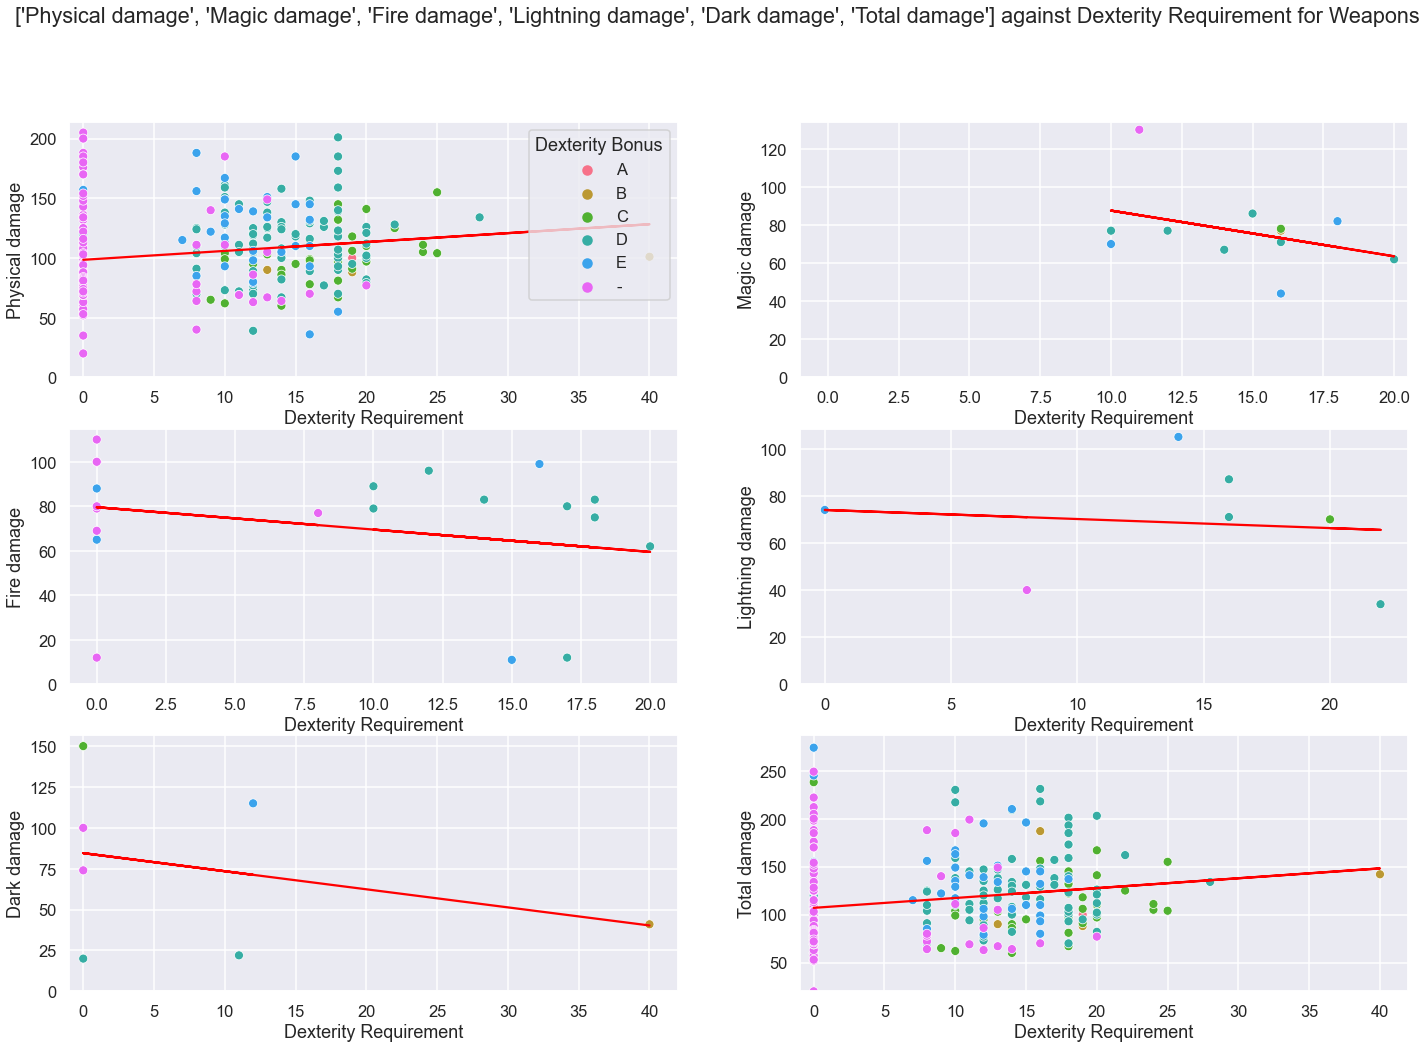

In [357]:
subplot_scatter(df, 'Dexterity Requirement', Y_types,'Dexterity Bonus', Bonus_order)


The gradient of the line of best fit is-1.3 (Physical damage)/(Intelligence Requirement)
The y intercept is:  107.4 Physical damage

The gradient of the line of best fit is 0.8 (Magic damage)/(Intelligence Requirement)
The y intercept is:  68.0 Magic damage

The gradient of the line of best fit is 1.7 (Fire damage)/(Intelligence Requirement)
The y intercept is:  58.5 Fire damage

The gradient of the line of best fit is 0.0 (Lightning damage)/(Intelligence Requirement)
The y intercept is:  68.7 Lightning damage

The gradient of the line of best fit is-2.4 (Dark damage)/(Intelligence Requirement)
The y intercept is:  91.2 Dark damage

The gradient of the line of best fit is 1.2 (Total damage)/(Intelligence Requirement)
The y intercept is:  113.9 Total damage


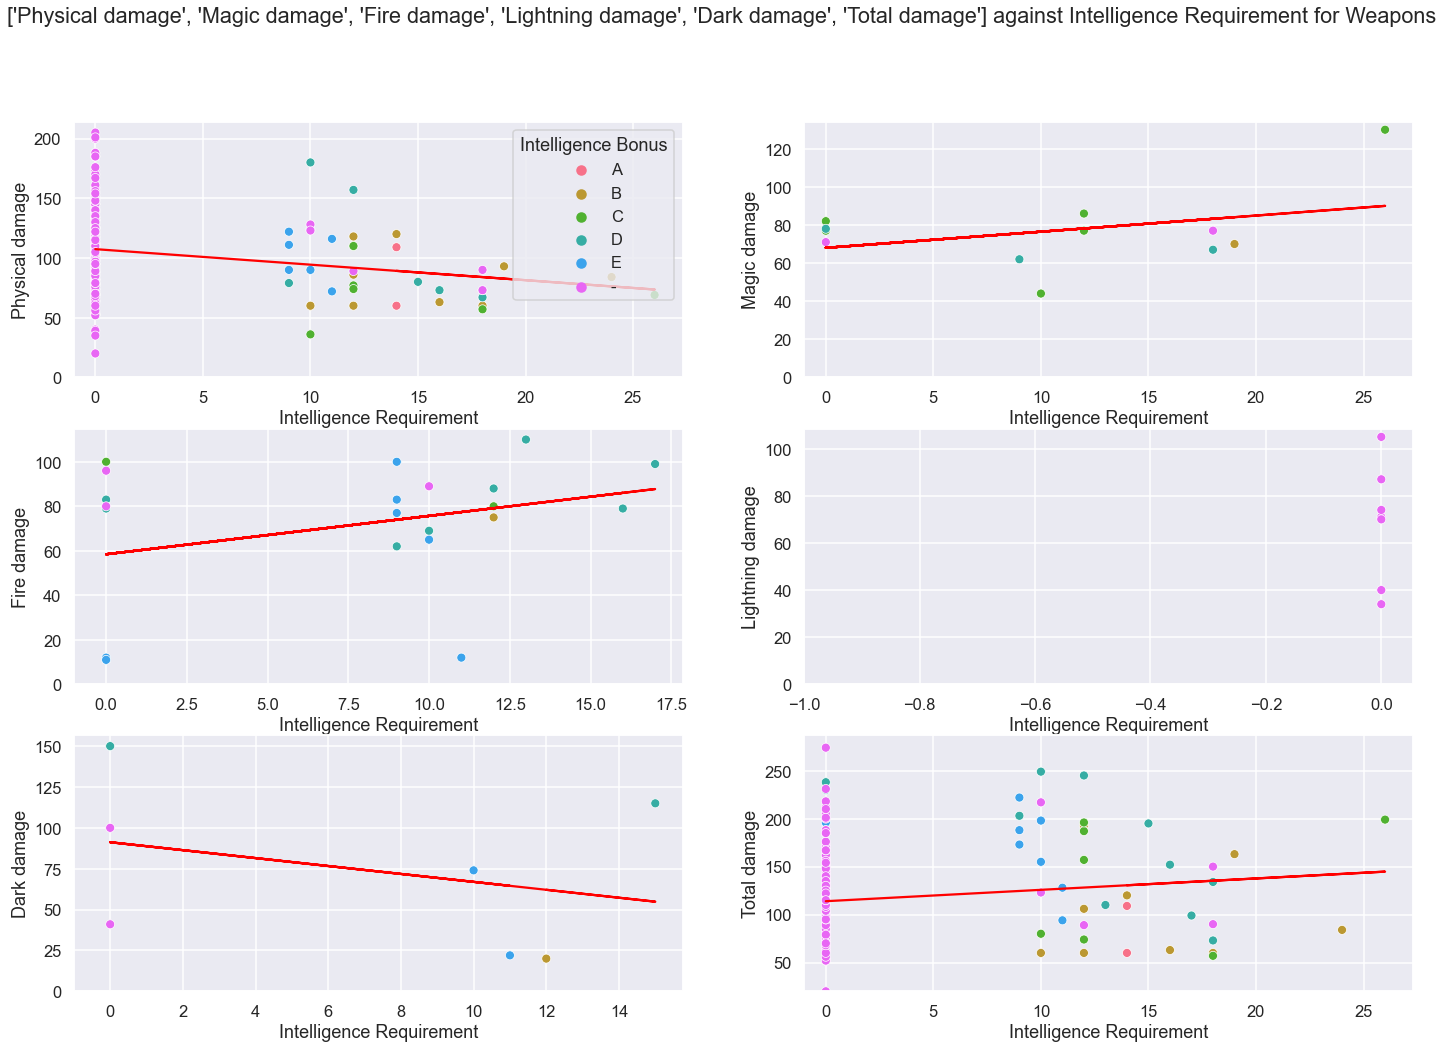

In [358]:
subplot_scatter(df, 'Intelligence Requirement', Y_types,'Intelligence Bonus', Bonus_order)


The gradient of the line of best fit is-0.6 (Physical damage)/(Faith Requirement)
The y intercept is:  106.5 Physical damage

The gradient of the line of best fit is-0.3 (Magic damage)/(Faith Requirement)
The y intercept is:  78.0 Magic damage

The gradient of the line of best fit is 1.5 (Fire damage)/(Faith Requirement)
The y intercept is:  59.7 Fire damage

The gradient of the line of best fit is-2.2 (Lightning damage)/(Faith Requirement)
The y intercept is:  74.5 Lightning damage

The gradient of the line of best fit is 0.1 (Dark damage)/(Faith Requirement)
The y intercept is:  74.2 Dark damage

The gradient of the line of best fit is 0.5 (Total damage)/(Faith Requirement)
The y intercept is:  115.1 Total damage


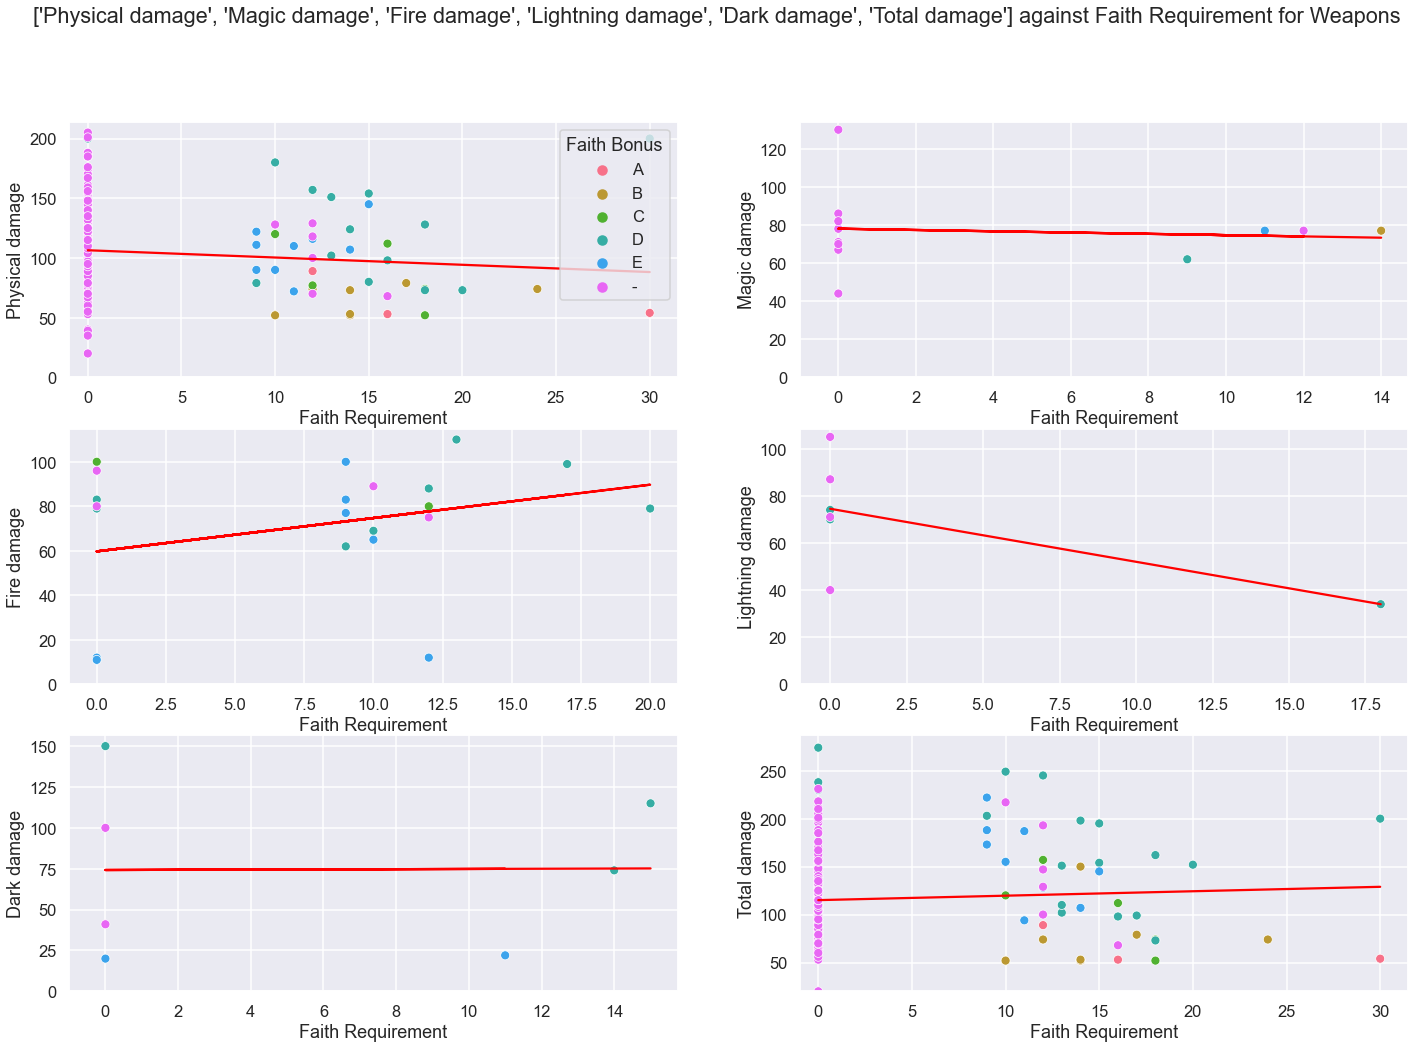

In [359]:
subplot_scatter(df, 'Faith Requirement', Y_types,'Faith Bonus', Bonus_order)

Generally, there is no correlation between faith requirement and initial damage of any type.<br>
A point of interest I found was that there is only a singular weapon which requires faith to weild and inflicts lightning damage. 
<br>This was unexpected as lightning damage scales with the faith stat and many offensive Faith spells use the lighting element.

In [360]:
df[(df["Lightning damage"] >0) & (df["Faith Requirement"] > 0)]

Name Category Reinforcement        Damage  \
144  Dragonslayer Swordspear   Spears          Boss  128/0/0/34/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
144   55/35/30/30/35       0/0/0        16/22/0/18      D/D/-/D       100   

     Weight  ...  Str lvls  Dex lvls  Int lvls  Fai lvls Str lvls 2 hand  \
144    14.5  ...       6.0      12.0       NaN       8.0             2.0   

    Total Lvl Requirement  Lvl category  Total Lvl Requirement 2 hand  \
144                  26.0      Mid Game                          22.0   

     Lvl category 2 hand  Total Stat Requirement  
144       Mid Game(twoH)                    56.0  

[1 rows x 54 columns]

In [361]:
df[(df["Category"] == "Chimes") & (df["Faith Requirement"] > 0)]

Name Category Reinforcement      Damage  \
278             Caitha's Chime   Chimes        Unique  74/0/0/0/0   
279      Cleric's Sacred Chime   Chimes       Regular  52/0/0/0/0   
280  Sacred Chime of Filianore   Chimes        Unique  74/0/0/0/0   
281              Crystal Chime   Chimes        Unique  73/0/0/0/0   
282        Saint-tree Bellvine   Chimes       Regular  52/0/0/0/0   
283            Yorshka's Chime   Chimes       Regular  54/0/0/0/0   
284             Priest's Chime   Chimes       Regular  52/0/0/0/0   

    Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
278   25/15/10/15/20       0/0/0         3/0/12/12      E/-/C/B       100   
279   25/15/10/15/15       0/0/0          3/0/0/14      D/-/-/A       100   
280   25/15/10/10/15       0/0/0          4/0/0/18      E/-/-/C       100   
281   25/20/10/15/15       0/0/0         3/0/18/18      E/-/D/D       100   
282   25/15/10/15/15       0/0/0          3/0/0/18      E/-/-/C       100   
283   25/15/10/20/15       0/0/0          3/0/0/30      D/-/-/A       100   
284   25/15/10/15/15       0/0/0          3/0/0/10      E/-/-/B       100   

     Weight  ...  Str lvls  Dex lvls  Int lvls  Fai lvls Str lvls 2 hand  \
278     0.5  ...       NaN       NaN       2.0       2.0             NaN   
279     0.5  ...       NaN       NaN       NaN       4.0             NaN   
280     0.5  ...       NaN       NaN       NaN       8.0             NaN   
281     0.5  ...       NaN       NaN       8.0       8.0             NaN   
282     0.5  ...       NaN       NaN       NaN       8.0             NaN   
283     0.5  ...       NaN       NaN       NaN      20.0             NaN   
284     0.5  ...       NaN       NaN       NaN       0.0             NaN   

    Total Lvl Requirement  Lvl category  Total Lvl Requirement 2 hand  \
278                   4.0    Start Game                           4.0   
279                   4.0    Start Game                           4.0   
280                   8.0    Start Game                           8.0   
281                  16.0      Mid Game                          16.0   
282                   8.0    Start Game                           8.0   
283                  20.0      Mid Game                          20.0   
284                   0.0    Start Game                           0.0   

     Lvl category 2 hand  Total Stat Requirement  
278    Start Game (twoH)                    27.0  
279    Start Game (twoH)                    17.0  
280    Start Game (twoH)                    22.0  
281       Mid Game(twoH)                    39.0  
282    Start Game (twoH)                    21.0  
283       Mid Game(twoH)                    33.0  
284    Start Game (twoH)                    13.0  

[7 rows x 54 columns]

In [362]:
df['Lvl category'].unique()

['Start Game', 'Mid Game', 'End Game']
Categories (3, object): ['Start Game' < 'Mid Game' < 'End Game']


The gradient of the line of best fit is-1.1 (Physical damage)/(Critical)
The y intercept is:  217.2 Physical damage

The gradient of the line of best fit is 0.0 (Magic damage)/(Critical)
The y intercept is:  76.8 Magic damage

The gradient of the line of best fit is 2.9 (Fire damage)/(Critical)
The y intercept is: -224.7 Fire damage

The gradient of the line of best fit is 0.0 (Lightning damage)/(Critical)
The y intercept is:  68.7 Lightning damage

The gradient of the line of best fit is 0.0 (Dark damage)/(Critical)
The y intercept is:  74.6 Dark damage

The gradient of the line of best fit is-1.7 (Total damage)/(Critical)
The y intercept is:  291.4 Total damage


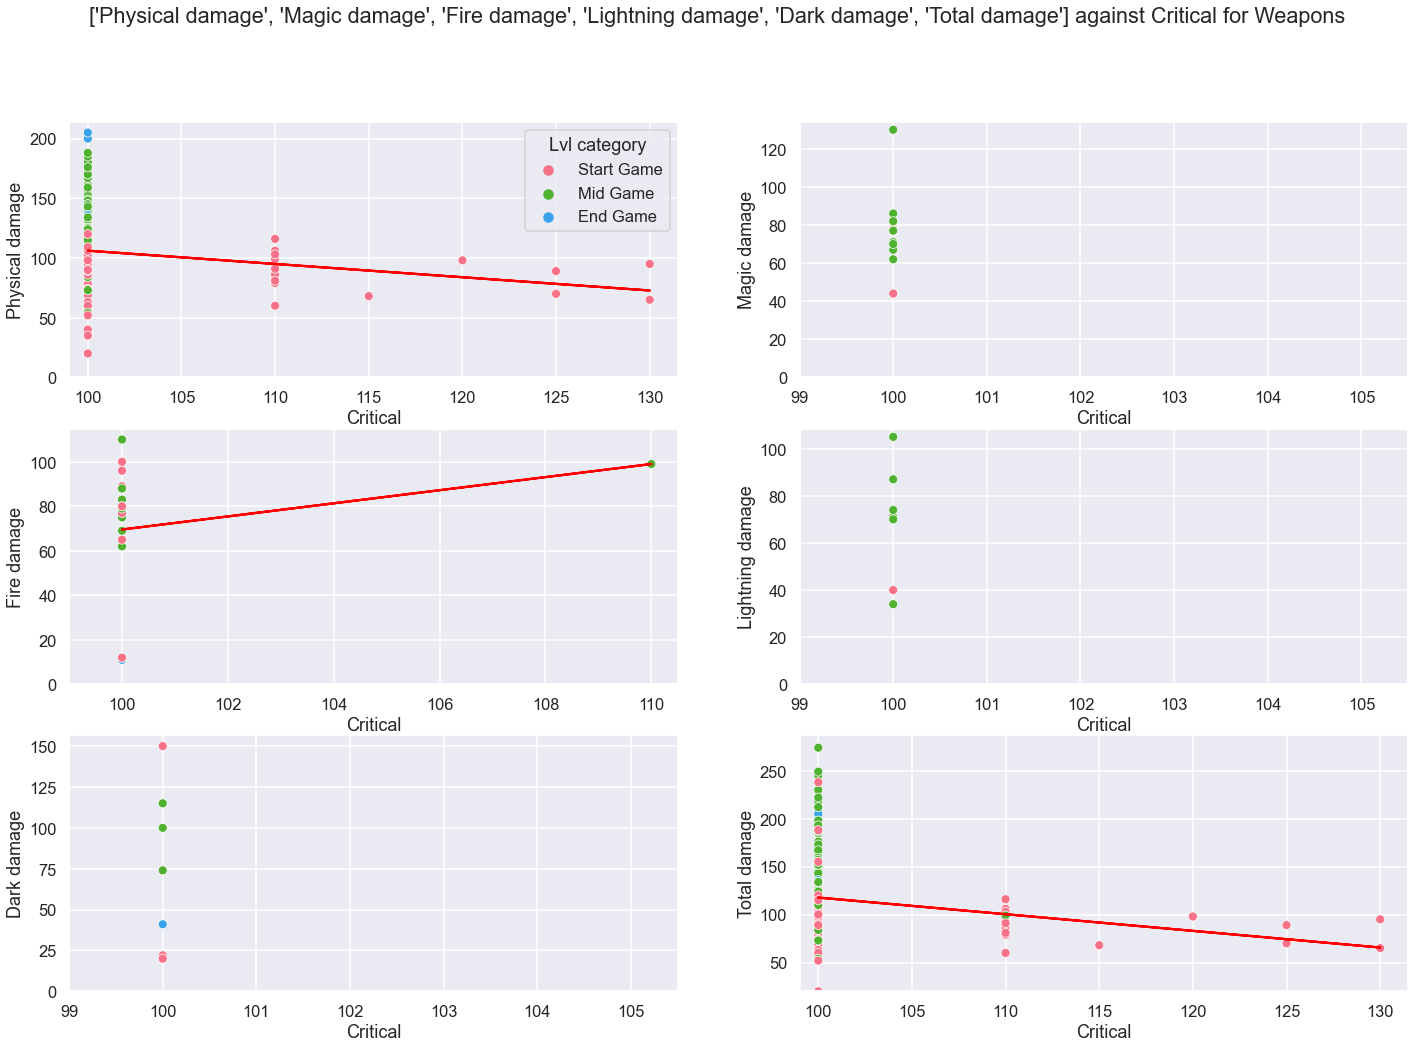

In [363]:
Lvl_order = ['Start Game', 'Mid Game', 'End Game']
subplot_scatter(df, 'Critical', Y_types,'Lvl category', Lvl_order)


The gradient of the line of best fit is 0.1 (Physical damage)/(Bleed)
The y intercept is:  104.8 Physical damage

The gradient of the line of best fit is 0.0 (Magic damage)/(Bleed)
The y intercept is:  76.8 Magic damage

The gradient of the line of best fit is 0.0 (Fire damage)/(Bleed)
The y intercept is:  70.9 Fire damage

The gradient of the line of best fit is 0.0 (Lightning damage)/(Bleed)
The y intercept is:  68.7 Lightning damage

The gradient of the line of best fit is-1.2 (Dark damage)/(Bleed)
The y intercept is:  80.2 Dark damage

The gradient of the line of best fit is-0.2 (Total damage)/(Bleed)
The y intercept is:  116.9 Total damage


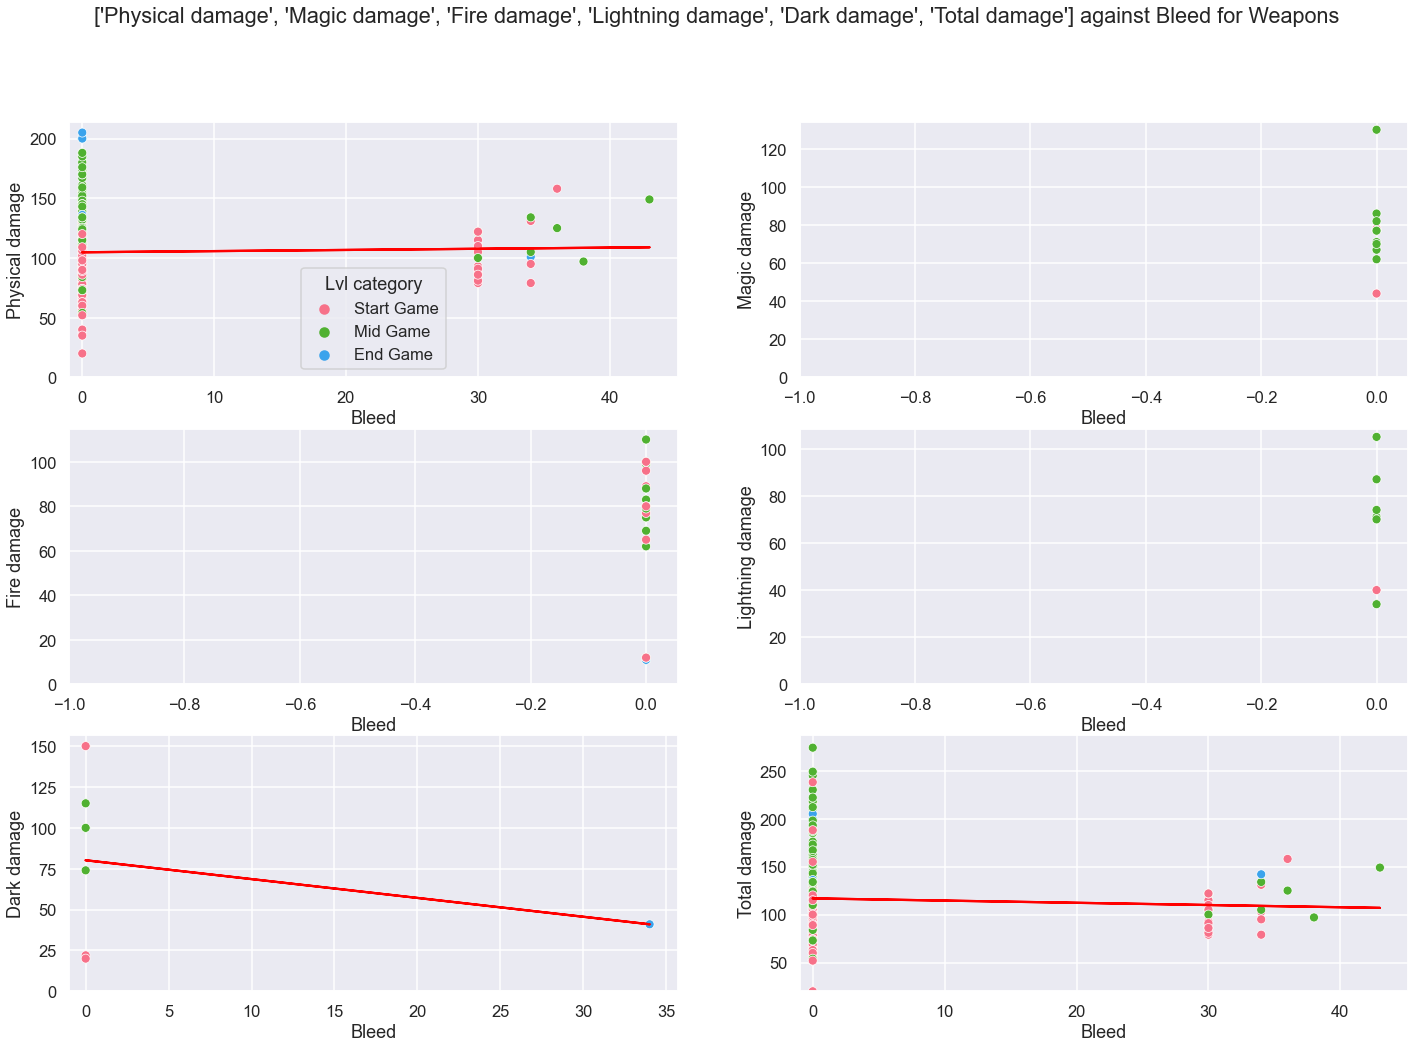

In [364]:
subplot_scatter(df, 'Bleed', Y_types, 'Lvl category', Lvl_order)


The gradient of the line of best fit is-3.8 (Frostbite)/(Dexterity Requirement)
The y intercept is:  109.8 Frostbite
The name of the DataFrame is: Weapons


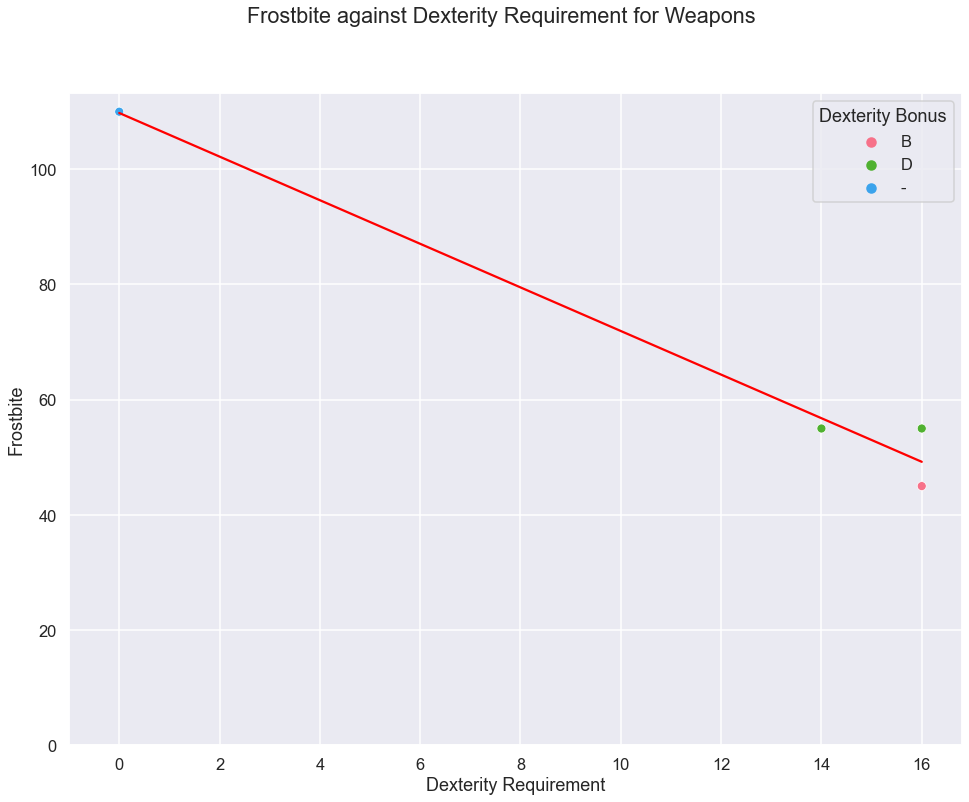

In [365]:
plot_scatter(df, 'Dexterity Requirement','Frostbite','Dexterity Bonus', Bonus_order)


The gradient of the line of best fit is 1.4 (Stability)/(Weight)
The y intercept is:  41.9 Stability


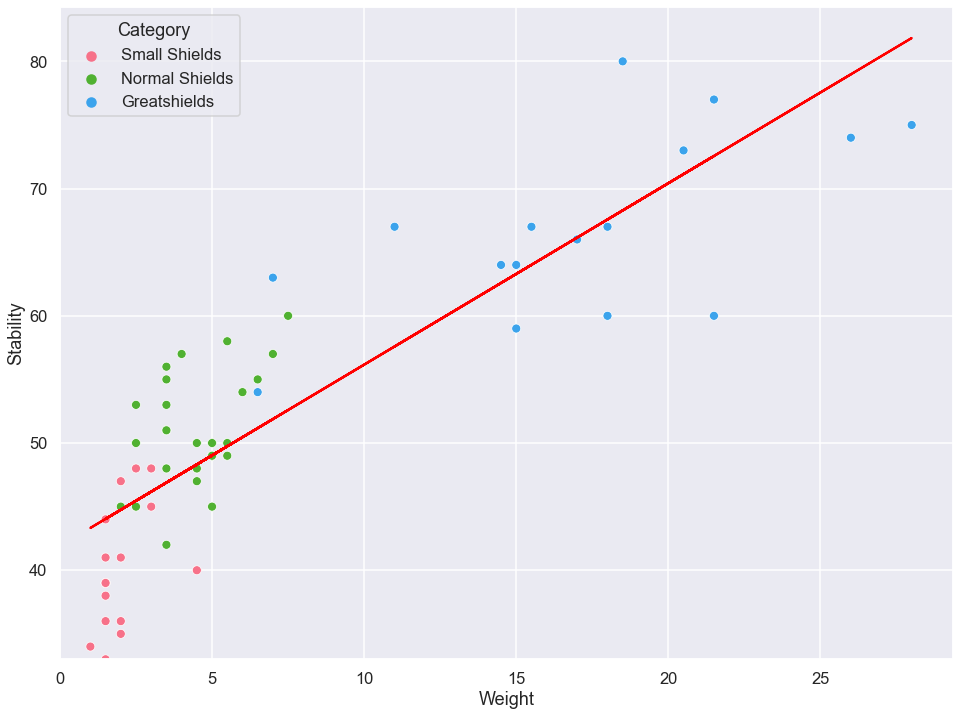

In [373]:
Shield_Order = ['Small Shields', 'Normal Shields', 'Greatshields']
Test = df[df['Category'].isin(Shield_Order)]

Shields["Category"] = Shields["Category"].cat.remove_unused_categories()
plot_scatter(Shields, 'Weight','Stability','Category', Shield_Order)

## Heat map:


There is too much data to go through all in one document.<br>
Using the Heatmap plot, we can check which categories have a linear correlation between them and use this information to decide what data is worth comparing another. 

Drop certain rows from the heat map data for redundency, i.e don't need correlation for both strength requirement AND str level requirement.

In [374]:
df_heat = df.drop(['Str lvls','Dex lvls','Fai lvls','Int lvls', 'Str lvls 2 hand',
                   'Total Lvl Requirement', 'Total Lvl Requirement 2 hand'], axis=1)

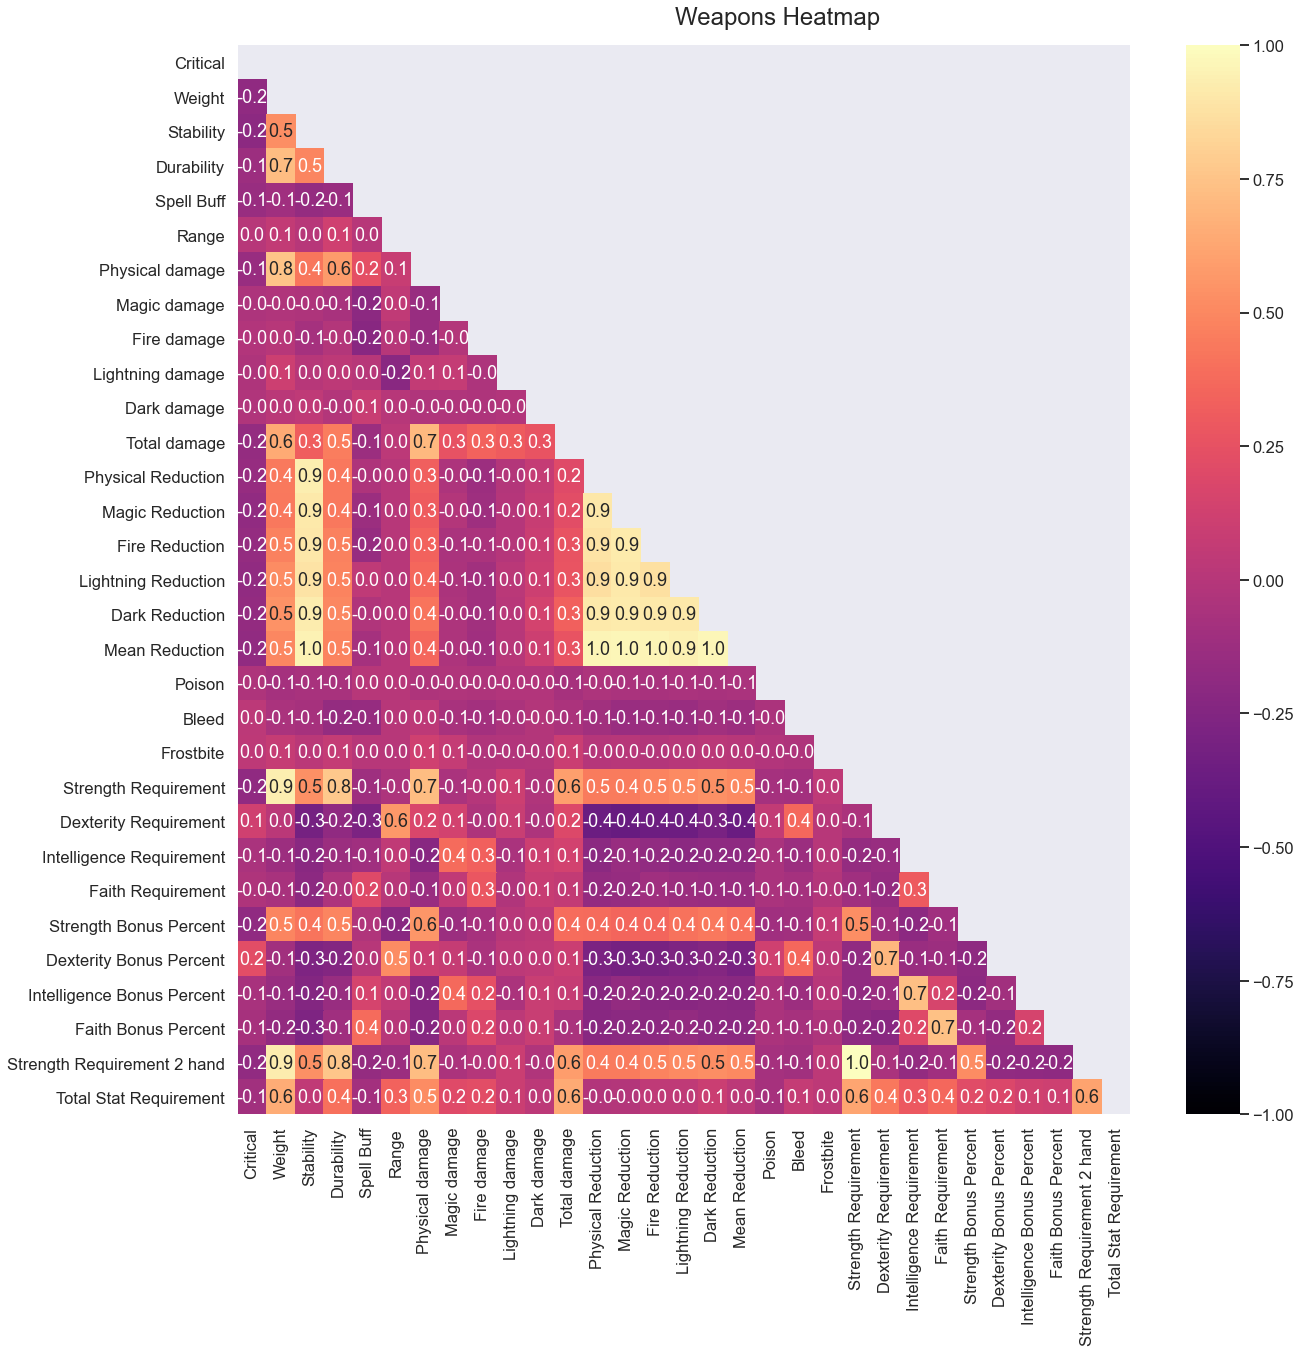

In [375]:
def Plot_Heatmap(data, string):
    df_heat = data.drop(['Str lvls','Dex lvls','Fai lvls','Int lvls', 'Str lvls 2 hand',
                   'Total Lvl Requirement', 'Total Lvl Requirement 2 hand'], axis=1)
    # Calculate the correlation matrix and store it in a variable.
    # Fill in NaN values with 0 (no correlation) to make heatmap easier to read
    #corr = df_heat.corr()
    corr = df_heat.corr().fillna(0)
    #corr = df_heat.replace(0, np.nan).corr()
    corr
    # Generate a mask for the upper triangle and store it in the mask variable.

    # Initialise shape of mask to be identical to shape of corr
    Trimask = np.triu(np.ones(corr.shape), k=0)
    # Setting k = 0 makes explicit that the diagonal is included in the upper triangle mask
    # Want the diagonal to be masked along with the upper tri.

    #print(mask) # Checking mask is as expected
    # Set up the figure.
    fig, ax = plt.subplots(figsize = (20, 18))

    # Plot the correlation matrix as a heatmap
    ax = sns.heatmap(data = corr, mask = Trimask, annot = True, fmt = ".1f", cmap = "magma", vmin=-1, vmax=1,)
    plt.suptitle(string+' Heatmap', fontsize=24)
    plt.subplots_adjust(top=0.95)  
    fig.savefig(string+'_heatmap.png')

Plot_Heatmap(df, 'Weapons')

High linear correlation corresponds to values of 1 or -1.

There is the strongest correlation in the damage reduction categories to a number of other categories.<br>
Each of the damage reduction stats are strongly correlated to each other, this makes sense as a weapon with generally high reduction of one type should have a comparativly high reduction in the others.<br>
Damage reduction of all types strongly correlates with the Stability of the weapon, and so when choosing a shield a player may use the stability of the shield to get a rough estimate of the overall damage reduction.<br>

One issue with using this method is that for stats like aux effects which are only present on a handful of weapons, the correlations are skewed towards zero due to the vast number of zero values.<br>
i.e only 6 weapons have a posion attribute of > 0.<br>
Can get around by plotting heatmaps for each of the groups defined earlier.

So instead of seeing the correlation for the range stat across all 287 weapons, it makes sense to only look at the correlation of range stat for Ranged weapons.<br>
(Remember that useless columns were filtered out when defining weapon groups)

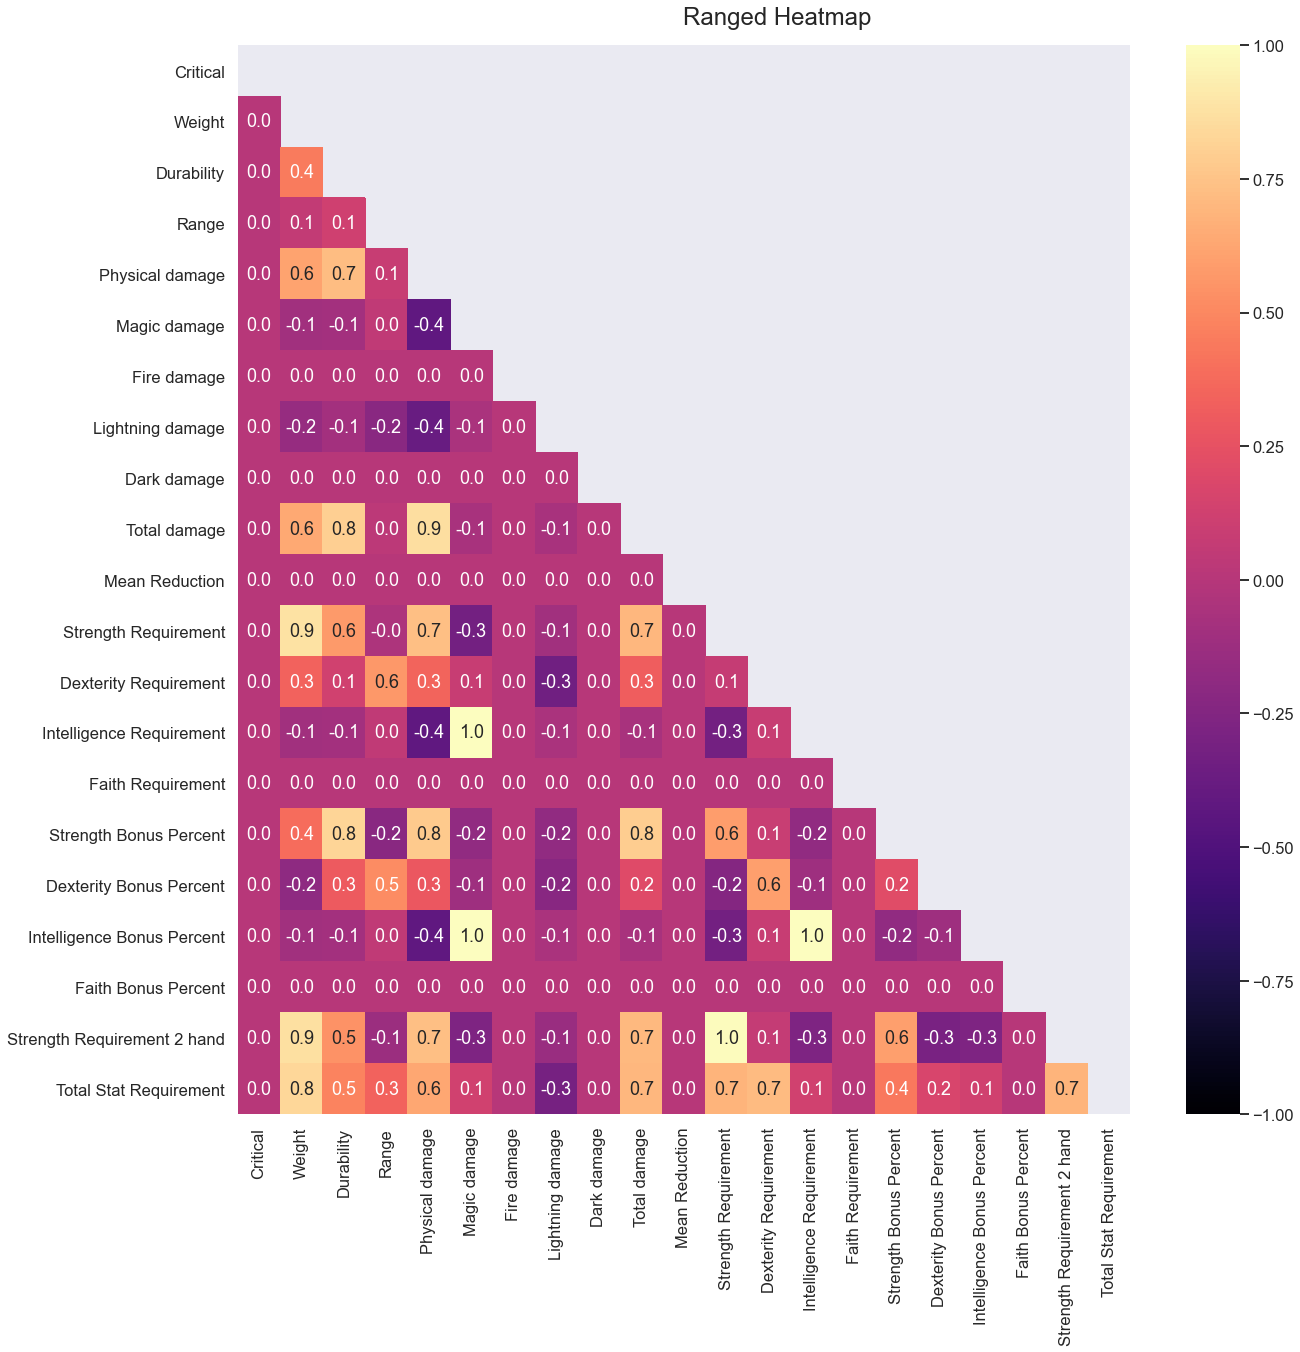

In [376]:
Plot_Heatmap(Ranged, 'Ranged')

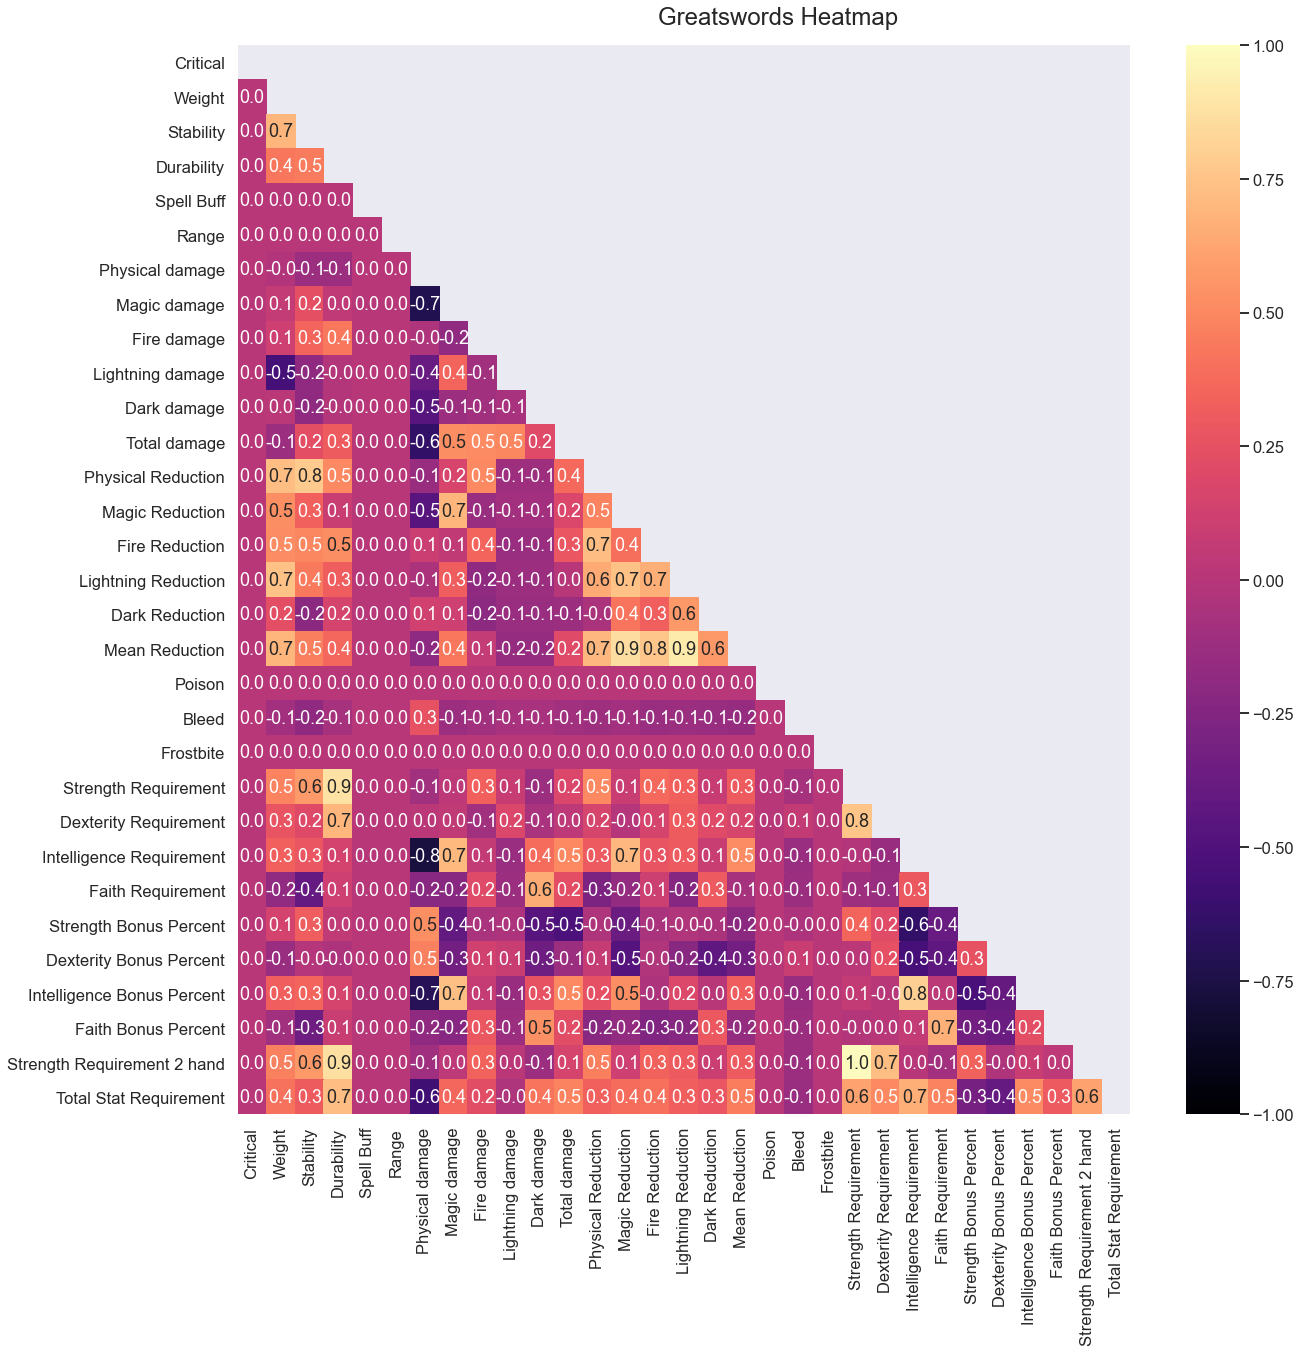

In [377]:
# Could also plot heat Maps for individual weapon categories using this function.

Plot_Heatmap(df[df['Category']=='Greatswords'], 'Greatswords')

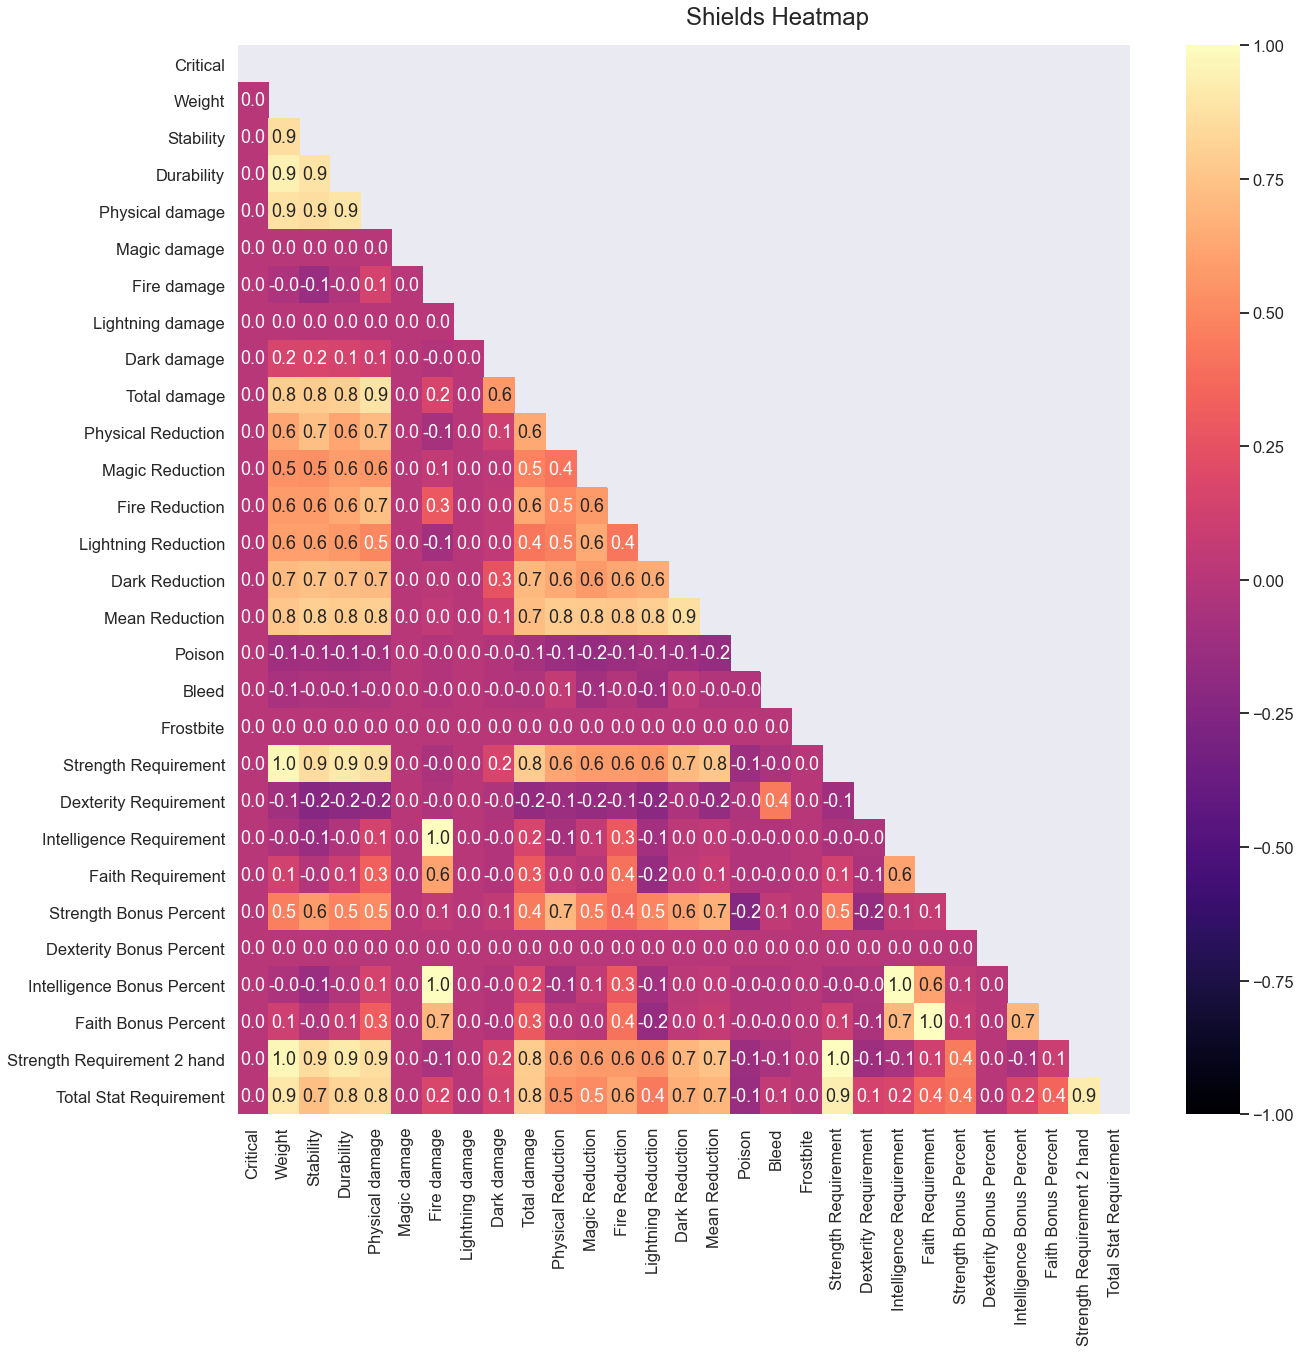

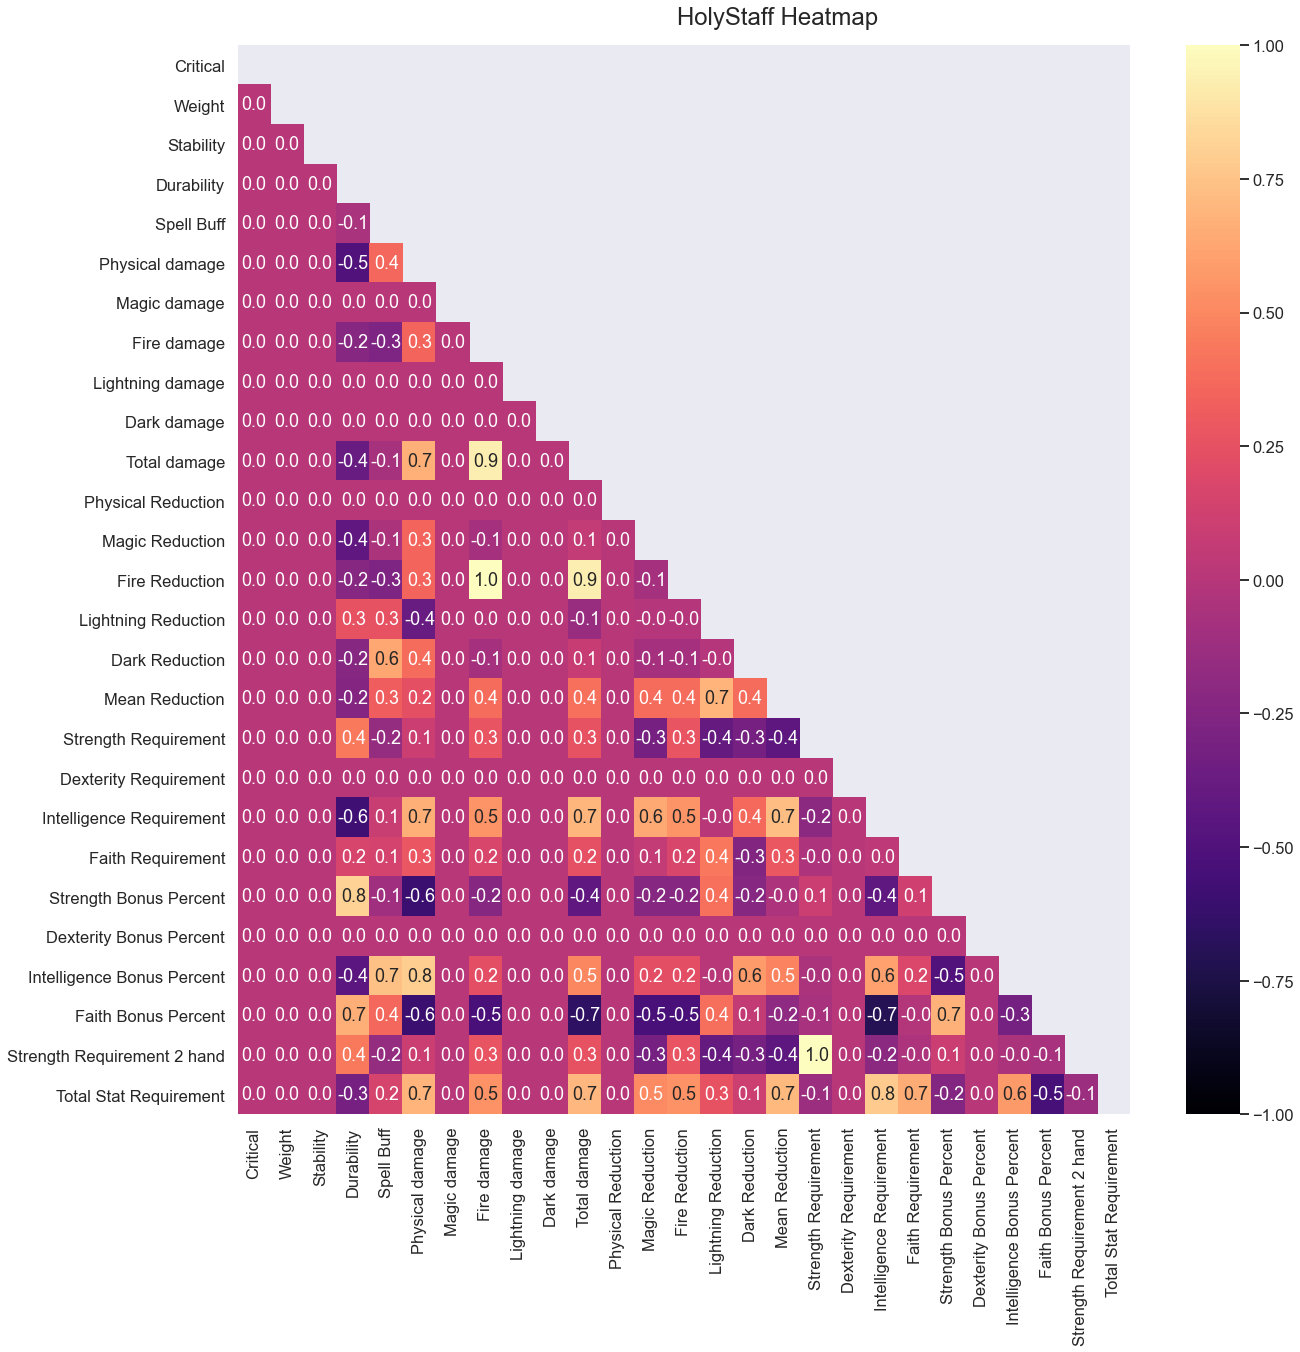

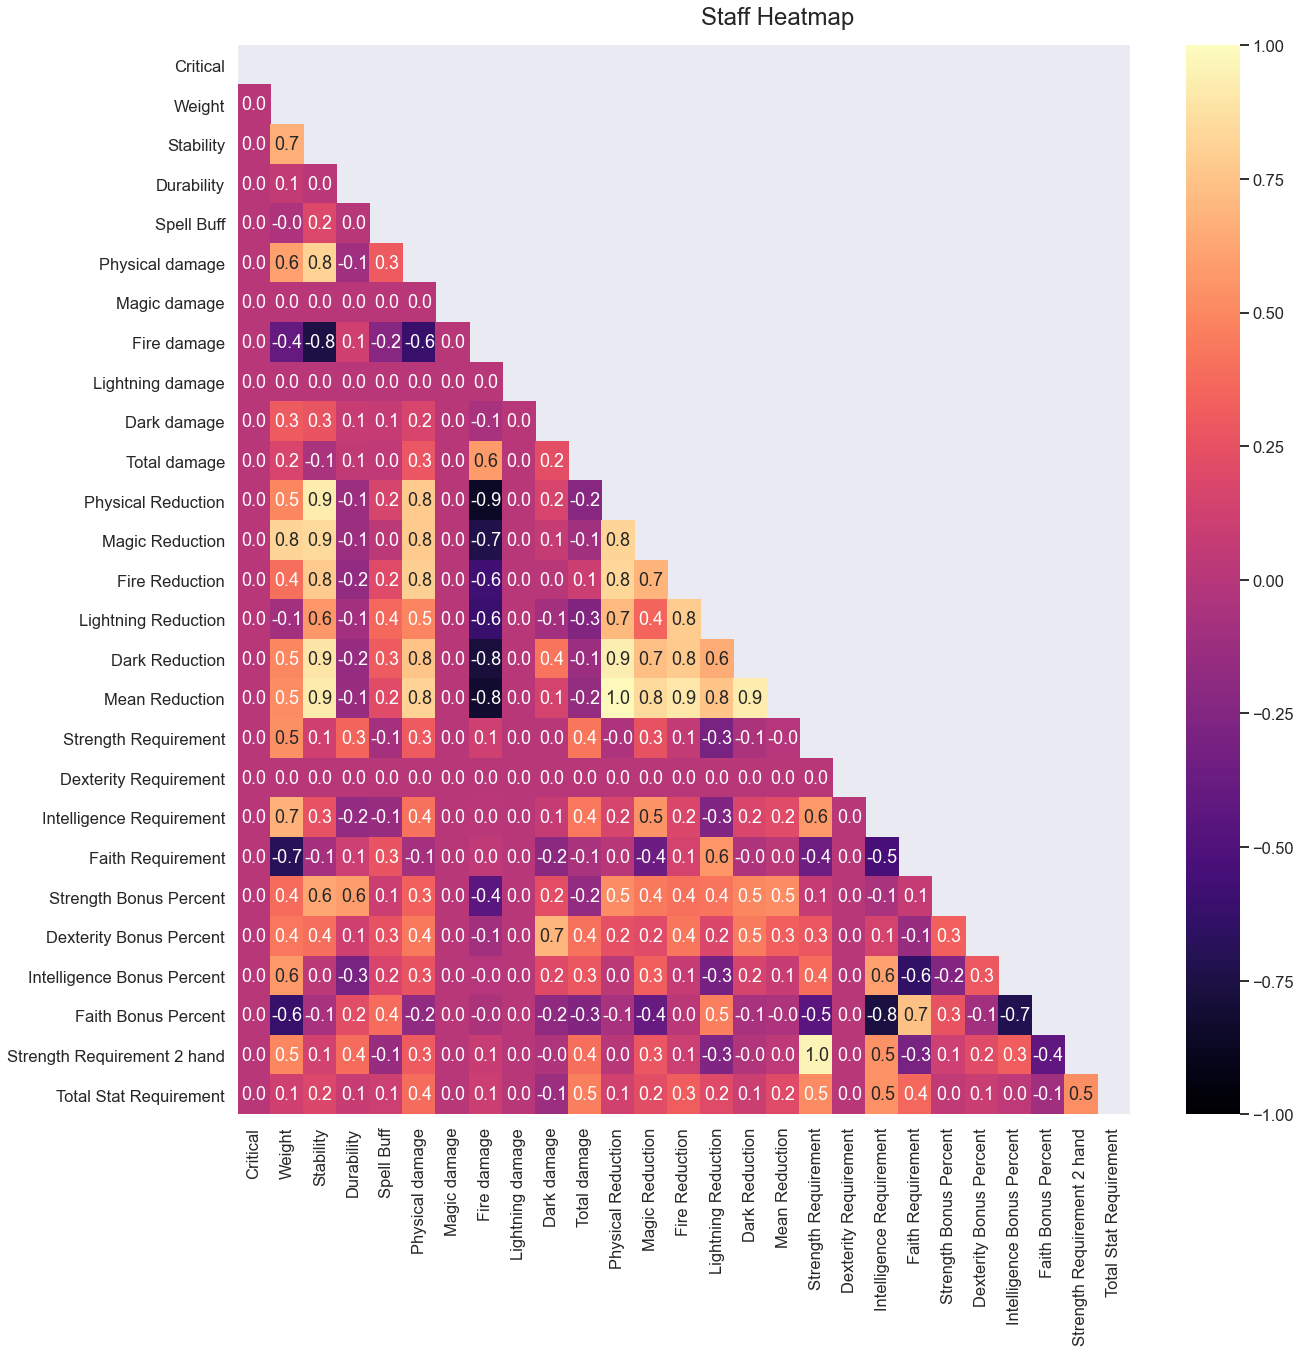

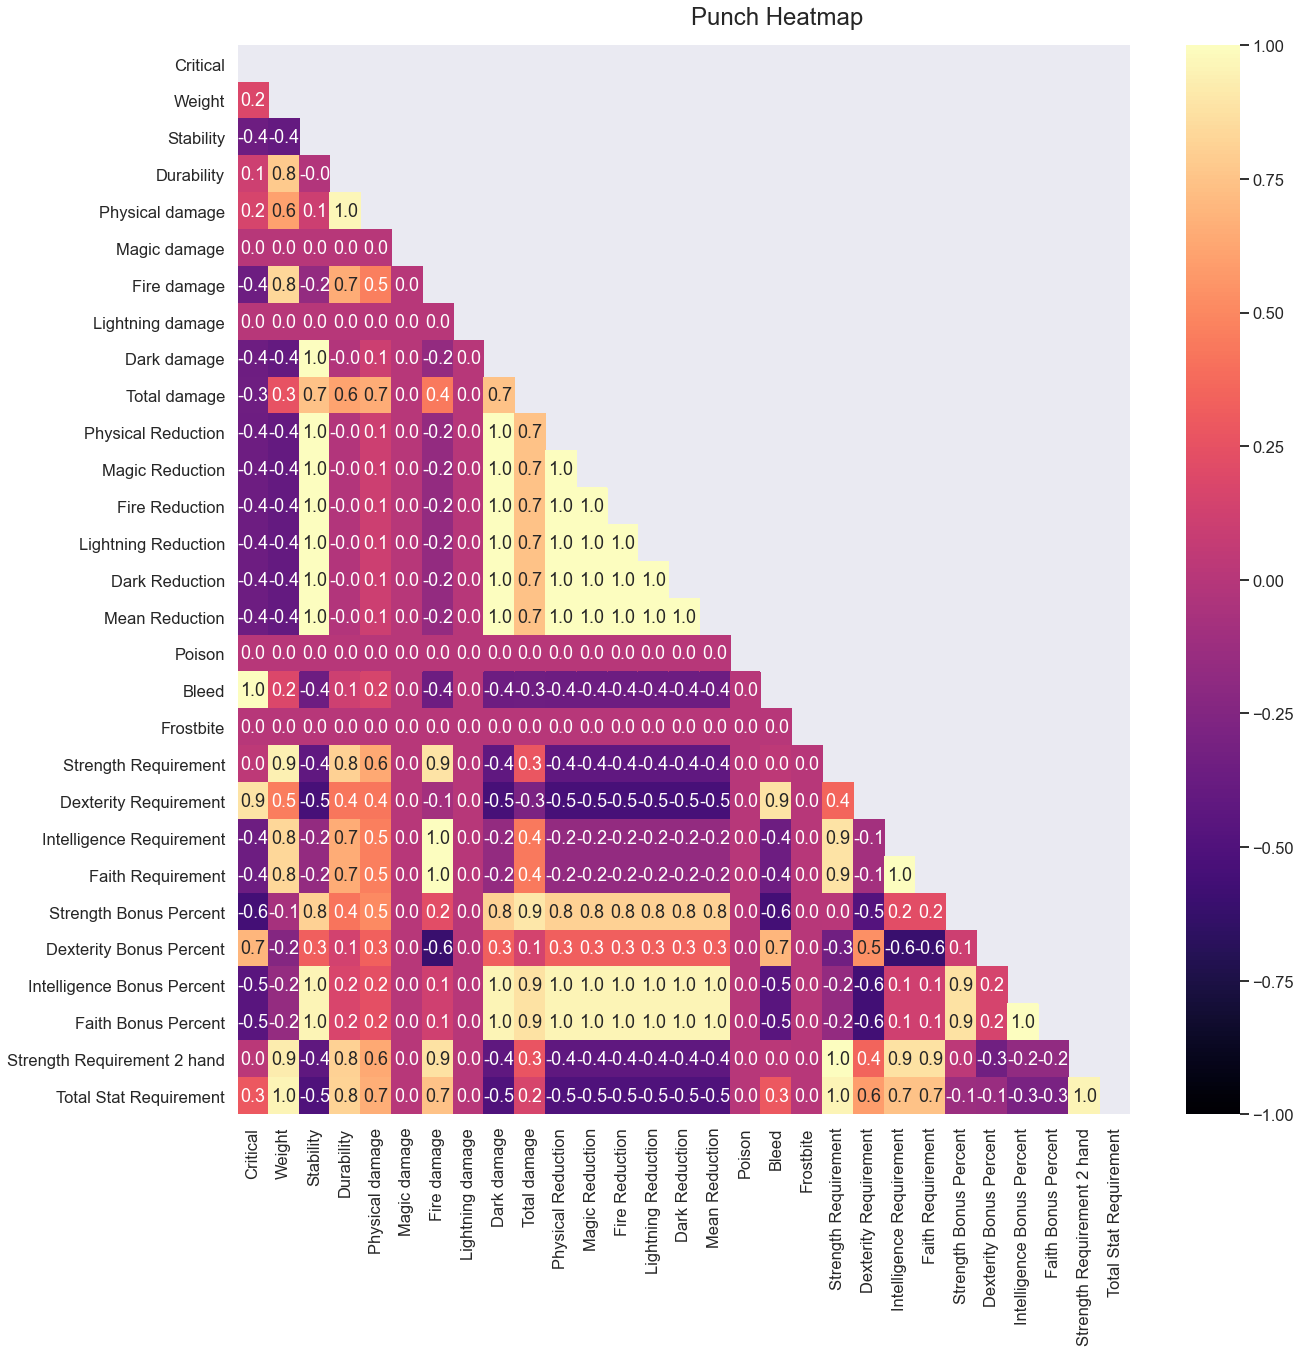

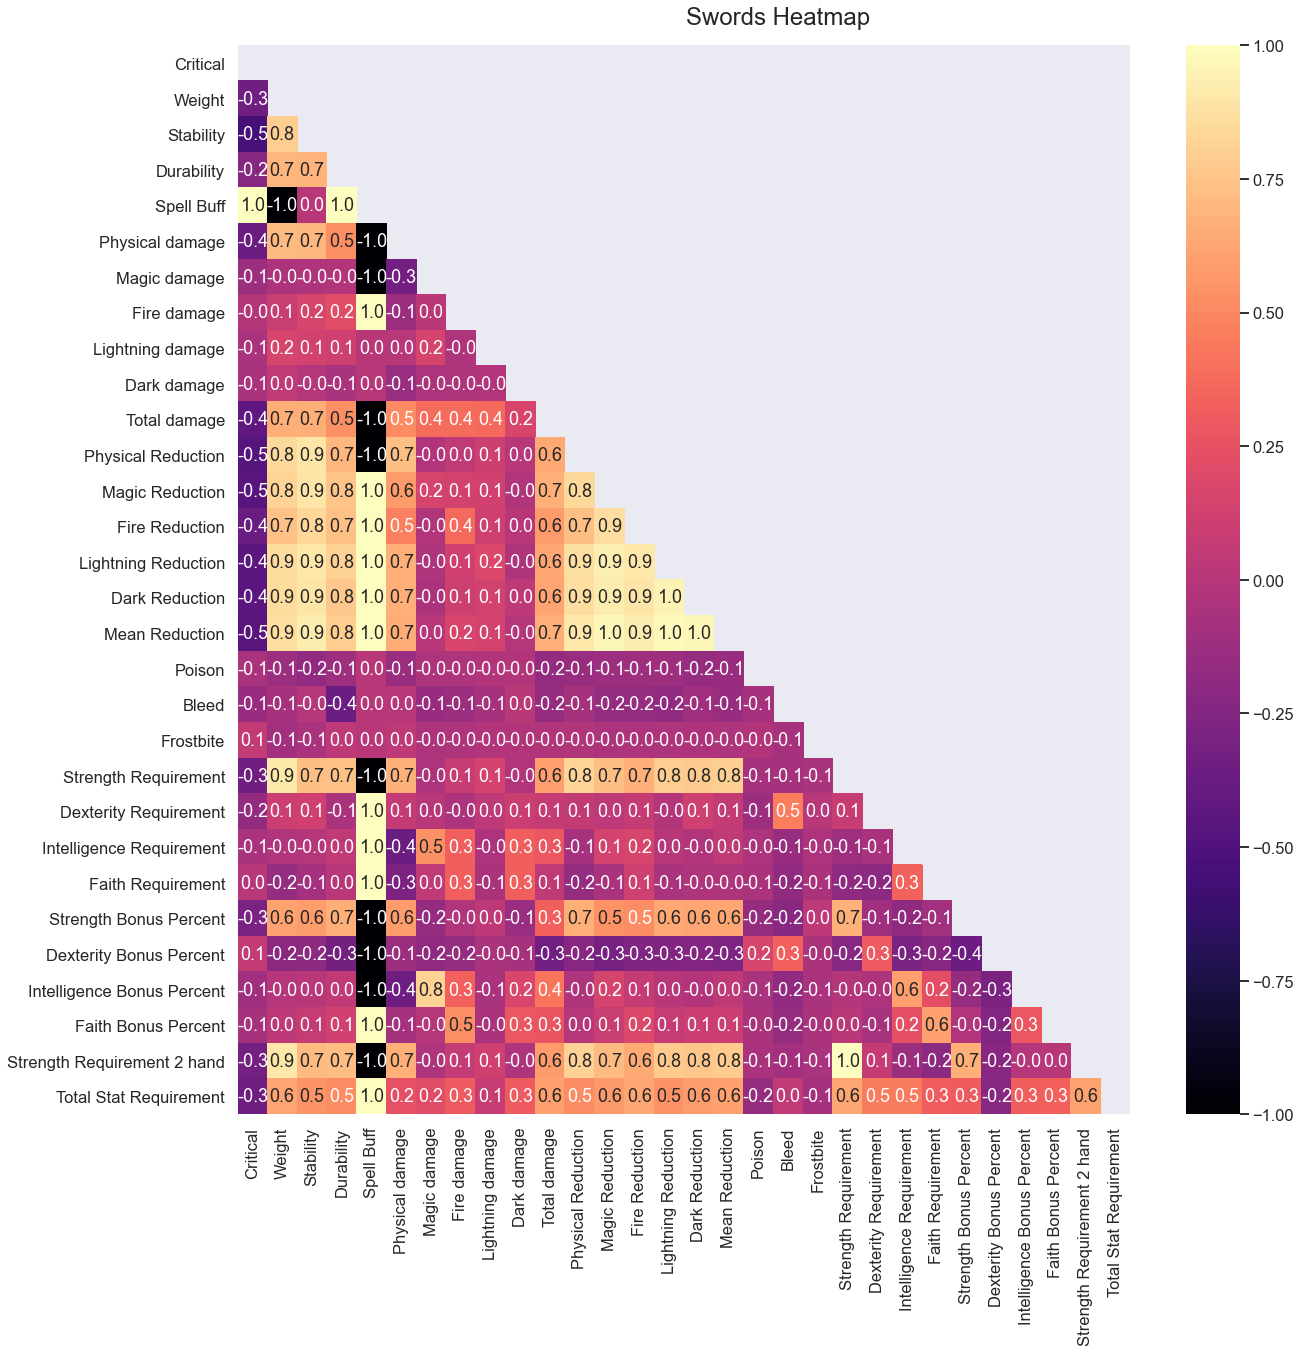

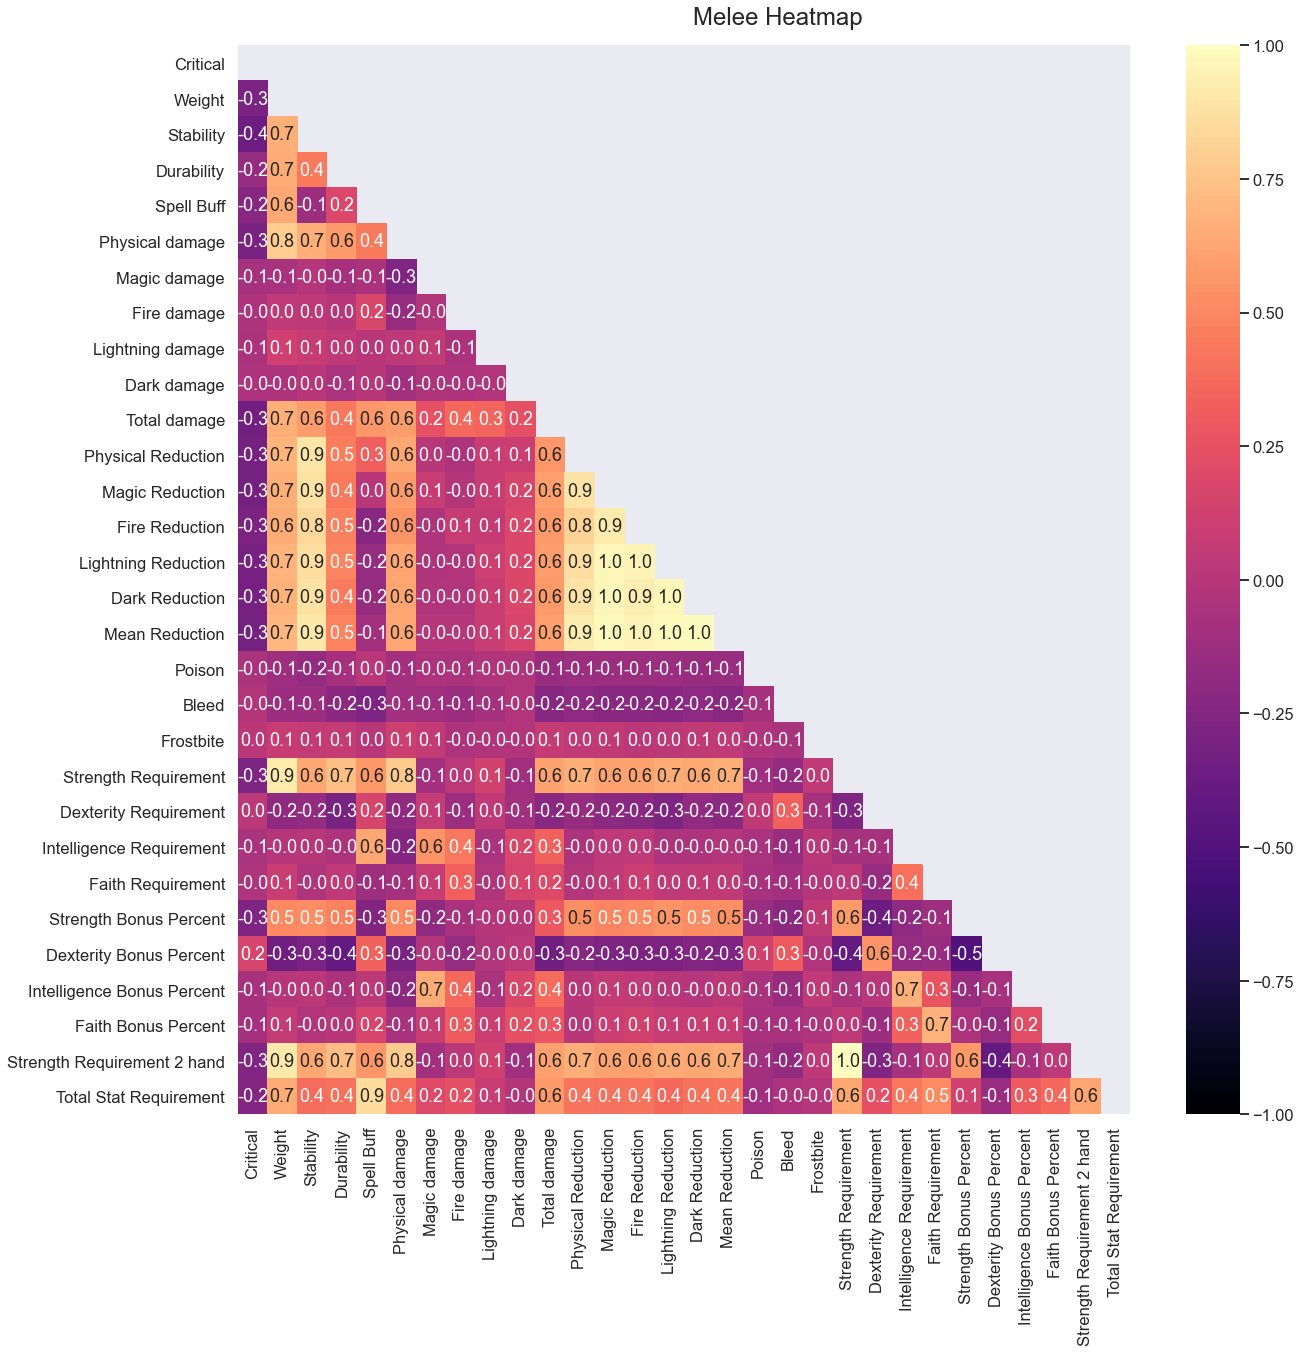

In [378]:
Plot_Heatmap(Shields, 'Shields')
Plot_Heatmap(HolyStaff, 'HolyStaff')
Plot_Heatmap(Staff, 'Staff')
Plot_Heatmap(Punch, 'Punch')
Plot_Heatmap(Swords, 'Swords')
Plot_Heatmap(Melee, 'Melee')